# DeepLabCut Toolbox - DEMO (mouse reaching)
https://github.com/AlexEMG/DeepLabCut

#### The notebook accompanies the following user-guide:

Nath\*, Mathis\* et al. *Using DeepLabCut for markerless pose estimation during behavior across species* Nature Protocols, 2019: https://www.nature.com/articles/s41596-019-0176-0

This notebook starts from an already initialized project with labeled data.

**Data:** dataset is from Mathis et al. *Somatosensory Cortex Plays an Essential Role in Forelimb Motor Adaptation in Mice* Neuron, 2017: DOI:https://doi.org/10.1016/j.neuron.2017.02.049

This notebook illustrates how to:
- plot the labeled images
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories 
- identify outlier frames
- annotate the outlier frames manually
- merge the data sets and update the training set
- train a network

## Import the toolbox:

In [1]:
import deeplabcut

### Set a variable to point to the project configuration file:

In [2]:
import os
# Note that parameters of this project can be seen at: *Reaching-Mackenzie-2018-08-30/config.yaml*
from pathlib import Path

#create a variable to set the config.yaml file path:
path_config_file = os.path.join(os.getcwd(),'Reaching-Mackenzie-2018-08-30/config.yaml')
print(path_config_file)

/home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/config.yaml


NOTE: When you use DeepLabCut on your own data, you will (1) create a project, (2) extract frames to label, and (3) label you data. 
**In this demo, this is all done for you!**
The purpose of the demo to for you to get familiar with part of the workflow.

### Load the pre-labeled data:

In [3]:
#let's load some demo data, and create a training set 
#(note, this function is not used when you create your own project):

deeplabcut.load_demo_data(path_config_file)

Loaded, now creating training data...
/home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30  already exists!
/home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1  already exists!
/home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train  already exists!
/home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/test  already exists!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


In [4]:
#Perhaps plot the labels to see how the frames were annotated:

deeplabcut.check_labels(path_config_file)

  0%|          | 0/55 [00:00<?, ?it/s]

Creating images with labels by Mackenzie.
/home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/labeled-data/reachingvideo1_labeled  already exists!


100%|██████████| 55/55 [00:17<00:00,  3.11it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


## Start training of Feature Detectors
This function trains the network for a specific shuffle of the training dataset. **The user can set various parameters in /Reaching-Mackenzie-2018-08-30/dlc-models/ReachingAug30-trainset95shuffle1/iteration-0/train/pose_cfg.yaml.**

Training can be stopped at any time. Note that the weights are only stored every 'save_iters' steps. For this demo the it is advisable to store & display the progress very often (i.e. display every 20, save every 100). In practice this is inefficient (in reality, you will train until ~200K, so we save every 50K).

**We recommend just training for 10-20 min, as you aren't running this demo to use DLC, just to work through the steps. In total, this demo should take you LESS THAN 1 HOUR!**

In [ ]:
deeplabcut.train_network(path_config_file, shuffle=1, saveiters=300, displayiters=10)
#notice the variables "saveiters" and "dsiplayiters" that can be set in the function

#you just need to run this until you get at least 1 snapshot, which is set by: "save_iters" 
#(so in this case you could stop after 500!) How do I stop? Click the STOP button!
# To train until ~2,000 iterations on a CPU should be ~30 min

Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['Hand', 'Finger1', 'Tongue', 'Joystick1', 'Joystick2'],
 'batch_size': 1,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/blansdell/anaconda3/envs/dlc/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Documentation_data-Reaching_95shuffle1.pickle',
 'min_input_size': 64,
 'mirr

Selecting single-animal trainer
Starting with imgaug pose-dataset loader (=default).
Batch Size is 1
Initializing ResNet
Loading ImageNet-pretrained resnet_50
Display_iters overwritten as 10
Save_iters overwritten as 300
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, '

iteration: 10 loss: 0.3421 lr: 0.005
iteration: 20 loss: 0.0528 lr: 0.005
iteration: 30 loss: 0.0386 lr: 0.005
iteration: 40 loss: 0.0387 lr: 0.005
iteration: 50 loss: 0.0306 lr: 0.005
iteration: 60 loss: 0.0376 lr: 0.005
iteration: 70 loss: 0.0268 lr: 0.005
iteration: 80 loss: 0.0276 lr: 0.005
iteration: 90 loss: 0.0304 lr: 0.005
iteration: 100 loss: 0.0277 lr: 0.005
iteration: 110 loss: 0.0261 lr: 0.005
iteration: 120 loss: 0.0221 lr: 0.005
iteration: 130 loss: 0.0248 lr: 0.005
iteration: 140 loss: 0.0309 lr: 0.005
iteration: 150 loss: 0.0236 lr: 0.005
iteration: 160 loss: 0.0254 lr: 0.005
iteration: 170 loss: 0.0211 lr: 0.005
iteration: 180 loss: 0.0308 lr: 0.005
iteration: 190 loss: 0.0240 lr: 0.005
iteration: 200 loss: 0.0241 lr: 0.005
iteration: 210 loss: 0.0216 lr: 0.005
iteration: 220 loss: 0.0226 lr: 0.005
iteration: 230 loss: 0.0169 lr: 0.005
iteration: 240 loss: 0.0196 lr: 0.005
iteration: 250 loss: 0.0317 lr: 0.005
iteration: 260 loss: 0.0175 lr: 0.005
iteration: 270 loss: 

iteration: 2140 loss: 0.0137 lr: 0.005
iteration: 2150 loss: 0.0150 lr: 0.005
iteration: 2160 loss: 0.0137 lr: 0.005
iteration: 2170 loss: 0.0127 lr: 0.005
iteration: 2180 loss: 0.0100 lr: 0.005
iteration: 2190 loss: 0.0127 lr: 0.005
iteration: 2200 loss: 0.0118 lr: 0.005
iteration: 2210 loss: 0.0137 lr: 0.005
iteration: 2220 loss: 0.0137 lr: 0.005
iteration: 2230 loss: 0.0146 lr: 0.005
iteration: 2240 loss: 0.0152 lr: 0.005
iteration: 2250 loss: 0.0125 lr: 0.005
iteration: 2260 loss: 0.0140 lr: 0.005
iteration: 2270 loss: 0.0129 lr: 0.005
iteration: 2280 loss: 0.0115 lr: 0.005
iteration: 2290 loss: 0.0142 lr: 0.005
iteration: 2300 loss: 0.0135 lr: 0.005
iteration: 2310 loss: 0.0133 lr: 0.005
iteration: 2320 loss: 0.0156 lr: 0.005
iteration: 2330 loss: 0.0135 lr: 0.005
iteration: 2340 loss: 0.0155 lr: 0.005
iteration: 2350 loss: 0.0161 lr: 0.005
iteration: 2360 loss: 0.0100 lr: 0.005
iteration: 2370 loss: 0.0098 lr: 0.005
iteration: 2380 loss: 0.0129 lr: 0.005
iteration: 2390 loss: 0.0

iteration: 4250 loss: 0.0134 lr: 0.005
iteration: 4260 loss: 0.0097 lr: 0.005
iteration: 4270 loss: 0.0105 lr: 0.005
iteration: 4280 loss: 0.0130 lr: 0.005
iteration: 4290 loss: 0.0099 lr: 0.005
iteration: 4300 loss: 0.0095 lr: 0.005
iteration: 4310 loss: 0.0123 lr: 0.005
iteration: 4320 loss: 0.0103 lr: 0.005
iteration: 4330 loss: 0.0082 lr: 0.005
iteration: 4340 loss: 0.0093 lr: 0.005
iteration: 4350 loss: 0.0098 lr: 0.005
iteration: 4360 loss: 0.0113 lr: 0.005
iteration: 4370 loss: 0.0094 lr: 0.005
iteration: 4380 loss: 0.0115 lr: 0.005
iteration: 4390 loss: 0.0085 lr: 0.005
iteration: 4400 loss: 0.0082 lr: 0.005
iteration: 4410 loss: 0.0072 lr: 0.005
iteration: 4420 loss: 0.0134 lr: 0.005
iteration: 4430 loss: 0.0079 lr: 0.005
iteration: 4440 loss: 0.0116 lr: 0.005
iteration: 4450 loss: 0.0087 lr: 0.005
iteration: 4460 loss: 0.0099 lr: 0.005
iteration: 4470 loss: 0.0094 lr: 0.005
iteration: 4480 loss: 0.0104 lr: 0.005
iteration: 4490 loss: 0.0119 lr: 0.005
iteration: 4500 loss: 0.0

iteration: 6360 loss: 0.0101 lr: 0.005
iteration: 6370 loss: 0.0064 lr: 0.005
iteration: 6380 loss: 0.0064 lr: 0.005
iteration: 6390 loss: 0.0089 lr: 0.005
iteration: 6400 loss: 0.0108 lr: 0.005
iteration: 6410 loss: 0.0095 lr: 0.005
iteration: 6420 loss: 0.0073 lr: 0.005
iteration: 6430 loss: 0.0132 lr: 0.005
iteration: 6440 loss: 0.0075 lr: 0.005
iteration: 6450 loss: 0.0093 lr: 0.005
iteration: 6460 loss: 0.0103 lr: 0.005
iteration: 6470 loss: 0.0084 lr: 0.005
iteration: 6480 loss: 0.0079 lr: 0.005
iteration: 6490 loss: 0.0090 lr: 0.005
iteration: 6500 loss: 0.0074 lr: 0.005
iteration: 6510 loss: 0.0108 lr: 0.005
iteration: 6520 loss: 0.0077 lr: 0.005
iteration: 6530 loss: 0.0078 lr: 0.005
iteration: 6540 loss: 0.0096 lr: 0.005
iteration: 6550 loss: 0.0153 lr: 0.005
iteration: 6560 loss: 0.0090 lr: 0.005
iteration: 6570 loss: 0.0090 lr: 0.005
iteration: 6580 loss: 0.0144 lr: 0.005
iteration: 6590 loss: 0.0108 lr: 0.005
iteration: 6600 loss: 0.0085 lr: 0.005
iteration: 6610 loss: 0.0

iteration: 8470 loss: 0.0098 lr: 0.005
iteration: 8480 loss: 0.0064 lr: 0.005
iteration: 8490 loss: 0.0084 lr: 0.005
iteration: 8500 loss: 0.0098 lr: 0.005
iteration: 8510 loss: 0.0097 lr: 0.005
iteration: 8520 loss: 0.0103 lr: 0.005
iteration: 8530 loss: 0.0076 lr: 0.005
iteration: 8540 loss: 0.0091 lr: 0.005
iteration: 8550 loss: 0.0088 lr: 0.005
iteration: 8560 loss: 0.0088 lr: 0.005
iteration: 8570 loss: 0.0083 lr: 0.005
iteration: 8580 loss: 0.0066 lr: 0.005
iteration: 8590 loss: 0.0092 lr: 0.005
iteration: 8600 loss: 0.0068 lr: 0.005
iteration: 8610 loss: 0.0090 lr: 0.005
iteration: 8620 loss: 0.0087 lr: 0.005
iteration: 8630 loss: 0.0074 lr: 0.005
iteration: 8640 loss: 0.0102 lr: 0.005
iteration: 8650 loss: 0.0108 lr: 0.005
iteration: 8660 loss: 0.0088 lr: 0.005
iteration: 8670 loss: 0.0084 lr: 0.005
iteration: 8680 loss: 0.0125 lr: 0.005
iteration: 8690 loss: 0.0071 lr: 0.005
iteration: 8700 loss: 0.0082 lr: 0.005
iteration: 8710 loss: 0.0075 lr: 0.005
iteration: 8720 loss: 0.0

iteration: 10580 loss: 0.0112 lr: 0.02
iteration: 10590 loss: 0.0098 lr: 0.02
iteration: 10600 loss: 0.0086 lr: 0.02
iteration: 10610 loss: 0.0101 lr: 0.02
iteration: 10620 loss: 0.0105 lr: 0.02
iteration: 10630 loss: 0.0123 lr: 0.02
iteration: 10640 loss: 0.0112 lr: 0.02
iteration: 10650 loss: 0.0087 lr: 0.02
iteration: 10660 loss: 0.0092 lr: 0.02
iteration: 10670 loss: 0.0110 lr: 0.02
iteration: 10680 loss: 0.0109 lr: 0.02
iteration: 10690 loss: 0.0123 lr: 0.02
iteration: 10700 loss: 0.0113 lr: 0.02
iteration: 10710 loss: 0.0102 lr: 0.02
iteration: 10720 loss: 0.0110 lr: 0.02
iteration: 10730 loss: 0.0101 lr: 0.02
iteration: 10740 loss: 0.0121 lr: 0.02
iteration: 10750 loss: 0.0087 lr: 0.02
iteration: 10760 loss: 0.0103 lr: 0.02
iteration: 10770 loss: 0.0125 lr: 0.02
iteration: 10780 loss: 0.0089 lr: 0.02
iteration: 10790 loss: 0.0089 lr: 0.02
iteration: 10800 loss: 0.0110 lr: 0.02
iteration: 10810 loss: 0.0095 lr: 0.02
iteration: 10820 loss: 0.0104 lr: 0.02
iteration: 10830 loss: 0.

iteration: 12690 loss: 0.0088 lr: 0.02
iteration: 12700 loss: 0.0093 lr: 0.02
iteration: 12710 loss: 0.0108 lr: 0.02
iteration: 12720 loss: 0.0079 lr: 0.02
iteration: 12730 loss: 0.0067 lr: 0.02
iteration: 12740 loss: 0.0086 lr: 0.02
iteration: 12750 loss: 0.0103 lr: 0.02
iteration: 12760 loss: 0.0067 lr: 0.02
iteration: 12770 loss: 0.0089 lr: 0.02
iteration: 12780 loss: 0.0081 lr: 0.02
iteration: 12790 loss: 0.0090 lr: 0.02
iteration: 12800 loss: 0.0085 lr: 0.02
iteration: 12810 loss: 0.0079 lr: 0.02
iteration: 12820 loss: 0.0073 lr: 0.02
iteration: 12830 loss: 0.0095 lr: 0.02
iteration: 12840 loss: 0.0082 lr: 0.02
iteration: 12850 loss: 0.0093 lr: 0.02
iteration: 12860 loss: 0.0082 lr: 0.02
iteration: 12870 loss: 0.0068 lr: 0.02
iteration: 12880 loss: 0.0078 lr: 0.02
iteration: 12890 loss: 0.0064 lr: 0.02
iteration: 12900 loss: 0.0087 lr: 0.02
iteration: 12910 loss: 0.0089 lr: 0.02
iteration: 12920 loss: 0.0096 lr: 0.02
iteration: 12930 loss: 0.0069 lr: 0.02
iteration: 12940 loss: 0.

iteration: 14800 loss: 0.0066 lr: 0.02
iteration: 14810 loss: 0.0046 lr: 0.02
iteration: 14820 loss: 0.0055 lr: 0.02
iteration: 14830 loss: 0.0059 lr: 0.02
iteration: 14840 loss: 0.0086 lr: 0.02
iteration: 14850 loss: 0.0082 lr: 0.02
iteration: 14860 loss: 0.0071 lr: 0.02
iteration: 14870 loss: 0.0109 lr: 0.02
iteration: 14880 loss: 0.0108 lr: 0.02
iteration: 14890 loss: 0.0065 lr: 0.02
iteration: 14900 loss: 0.0069 lr: 0.02
iteration: 14910 loss: 0.0075 lr: 0.02
iteration: 14920 loss: 0.0091 lr: 0.02
iteration: 14930 loss: 0.0065 lr: 0.02
iteration: 14940 loss: 0.0095 lr: 0.02
iteration: 14950 loss: 0.0063 lr: 0.02
iteration: 14960 loss: 0.0074 lr: 0.02
iteration: 14970 loss: 0.0075 lr: 0.02
iteration: 14980 loss: 0.0071 lr: 0.02
iteration: 14990 loss: 0.0079 lr: 0.02
iteration: 15000 loss: 0.0081 lr: 0.02
iteration: 15010 loss: 0.0083 lr: 0.02
iteration: 15020 loss: 0.0084 lr: 0.02
iteration: 15030 loss: 0.0151 lr: 0.02
iteration: 15040 loss: 0.0065 lr: 0.02
iteration: 15050 loss: 0.

iteration: 16910 loss: 0.0080 lr: 0.02
iteration: 16920 loss: 0.0074 lr: 0.02
iteration: 16930 loss: 0.0084 lr: 0.02
iteration: 16940 loss: 0.0082 lr: 0.02
iteration: 16950 loss: 0.0068 lr: 0.02
iteration: 16960 loss: 0.0106 lr: 0.02
iteration: 16970 loss: 0.0063 lr: 0.02
iteration: 16980 loss: 0.0070 lr: 0.02
iteration: 16990 loss: 0.0091 lr: 0.02
iteration: 17000 loss: 0.0064 lr: 0.02
iteration: 17010 loss: 0.0087 lr: 0.02
iteration: 17020 loss: 0.0075 lr: 0.02
iteration: 17030 loss: 0.0079 lr: 0.02
iteration: 17040 loss: 0.0078 lr: 0.02
iteration: 17050 loss: 0.0079 lr: 0.02
iteration: 17060 loss: 0.0059 lr: 0.02
iteration: 17070 loss: 0.0064 lr: 0.02
iteration: 17080 loss: 0.0058 lr: 0.02
iteration: 17090 loss: 0.0069 lr: 0.02
iteration: 17100 loss: 0.0077 lr: 0.02
iteration: 17110 loss: 0.0057 lr: 0.02
iteration: 17120 loss: 0.0064 lr: 0.02
iteration: 17130 loss: 0.0061 lr: 0.02
iteration: 17140 loss: 0.0061 lr: 0.02
iteration: 17150 loss: 0.0057 lr: 0.02
iteration: 17160 loss: 0.

iteration: 19020 loss: 0.0044 lr: 0.02
iteration: 19030 loss: 0.0057 lr: 0.02
iteration: 19040 loss: 0.0058 lr: 0.02
iteration: 19050 loss: 0.0077 lr: 0.02
iteration: 19060 loss: 0.0057 lr: 0.02
iteration: 19070 loss: 0.0063 lr: 0.02
iteration: 19080 loss: 0.0065 lr: 0.02
iteration: 19090 loss: 0.0049 lr: 0.02
iteration: 19100 loss: 0.0057 lr: 0.02
iteration: 19110 loss: 0.0071 lr: 0.02
iteration: 19120 loss: 0.0059 lr: 0.02
iteration: 19130 loss: 0.0074 lr: 0.02
iteration: 19140 loss: 0.0059 lr: 0.02
iteration: 19150 loss: 0.0053 lr: 0.02
iteration: 19160 loss: 0.0062 lr: 0.02
iteration: 19170 loss: 0.0058 lr: 0.02
iteration: 19180 loss: 0.0058 lr: 0.02
iteration: 19190 loss: 0.0065 lr: 0.02
iteration: 19200 loss: 0.0083 lr: 0.02
iteration: 19210 loss: 0.0077 lr: 0.02
iteration: 19220 loss: 0.0061 lr: 0.02
iteration: 19230 loss: 0.0082 lr: 0.02
iteration: 19240 loss: 0.0067 lr: 0.02
iteration: 19250 loss: 0.0075 lr: 0.02
iteration: 19260 loss: 0.0065 lr: 0.02
iteration: 19270 loss: 0.

iteration: 21130 loss: 0.0059 lr: 0.02
iteration: 21140 loss: 0.0085 lr: 0.02
iteration: 21150 loss: 0.0069 lr: 0.02
iteration: 21160 loss: 0.0080 lr: 0.02
iteration: 21170 loss: 0.0075 lr: 0.02
iteration: 21180 loss: 0.0077 lr: 0.02
iteration: 21190 loss: 0.0073 lr: 0.02
iteration: 21200 loss: 0.0055 lr: 0.02
iteration: 21210 loss: 0.0043 lr: 0.02
iteration: 21220 loss: 0.0046 lr: 0.02
iteration: 21230 loss: 0.0040 lr: 0.02
iteration: 21240 loss: 0.0076 lr: 0.02
iteration: 21250 loss: 0.0064 lr: 0.02
iteration: 21260 loss: 0.0084 lr: 0.02
iteration: 21270 loss: 0.0053 lr: 0.02
iteration: 21280 loss: 0.0071 lr: 0.02
iteration: 21290 loss: 0.0060 lr: 0.02
iteration: 21300 loss: 0.0061 lr: 0.02
iteration: 21310 loss: 0.0067 lr: 0.02
iteration: 21320 loss: 0.0049 lr: 0.02
iteration: 21330 loss: 0.0062 lr: 0.02
iteration: 21340 loss: 0.0054 lr: 0.02
iteration: 21350 loss: 0.0069 lr: 0.02
iteration: 21360 loss: 0.0070 lr: 0.02
iteration: 21370 loss: 0.0058 lr: 0.02
iteration: 21380 loss: 0.

iteration: 23240 loss: 0.0061 lr: 0.02
iteration: 23250 loss: 0.0061 lr: 0.02
iteration: 23260 loss: 0.0060 lr: 0.02
iteration: 23270 loss: 0.0074 lr: 0.02
iteration: 23280 loss: 0.0066 lr: 0.02
iteration: 23290 loss: 0.0066 lr: 0.02
iteration: 23300 loss: 0.0067 lr: 0.02
iteration: 23310 loss: 0.0050 lr: 0.02
iteration: 23320 loss: 0.0056 lr: 0.02
iteration: 23330 loss: 0.0063 lr: 0.02
iteration: 23340 loss: 0.0065 lr: 0.02
iteration: 23350 loss: 0.0053 lr: 0.02
iteration: 23360 loss: 0.0054 lr: 0.02
iteration: 23370 loss: 0.0073 lr: 0.02
iteration: 23380 loss: 0.0067 lr: 0.02
iteration: 23390 loss: 0.0057 lr: 0.02
iteration: 23400 loss: 0.0048 lr: 0.02
iteration: 23410 loss: 0.0071 lr: 0.02
iteration: 23420 loss: 0.0041 lr: 0.02
iteration: 23430 loss: 0.0054 lr: 0.02
iteration: 23440 loss: 0.0063 lr: 0.02
iteration: 23450 loss: 0.0065 lr: 0.02
iteration: 23460 loss: 0.0081 lr: 0.02
iteration: 23470 loss: 0.0048 lr: 0.02
iteration: 23480 loss: 0.0051 lr: 0.02
iteration: 23490 loss: 0.

iteration: 25350 loss: 0.0070 lr: 0.02
iteration: 25360 loss: 0.0052 lr: 0.02
iteration: 25370 loss: 0.0056 lr: 0.02
iteration: 25380 loss: 0.0067 lr: 0.02
iteration: 25390 loss: 0.0085 lr: 0.02
iteration: 25400 loss: 0.0061 lr: 0.02
iteration: 25410 loss: 0.0055 lr: 0.02
iteration: 25420 loss: 0.0053 lr: 0.02
iteration: 25430 loss: 0.0043 lr: 0.02
iteration: 25440 loss: 0.0051 lr: 0.02
iteration: 25450 loss: 0.0057 lr: 0.02
iteration: 25460 loss: 0.0061 lr: 0.02
iteration: 25470 loss: 0.0048 lr: 0.02
iteration: 25480 loss: 0.0059 lr: 0.02
iteration: 25490 loss: 0.0055 lr: 0.02
iteration: 25500 loss: 0.0081 lr: 0.02
iteration: 25510 loss: 0.0058 lr: 0.02
iteration: 25520 loss: 0.0048 lr: 0.02
iteration: 25530 loss: 0.0042 lr: 0.02
iteration: 25540 loss: 0.0066 lr: 0.02
iteration: 25550 loss: 0.0066 lr: 0.02
iteration: 25560 loss: 0.0072 lr: 0.02
iteration: 25570 loss: 0.0058 lr: 0.02
iteration: 25580 loss: 0.0057 lr: 0.02
iteration: 25590 loss: 0.0047 lr: 0.02
iteration: 25600 loss: 0.

iteration: 27460 loss: 0.0075 lr: 0.02
iteration: 27470 loss: 0.0055 lr: 0.02
iteration: 27480 loss: 0.0065 lr: 0.02
iteration: 27490 loss: 0.0056 lr: 0.02
iteration: 27500 loss: 0.0042 lr: 0.02
iteration: 27510 loss: 0.0044 lr: 0.02
iteration: 27520 loss: 0.0062 lr: 0.02
iteration: 27530 loss: 0.0066 lr: 0.02
iteration: 27540 loss: 0.0062 lr: 0.02
iteration: 27550 loss: 0.0062 lr: 0.02
iteration: 27560 loss: 0.0065 lr: 0.02
iteration: 27570 loss: 0.0066 lr: 0.02
iteration: 27580 loss: 0.0054 lr: 0.02
iteration: 27590 loss: 0.0052 lr: 0.02
iteration: 27600 loss: 0.0046 lr: 0.02
iteration: 27610 loss: 0.0048 lr: 0.02
iteration: 27620 loss: 0.0054 lr: 0.02
iteration: 27630 loss: 0.0078 lr: 0.02
iteration: 27640 loss: 0.0053 lr: 0.02
iteration: 27650 loss: 0.0046 lr: 0.02
iteration: 27660 loss: 0.0063 lr: 0.02
iteration: 27670 loss: 0.0048 lr: 0.02
iteration: 27680 loss: 0.0058 lr: 0.02
iteration: 27690 loss: 0.0052 lr: 0.02
iteration: 27700 loss: 0.0067 lr: 0.02
iteration: 27710 loss: 0.

iteration: 29570 loss: 0.0054 lr: 0.02
iteration: 29580 loss: 0.0055 lr: 0.02
iteration: 29590 loss: 0.0051 lr: 0.02
iteration: 29600 loss: 0.0061 lr: 0.02
iteration: 29610 loss: 0.0060 lr: 0.02
iteration: 29620 loss: 0.0060 lr: 0.02
iteration: 29630 loss: 0.0064 lr: 0.02
iteration: 29640 loss: 0.0037 lr: 0.02
iteration: 29650 loss: 0.0049 lr: 0.02
iteration: 29660 loss: 0.0045 lr: 0.02
iteration: 29670 loss: 0.0059 lr: 0.02
iteration: 29680 loss: 0.0046 lr: 0.02
iteration: 29690 loss: 0.0045 lr: 0.02
iteration: 29700 loss: 0.0047 lr: 0.02
iteration: 29710 loss: 0.0042 lr: 0.02
iteration: 29720 loss: 0.0047 lr: 0.02
iteration: 29730 loss: 0.0050 lr: 0.02
iteration: 29740 loss: 0.0037 lr: 0.02
iteration: 29750 loss: 0.0047 lr: 0.02
iteration: 29760 loss: 0.0071 lr: 0.02
iteration: 29770 loss: 0.0073 lr: 0.02
iteration: 29780 loss: 0.0053 lr: 0.02
iteration: 29790 loss: 0.0051 lr: 0.02
iteration: 29800 loss: 0.0059 lr: 0.02
iteration: 29810 loss: 0.0041 lr: 0.02
iteration: 29820 loss: 0.

iteration: 31680 loss: 0.0048 lr: 0.02
iteration: 31690 loss: 0.0044 lr: 0.02
iteration: 31700 loss: 0.0044 lr: 0.02
iteration: 31710 loss: 0.0051 lr: 0.02
iteration: 31720 loss: 0.0058 lr: 0.02
iteration: 31730 loss: 0.0081 lr: 0.02
iteration: 31740 loss: 0.0059 lr: 0.02
iteration: 31750 loss: 0.0038 lr: 0.02
iteration: 31760 loss: 0.0050 lr: 0.02
iteration: 31770 loss: 0.0044 lr: 0.02
iteration: 31780 loss: 0.0041 lr: 0.02
iteration: 31790 loss: 0.0058 lr: 0.02
iteration: 31800 loss: 0.0040 lr: 0.02
iteration: 31810 loss: 0.0046 lr: 0.02
iteration: 31820 loss: 0.0048 lr: 0.02
iteration: 31830 loss: 0.0046 lr: 0.02
iteration: 31840 loss: 0.0068 lr: 0.02
iteration: 31850 loss: 0.0056 lr: 0.02
iteration: 31860 loss: 0.0049 lr: 0.02
iteration: 31870 loss: 0.0042 lr: 0.02
iteration: 31880 loss: 0.0060 lr: 0.02
iteration: 31890 loss: 0.0065 lr: 0.02
iteration: 31900 loss: 0.0063 lr: 0.02
iteration: 31910 loss: 0.0045 lr: 0.02
iteration: 31920 loss: 0.0051 lr: 0.02
iteration: 31930 loss: 0.

iteration: 33790 loss: 0.0070 lr: 0.02
iteration: 33800 loss: 0.0062 lr: 0.02
iteration: 33810 loss: 0.0035 lr: 0.02
iteration: 33820 loss: 0.0041 lr: 0.02
iteration: 33830 loss: 0.0059 lr: 0.02
iteration: 33840 loss: 0.0050 lr: 0.02
iteration: 33850 loss: 0.0046 lr: 0.02
iteration: 33860 loss: 0.0048 lr: 0.02
iteration: 33870 loss: 0.0047 lr: 0.02
iteration: 33880 loss: 0.0067 lr: 0.02
iteration: 33890 loss: 0.0042 lr: 0.02
iteration: 33900 loss: 0.0043 lr: 0.02
iteration: 33910 loss: 0.0046 lr: 0.02
iteration: 33920 loss: 0.0038 lr: 0.02
iteration: 33930 loss: 0.0050 lr: 0.02
iteration: 33940 loss: 0.0049 lr: 0.02
iteration: 33950 loss: 0.0043 lr: 0.02
iteration: 33960 loss: 0.0050 lr: 0.02
iteration: 33970 loss: 0.0056 lr: 0.02
iteration: 33980 loss: 0.0060 lr: 0.02
iteration: 33990 loss: 0.0066 lr: 0.02
iteration: 34000 loss: 0.0057 lr: 0.02
iteration: 34010 loss: 0.0055 lr: 0.02
iteration: 34020 loss: 0.0038 lr: 0.02
iteration: 34030 loss: 0.0055 lr: 0.02
iteration: 34040 loss: 0.

iteration: 35900 loss: 0.0053 lr: 0.02
iteration: 35910 loss: 0.0046 lr: 0.02
iteration: 35920 loss: 0.0050 lr: 0.02
iteration: 35930 loss: 0.0047 lr: 0.02
iteration: 35940 loss: 0.0048 lr: 0.02
iteration: 35950 loss: 0.0045 lr: 0.02
iteration: 35960 loss: 0.0057 lr: 0.02
iteration: 35970 loss: 0.0050 lr: 0.02
iteration: 35980 loss: 0.0042 lr: 0.02
iteration: 35990 loss: 0.0054 lr: 0.02
iteration: 36000 loss: 0.0045 lr: 0.02
iteration: 36010 loss: 0.0037 lr: 0.02
iteration: 36020 loss: 0.0038 lr: 0.02
iteration: 36030 loss: 0.0045 lr: 0.02
iteration: 36040 loss: 0.0036 lr: 0.02
iteration: 36050 loss: 0.0053 lr: 0.02
iteration: 36060 loss: 0.0043 lr: 0.02
iteration: 36070 loss: 0.0061 lr: 0.02
iteration: 36080 loss: 0.0060 lr: 0.02
iteration: 36090 loss: 0.0051 lr: 0.02
iteration: 36100 loss: 0.0062 lr: 0.02
iteration: 36110 loss: 0.0053 lr: 0.02
iteration: 36120 loss: 0.0045 lr: 0.02
iteration: 36130 loss: 0.0045 lr: 0.02
iteration: 36140 loss: 0.0038 lr: 0.02
iteration: 36150 loss: 0.

iteration: 38010 loss: 0.0064 lr: 0.02
iteration: 38020 loss: 0.0048 lr: 0.02
iteration: 38030 loss: 0.0050 lr: 0.02
iteration: 38040 loss: 0.0052 lr: 0.02
iteration: 38050 loss: 0.0046 lr: 0.02
iteration: 38060 loss: 0.0038 lr: 0.02
iteration: 38070 loss: 0.0052 lr: 0.02
iteration: 38080 loss: 0.0053 lr: 0.02
iteration: 38090 loss: 0.0060 lr: 0.02
iteration: 38100 loss: 0.0045 lr: 0.02
iteration: 38110 loss: 0.0040 lr: 0.02
iteration: 38120 loss: 0.0050 lr: 0.02
iteration: 38130 loss: 0.0039 lr: 0.02
iteration: 38140 loss: 0.0058 lr: 0.02
iteration: 38150 loss: 0.0050 lr: 0.02
iteration: 38160 loss: 0.0045 lr: 0.02
iteration: 38170 loss: 0.0038 lr: 0.02
iteration: 38180 loss: 0.0048 lr: 0.02
iteration: 38190 loss: 0.0050 lr: 0.02
iteration: 38200 loss: 0.0046 lr: 0.02
iteration: 38210 loss: 0.0044 lr: 0.02
iteration: 38220 loss: 0.0039 lr: 0.02
iteration: 38230 loss: 0.0042 lr: 0.02
iteration: 38240 loss: 0.0067 lr: 0.02
iteration: 38250 loss: 0.0040 lr: 0.02
iteration: 38260 loss: 0.

iteration: 40120 loss: 0.0037 lr: 0.02
iteration: 40130 loss: 0.0059 lr: 0.02
iteration: 40140 loss: 0.0042 lr: 0.02
iteration: 40150 loss: 0.0038 lr: 0.02
iteration: 40160 loss: 0.0044 lr: 0.02
iteration: 40170 loss: 0.0031 lr: 0.02
iteration: 40180 loss: 0.0050 lr: 0.02
iteration: 40190 loss: 0.0044 lr: 0.02
iteration: 40200 loss: 0.0049 lr: 0.02
iteration: 40210 loss: 0.0043 lr: 0.02
iteration: 40220 loss: 0.0040 lr: 0.02
iteration: 40230 loss: 0.0041 lr: 0.02
iteration: 40240 loss: 0.0038 lr: 0.02
iteration: 40250 loss: 0.0053 lr: 0.02
iteration: 40260 loss: 0.0046 lr: 0.02
iteration: 40270 loss: 0.0055 lr: 0.02
iteration: 40280 loss: 0.0049 lr: 0.02
iteration: 40290 loss: 0.0053 lr: 0.02
iteration: 40300 loss: 0.0054 lr: 0.02
iteration: 40310 loss: 0.0054 lr: 0.02
iteration: 40320 loss: 0.0048 lr: 0.02
iteration: 40330 loss: 0.0069 lr: 0.02
iteration: 40340 loss: 0.0047 lr: 0.02
iteration: 40350 loss: 0.0046 lr: 0.02
iteration: 40360 loss: 0.0067 lr: 0.02
iteration: 40370 loss: 0.

iteration: 42230 loss: 0.0046 lr: 0.02
iteration: 42240 loss: 0.0042 lr: 0.02
iteration: 42250 loss: 0.0041 lr: 0.02
iteration: 42260 loss: 0.0051 lr: 0.02
iteration: 42270 loss: 0.0037 lr: 0.02
iteration: 42280 loss: 0.0050 lr: 0.02
iteration: 42290 loss: 0.0040 lr: 0.02
iteration: 42300 loss: 0.0038 lr: 0.02
iteration: 42310 loss: 0.0033 lr: 0.02
iteration: 42320 loss: 0.0037 lr: 0.02
iteration: 42330 loss: 0.0039 lr: 0.02
iteration: 42340 loss: 0.0037 lr: 0.02
iteration: 42350 loss: 0.0039 lr: 0.02
iteration: 42360 loss: 0.0029 lr: 0.02
iteration: 42370 loss: 0.0038 lr: 0.02
iteration: 42380 loss: 0.0056 lr: 0.02
iteration: 42390 loss: 0.0039 lr: 0.02
iteration: 42400 loss: 0.0049 lr: 0.02
iteration: 42410 loss: 0.0047 lr: 0.02
iteration: 42420 loss: 0.0049 lr: 0.02
iteration: 42430 loss: 0.0060 lr: 0.02
iteration: 42440 loss: 0.0047 lr: 0.02
iteration: 42450 loss: 0.0048 lr: 0.02
iteration: 42460 loss: 0.0046 lr: 0.02
iteration: 42470 loss: 0.0045 lr: 0.02
iteration: 42480 loss: 0.

iteration: 44340 loss: 0.0044 lr: 0.02
iteration: 44350 loss: 0.0044 lr: 0.02
iteration: 44360 loss: 0.0051 lr: 0.02
iteration: 44370 loss: 0.0034 lr: 0.02
iteration: 44380 loss: 0.0037 lr: 0.02
iteration: 44390 loss: 0.0041 lr: 0.02
iteration: 44400 loss: 0.0037 lr: 0.02
iteration: 44410 loss: 0.0040 lr: 0.02
iteration: 44420 loss: 0.0037 lr: 0.02
iteration: 44430 loss: 0.0032 lr: 0.02
iteration: 44440 loss: 0.0051 lr: 0.02
iteration: 44450 loss: 0.0059 lr: 0.02
iteration: 44460 loss: 0.0041 lr: 0.02
iteration: 44470 loss: 0.0041 lr: 0.02
iteration: 44480 loss: 0.0040 lr: 0.02
iteration: 44490 loss: 0.0033 lr: 0.02
iteration: 44500 loss: 0.0035 lr: 0.02
iteration: 44510 loss: 0.0036 lr: 0.02
iteration: 44520 loss: 0.0030 lr: 0.02
iteration: 44530 loss: 0.0042 lr: 0.02
iteration: 44540 loss: 0.0054 lr: 0.02
iteration: 44550 loss: 0.0040 lr: 0.02
iteration: 44560 loss: 0.0060 lr: 0.02
iteration: 44570 loss: 0.0046 lr: 0.02
iteration: 44580 loss: 0.0037 lr: 0.02
iteration: 44590 loss: 0.

iteration: 46450 loss: 0.0041 lr: 0.02
iteration: 46460 loss: 0.0047 lr: 0.02
iteration: 46470 loss: 0.0055 lr: 0.02
iteration: 46480 loss: 0.0060 lr: 0.02
iteration: 46490 loss: 0.0040 lr: 0.02
iteration: 46500 loss: 0.0045 lr: 0.02
iteration: 46510 loss: 0.0050 lr: 0.02
iteration: 46520 loss: 0.0049 lr: 0.02
iteration: 46530 loss: 0.0047 lr: 0.02
iteration: 46540 loss: 0.0053 lr: 0.02
iteration: 46550 loss: 0.0040 lr: 0.02
iteration: 46560 loss: 0.0041 lr: 0.02
iteration: 46570 loss: 0.0047 lr: 0.02
iteration: 46580 loss: 0.0044 lr: 0.02
iteration: 46590 loss: 0.0048 lr: 0.02
iteration: 46600 loss: 0.0040 lr: 0.02
iteration: 46610 loss: 0.0035 lr: 0.02
iteration: 46620 loss: 0.0037 lr: 0.02
iteration: 46630 loss: 0.0048 lr: 0.02
iteration: 46640 loss: 0.0034 lr: 0.02
iteration: 46650 loss: 0.0050 lr: 0.02
iteration: 46660 loss: 0.0045 lr: 0.02
iteration: 46670 loss: 0.0035 lr: 0.02
iteration: 46680 loss: 0.0036 lr: 0.02
iteration: 46690 loss: 0.0050 lr: 0.02
iteration: 46700 loss: 0.

iteration: 48560 loss: 0.0053 lr: 0.02
iteration: 48570 loss: 0.0043 lr: 0.02
iteration: 48580 loss: 0.0040 lr: 0.02
iteration: 48590 loss: 0.0043 lr: 0.02
iteration: 48600 loss: 0.0051 lr: 0.02
iteration: 48610 loss: 0.0036 lr: 0.02
iteration: 48620 loss: 0.0046 lr: 0.02
iteration: 48630 loss: 0.0045 lr: 0.02
iteration: 48640 loss: 0.0040 lr: 0.02
iteration: 48650 loss: 0.0029 lr: 0.02
iteration: 48660 loss: 0.0065 lr: 0.02
iteration: 48670 loss: 0.0049 lr: 0.02
iteration: 48680 loss: 0.0047 lr: 0.02
iteration: 48690 loss: 0.0038 lr: 0.02
iteration: 48700 loss: 0.0045 lr: 0.02
iteration: 48710 loss: 0.0038 lr: 0.02
iteration: 48720 loss: 0.0041 lr: 0.02
iteration: 48730 loss: 0.0048 lr: 0.02
iteration: 48740 loss: 0.0031 lr: 0.02
iteration: 48750 loss: 0.0038 lr: 0.02
iteration: 48760 loss: 0.0042 lr: 0.02
iteration: 48770 loss: 0.0046 lr: 0.02
iteration: 48780 loss: 0.0042 lr: 0.02
iteration: 48790 loss: 0.0044 lr: 0.02
iteration: 48800 loss: 0.0041 lr: 0.02
iteration: 48810 loss: 0.

iteration: 50670 loss: 0.0032 lr: 0.02
iteration: 50680 loss: 0.0050 lr: 0.02
iteration: 50690 loss: 0.0036 lr: 0.02
iteration: 50700 loss: 0.0038 lr: 0.02
iteration: 50710 loss: 0.0037 lr: 0.02
iteration: 50720 loss: 0.0032 lr: 0.02
iteration: 50730 loss: 0.0026 lr: 0.02
iteration: 50740 loss: 0.0036 lr: 0.02
iteration: 50750 loss: 0.0034 lr: 0.02
iteration: 50760 loss: 0.0052 lr: 0.02
iteration: 50770 loss: 0.0042 lr: 0.02
iteration: 50780 loss: 0.0039 lr: 0.02
iteration: 50790 loss: 0.0041 lr: 0.02
iteration: 50800 loss: 0.0051 lr: 0.02
iteration: 50810 loss: 0.0037 lr: 0.02
iteration: 50820 loss: 0.0042 lr: 0.02
iteration: 50830 loss: 0.0063 lr: 0.02
iteration: 50840 loss: 0.0059 lr: 0.02
iteration: 50850 loss: 0.0040 lr: 0.02
iteration: 50860 loss: 0.0040 lr: 0.02
iteration: 50870 loss: 0.0039 lr: 0.02
iteration: 50880 loss: 0.0049 lr: 0.02
iteration: 50890 loss: 0.0045 lr: 0.02
iteration: 50900 loss: 0.0041 lr: 0.02
iteration: 50910 loss: 0.0044 lr: 0.02
iteration: 50920 loss: 0.

iteration: 52780 loss: 0.0026 lr: 0.02
iteration: 52790 loss: 0.0039 lr: 0.02
iteration: 52800 loss: 0.0030 lr: 0.02
iteration: 52810 loss: 0.0034 lr: 0.02
iteration: 52820 loss: 0.0032 lr: 0.02
iteration: 52830 loss: 0.0030 lr: 0.02
iteration: 52840 loss: 0.0033 lr: 0.02
iteration: 52850 loss: 0.0045 lr: 0.02
iteration: 52860 loss: 0.0047 lr: 0.02
iteration: 52870 loss: 0.0050 lr: 0.02
iteration: 52880 loss: 0.0035 lr: 0.02
iteration: 52890 loss: 0.0026 lr: 0.02
iteration: 52900 loss: 0.0034 lr: 0.02
iteration: 52910 loss: 0.0043 lr: 0.02
iteration: 52920 loss: 0.0033 lr: 0.02
iteration: 52930 loss: 0.0042 lr: 0.02
iteration: 52940 loss: 0.0044 lr: 0.02
iteration: 52950 loss: 0.0041 lr: 0.02
iteration: 52960 loss: 0.0046 lr: 0.02
iteration: 52970 loss: 0.0043 lr: 0.02
iteration: 52980 loss: 0.0039 lr: 0.02
iteration: 52990 loss: 0.0040 lr: 0.02
iteration: 53000 loss: 0.0041 lr: 0.02
iteration: 53010 loss: 0.0051 lr: 0.02
iteration: 53020 loss: 0.0040 lr: 0.02
iteration: 53030 loss: 0.

iteration: 54890 loss: 0.0042 lr: 0.02
iteration: 54900 loss: 0.0036 lr: 0.02
iteration: 54910 loss: 0.0039 lr: 0.02
iteration: 54920 loss: 0.0041 lr: 0.02
iteration: 54930 loss: 0.0043 lr: 0.02
iteration: 54940 loss: 0.0033 lr: 0.02
iteration: 54950 loss: 0.0034 lr: 0.02
iteration: 54960 loss: 0.0032 lr: 0.02
iteration: 54970 loss: 0.0040 lr: 0.02
iteration: 54980 loss: 0.0049 lr: 0.02
iteration: 54990 loss: 0.0051 lr: 0.02
iteration: 55000 loss: 0.0031 lr: 0.02
iteration: 55010 loss: 0.0041 lr: 0.02
iteration: 55020 loss: 0.0036 lr: 0.02
iteration: 55030 loss: 0.0046 lr: 0.02
iteration: 55040 loss: 0.0041 lr: 0.02
iteration: 55050 loss: 0.0050 lr: 0.02
iteration: 55060 loss: 0.0031 lr: 0.02
iteration: 55070 loss: 0.0037 lr: 0.02
iteration: 55080 loss: 0.0033 lr: 0.02
iteration: 55090 loss: 0.0045 lr: 0.02
iteration: 55100 loss: 0.0046 lr: 0.02
iteration: 55110 loss: 0.0049 lr: 0.02
iteration: 55120 loss: 0.0035 lr: 0.02
iteration: 55130 loss: 0.0041 lr: 0.02
iteration: 55140 loss: 0.

iteration: 57000 loss: 0.0040 lr: 0.02
iteration: 57010 loss: 0.0035 lr: 0.02
iteration: 57020 loss: 0.0039 lr: 0.02
iteration: 57030 loss: 0.0046 lr: 0.02
iteration: 57040 loss: 0.0049 lr: 0.02
iteration: 57050 loss: 0.0042 lr: 0.02
iteration: 57060 loss: 0.0043 lr: 0.02
iteration: 57070 loss: 0.0037 lr: 0.02
iteration: 57080 loss: 0.0039 lr: 0.02
iteration: 57090 loss: 0.0045 lr: 0.02
iteration: 57100 loss: 0.0038 lr: 0.02
iteration: 57110 loss: 0.0031 lr: 0.02
iteration: 57120 loss: 0.0037 lr: 0.02
iteration: 57130 loss: 0.0033 lr: 0.02
iteration: 57140 loss: 0.0040 lr: 0.02
iteration: 57150 loss: 0.0042 lr: 0.02
iteration: 57160 loss: 0.0038 lr: 0.02
iteration: 57170 loss: 0.0045 lr: 0.02
iteration: 57180 loss: 0.0056 lr: 0.02
iteration: 57190 loss: 0.0041 lr: 0.02
iteration: 57200 loss: 0.0041 lr: 0.02
iteration: 57210 loss: 0.0040 lr: 0.02
iteration: 57220 loss: 0.0034 lr: 0.02
iteration: 57230 loss: 0.0040 lr: 0.02
iteration: 57240 loss: 0.0034 lr: 0.02
iteration: 57250 loss: 0.

iteration: 59110 loss: 0.0034 lr: 0.02
iteration: 59120 loss: 0.0038 lr: 0.02
iteration: 59130 loss: 0.0043 lr: 0.02
iteration: 59140 loss: 0.0038 lr: 0.02
iteration: 59150 loss: 0.0040 lr: 0.02
iteration: 59160 loss: 0.0038 lr: 0.02
iteration: 59170 loss: 0.0054 lr: 0.02
iteration: 59180 loss: 0.0034 lr: 0.02
iteration: 59190 loss: 0.0040 lr: 0.02
iteration: 59200 loss: 0.0035 lr: 0.02
iteration: 59210 loss: 0.0046 lr: 0.02
iteration: 59220 loss: 0.0050 lr: 0.02
iteration: 59230 loss: 0.0060 lr: 0.02
iteration: 59240 loss: 0.0032 lr: 0.02
iteration: 59250 loss: 0.0043 lr: 0.02
iteration: 59260 loss: 0.0032 lr: 0.02
iteration: 59270 loss: 0.0043 lr: 0.02
iteration: 59280 loss: 0.0040 lr: 0.02
iteration: 59290 loss: 0.0050 lr: 0.02
iteration: 59300 loss: 0.0049 lr: 0.02
iteration: 59310 loss: 0.0038 lr: 0.02
iteration: 59320 loss: 0.0047 lr: 0.02
iteration: 59330 loss: 0.0058 lr: 0.02
iteration: 59340 loss: 0.0025 lr: 0.02
iteration: 59350 loss: 0.0039 lr: 0.02
iteration: 59360 loss: 0.

iteration: 61220 loss: 0.0052 lr: 0.02
iteration: 61230 loss: 0.0032 lr: 0.02
iteration: 61240 loss: 0.0038 lr: 0.02
iteration: 61250 loss: 0.0033 lr: 0.02
iteration: 61260 loss: 0.0044 lr: 0.02
iteration: 61270 loss: 0.0046 lr: 0.02
iteration: 61280 loss: 0.0027 lr: 0.02
iteration: 61290 loss: 0.0054 lr: 0.02
iteration: 61300 loss: 0.0053 lr: 0.02
iteration: 61310 loss: 0.0037 lr: 0.02
iteration: 61320 loss: 0.0059 lr: 0.02
iteration: 61330 loss: 0.0043 lr: 0.02
iteration: 61340 loss: 0.0037 lr: 0.02
iteration: 61350 loss: 0.0028 lr: 0.02
iteration: 61360 loss: 0.0033 lr: 0.02
iteration: 61370 loss: 0.0042 lr: 0.02
iteration: 61380 loss: 0.0055 lr: 0.02
iteration: 61390 loss: 0.0050 lr: 0.02
iteration: 61400 loss: 0.0028 lr: 0.02
iteration: 61410 loss: 0.0030 lr: 0.02
iteration: 61420 loss: 0.0052 lr: 0.02
iteration: 61430 loss: 0.0032 lr: 0.02
iteration: 61440 loss: 0.0044 lr: 0.02
iteration: 61450 loss: 0.0034 lr: 0.02
iteration: 61460 loss: 0.0045 lr: 0.02
iteration: 61470 loss: 0.

iteration: 63330 loss: 0.0042 lr: 0.02
iteration: 63340 loss: 0.0036 lr: 0.02
iteration: 63350 loss: 0.0032 lr: 0.02
iteration: 63360 loss: 0.0035 lr: 0.02
iteration: 63370 loss: 0.0039 lr: 0.02
iteration: 63380 loss: 0.0026 lr: 0.02
iteration: 63390 loss: 0.0028 lr: 0.02
iteration: 63400 loss: 0.0045 lr: 0.02
iteration: 63410 loss: 0.0033 lr: 0.02
iteration: 63420 loss: 0.0027 lr: 0.02
iteration: 63430 loss: 0.0046 lr: 0.02
iteration: 63440 loss: 0.0050 lr: 0.02
iteration: 63450 loss: 0.0042 lr: 0.02
iteration: 63460 loss: 0.0026 lr: 0.02
iteration: 63470 loss: 0.0035 lr: 0.02
iteration: 63480 loss: 0.0052 lr: 0.02
iteration: 63490 loss: 0.0033 lr: 0.02
iteration: 63500 loss: 0.0035 lr: 0.02
iteration: 63510 loss: 0.0045 lr: 0.02
iteration: 63520 loss: 0.0047 lr: 0.02
iteration: 63530 loss: 0.0035 lr: 0.02
iteration: 63540 loss: 0.0038 lr: 0.02
iteration: 63550 loss: 0.0027 lr: 0.02
iteration: 63560 loss: 0.0034 lr: 0.02
iteration: 63570 loss: 0.0034 lr: 0.02
iteration: 63580 loss: 0.

iteration: 65440 loss: 0.0036 lr: 0.02
iteration: 65450 loss: 0.0036 lr: 0.02
iteration: 65460 loss: 0.0037 lr: 0.02
iteration: 65470 loss: 0.0026 lr: 0.02
iteration: 65480 loss: 0.0042 lr: 0.02
iteration: 65490 loss: 0.0037 lr: 0.02
iteration: 65500 loss: 0.0037 lr: 0.02
iteration: 65510 loss: 0.0050 lr: 0.02
iteration: 65520 loss: 0.0031 lr: 0.02
iteration: 65530 loss: 0.0048 lr: 0.02
iteration: 65540 loss: 0.0042 lr: 0.02
iteration: 65550 loss: 0.0027 lr: 0.02
iteration: 65560 loss: 0.0033 lr: 0.02
iteration: 65570 loss: 0.0031 lr: 0.02
iteration: 65580 loss: 0.0034 lr: 0.02
iteration: 65590 loss: 0.0044 lr: 0.02
iteration: 65600 loss: 0.0029 lr: 0.02
iteration: 65610 loss: 0.0033 lr: 0.02
iteration: 65620 loss: 0.0029 lr: 0.02
iteration: 65630 loss: 0.0030 lr: 0.02
iteration: 65640 loss: 0.0035 lr: 0.02
iteration: 65650 loss: 0.0044 lr: 0.02
iteration: 65660 loss: 0.0045 lr: 0.02
iteration: 65670 loss: 0.0036 lr: 0.02
iteration: 65680 loss: 0.0041 lr: 0.02
iteration: 65690 loss: 0.

iteration: 67550 loss: 0.0039 lr: 0.02
iteration: 67560 loss: 0.0041 lr: 0.02
iteration: 67570 loss: 0.0038 lr: 0.02
iteration: 67580 loss: 0.0042 lr: 0.02
iteration: 67590 loss: 0.0027 lr: 0.02
iteration: 67600 loss: 0.0029 lr: 0.02
iteration: 67610 loss: 0.0033 lr: 0.02
iteration: 67620 loss: 0.0043 lr: 0.02
iteration: 67630 loss: 0.0033 lr: 0.02
iteration: 67640 loss: 0.0030 lr: 0.02
iteration: 67650 loss: 0.0038 lr: 0.02
iteration: 67660 loss: 0.0033 lr: 0.02
iteration: 67670 loss: 0.0034 lr: 0.02
iteration: 67680 loss: 0.0038 lr: 0.02
iteration: 67690 loss: 0.0032 lr: 0.02
iteration: 67700 loss: 0.0046 lr: 0.02
iteration: 67710 loss: 0.0028 lr: 0.02
iteration: 67720 loss: 0.0048 lr: 0.02
iteration: 67730 loss: 0.0040 lr: 0.02
iteration: 67740 loss: 0.0033 lr: 0.02
iteration: 67750 loss: 0.0034 lr: 0.02
iteration: 67760 loss: 0.0042 lr: 0.02
iteration: 67770 loss: 0.0031 lr: 0.02
iteration: 67780 loss: 0.0035 lr: 0.02
iteration: 67790 loss: 0.0053 lr: 0.02
iteration: 67800 loss: 0.

iteration: 69660 loss: 0.0036 lr: 0.02
iteration: 69670 loss: 0.0039 lr: 0.02
iteration: 69680 loss: 0.0034 lr: 0.02
iteration: 69690 loss: 0.0036 lr: 0.02
iteration: 69700 loss: 0.0031 lr: 0.02
iteration: 69710 loss: 0.0032 lr: 0.02
iteration: 69720 loss: 0.0039 lr: 0.02
iteration: 69730 loss: 0.0042 lr: 0.02
iteration: 69740 loss: 0.0031 lr: 0.02
iteration: 69750 loss: 0.0041 lr: 0.02
iteration: 69760 loss: 0.0032 lr: 0.02
iteration: 69770 loss: 0.0052 lr: 0.02
iteration: 69780 loss: 0.0036 lr: 0.02
iteration: 69790 loss: 0.0027 lr: 0.02
iteration: 69800 loss: 0.0032 lr: 0.02
iteration: 69810 loss: 0.0049 lr: 0.02
iteration: 69820 loss: 0.0036 lr: 0.02
iteration: 69830 loss: 0.0034 lr: 0.02
iteration: 69840 loss: 0.0031 lr: 0.02
iteration: 69850 loss: 0.0045 lr: 0.02
iteration: 69860 loss: 0.0046 lr: 0.02
iteration: 69870 loss: 0.0035 lr: 0.02
iteration: 69880 loss: 0.0033 lr: 0.02
iteration: 69890 loss: 0.0033 lr: 0.02
iteration: 69900 loss: 0.0054 lr: 0.02
iteration: 69910 loss: 0.

iteration: 71770 loss: 0.0046 lr: 0.02
iteration: 71780 loss: 0.0035 lr: 0.02
iteration: 71790 loss: 0.0042 lr: 0.02
iteration: 71800 loss: 0.0036 lr: 0.02
iteration: 71810 loss: 0.0034 lr: 0.02
iteration: 71820 loss: 0.0039 lr: 0.02
iteration: 71830 loss: 0.0035 lr: 0.02
iteration: 71840 loss: 0.0034 lr: 0.02
iteration: 71850 loss: 0.0037 lr: 0.02
iteration: 71860 loss: 0.0047 lr: 0.02
iteration: 71870 loss: 0.0040 lr: 0.02
iteration: 71880 loss: 0.0035 lr: 0.02
iteration: 71890 loss: 0.0035 lr: 0.02
iteration: 71900 loss: 0.0040 lr: 0.02
iteration: 71910 loss: 0.0031 lr: 0.02
iteration: 71920 loss: 0.0034 lr: 0.02
iteration: 71930 loss: 0.0034 lr: 0.02
iteration: 71940 loss: 0.0039 lr: 0.02
iteration: 71950 loss: 0.0031 lr: 0.02
iteration: 71960 loss: 0.0038 lr: 0.02
iteration: 71970 loss: 0.0048 lr: 0.02
iteration: 71980 loss: 0.0029 lr: 0.02
iteration: 71990 loss: 0.0031 lr: 0.02
iteration: 72000 loss: 0.0037 lr: 0.02
iteration: 72010 loss: 0.0032 lr: 0.02
iteration: 72020 loss: 0.

iteration: 73880 loss: 0.0038 lr: 0.02
iteration: 73890 loss: 0.0031 lr: 0.02
iteration: 73900 loss: 0.0036 lr: 0.02
iteration: 73910 loss: 0.0030 lr: 0.02
iteration: 73920 loss: 0.0040 lr: 0.02
iteration: 73930 loss: 0.0036 lr: 0.02
iteration: 73940 loss: 0.0047 lr: 0.02
iteration: 73950 loss: 0.0032 lr: 0.02
iteration: 73960 loss: 0.0035 lr: 0.02
iteration: 73970 loss: 0.0043 lr: 0.02
iteration: 73980 loss: 0.0037 lr: 0.02
iteration: 73990 loss: 0.0045 lr: 0.02
iteration: 74000 loss: 0.0034 lr: 0.02
iteration: 74010 loss: 0.0035 lr: 0.02
iteration: 74020 loss: 0.0029 lr: 0.02
iteration: 74030 loss: 0.0042 lr: 0.02
iteration: 74040 loss: 0.0041 lr: 0.02
iteration: 74050 loss: 0.0026 lr: 0.02
iteration: 74060 loss: 0.0048 lr: 0.02
iteration: 74070 loss: 0.0040 lr: 0.02
iteration: 74080 loss: 0.0032 lr: 0.02
iteration: 74090 loss: 0.0041 lr: 0.02
iteration: 74100 loss: 0.0040 lr: 0.02
iteration: 74110 loss: 0.0026 lr: 0.02
iteration: 74120 loss: 0.0031 lr: 0.02
iteration: 74130 loss: 0.

iteration: 75990 loss: 0.0040 lr: 0.02
iteration: 76000 loss: 0.0036 lr: 0.02
iteration: 76010 loss: 0.0026 lr: 0.02
iteration: 76020 loss: 0.0031 lr: 0.02
iteration: 76030 loss: 0.0032 lr: 0.02
iteration: 76040 loss: 0.0032 lr: 0.02
iteration: 76050 loss: 0.0038 lr: 0.02
iteration: 76060 loss: 0.0037 lr: 0.02
iteration: 76070 loss: 0.0026 lr: 0.02
iteration: 76080 loss: 0.0038 lr: 0.02
iteration: 76090 loss: 0.0041 lr: 0.02
iteration: 76100 loss: 0.0034 lr: 0.02
iteration: 76110 loss: 0.0036 lr: 0.02
iteration: 76120 loss: 0.0041 lr: 0.02
iteration: 76130 loss: 0.0031 lr: 0.02
iteration: 76140 loss: 0.0044 lr: 0.02
iteration: 76150 loss: 0.0047 lr: 0.02
iteration: 76160 loss: 0.0045 lr: 0.02
iteration: 76170 loss: 0.0044 lr: 0.02
iteration: 76180 loss: 0.0036 lr: 0.02
iteration: 76190 loss: 0.0036 lr: 0.02
iteration: 76200 loss: 0.0036 lr: 0.02
iteration: 76210 loss: 0.0033 lr: 0.02
iteration: 76220 loss: 0.0036 lr: 0.02
iteration: 76230 loss: 0.0031 lr: 0.02
iteration: 76240 loss: 0.

iteration: 78100 loss: 0.0041 lr: 0.02
iteration: 78110 loss: 0.0031 lr: 0.02
iteration: 78120 loss: 0.0037 lr: 0.02
iteration: 78130 loss: 0.0027 lr: 0.02
iteration: 78140 loss: 0.0035 lr: 0.02
iteration: 78150 loss: 0.0041 lr: 0.02
iteration: 78160 loss: 0.0027 lr: 0.02
iteration: 78170 loss: 0.0042 lr: 0.02
iteration: 78180 loss: 0.0038 lr: 0.02
iteration: 78190 loss: 0.0043 lr: 0.02
iteration: 78200 loss: 0.0030 lr: 0.02
iteration: 78210 loss: 0.0042 lr: 0.02
iteration: 78220 loss: 0.0034 lr: 0.02
iteration: 78230 loss: 0.0049 lr: 0.02
iteration: 78240 loss: 0.0035 lr: 0.02
iteration: 78250 loss: 0.0031 lr: 0.02
iteration: 78260 loss: 0.0047 lr: 0.02
iteration: 78270 loss: 0.0059 lr: 0.02
iteration: 78280 loss: 0.0025 lr: 0.02
iteration: 78290 loss: 0.0043 lr: 0.02
iteration: 78300 loss: 0.0034 lr: 0.02
iteration: 78310 loss: 0.0030 lr: 0.02
iteration: 78320 loss: 0.0032 lr: 0.02
iteration: 78330 loss: 0.0032 lr: 0.02
iteration: 78340 loss: 0.0030 lr: 0.02
iteration: 78350 loss: 0.

iteration: 80210 loss: 0.0037 lr: 0.02
iteration: 80220 loss: 0.0045 lr: 0.02
iteration: 80230 loss: 0.0035 lr: 0.02
iteration: 80240 loss: 0.0038 lr: 0.02
iteration: 80250 loss: 0.0036 lr: 0.02
iteration: 80260 loss: 0.0022 lr: 0.02
iteration: 80270 loss: 0.0032 lr: 0.02
iteration: 80280 loss: 0.0032 lr: 0.02
iteration: 80290 loss: 0.0029 lr: 0.02
iteration: 80300 loss: 0.0049 lr: 0.02
iteration: 80310 loss: 0.0029 lr: 0.02
iteration: 80320 loss: 0.0035 lr: 0.02
iteration: 80330 loss: 0.0033 lr: 0.02
iteration: 80340 loss: 0.0028 lr: 0.02
iteration: 80350 loss: 0.0027 lr: 0.02
iteration: 80360 loss: 0.0047 lr: 0.02
iteration: 80370 loss: 0.0037 lr: 0.02
iteration: 80380 loss: 0.0039 lr: 0.02
iteration: 80390 loss: 0.0029 lr: 0.02
iteration: 80400 loss: 0.0043 lr: 0.02
iteration: 80410 loss: 0.0039 lr: 0.02
iteration: 80420 loss: 0.0040 lr: 0.02
iteration: 80430 loss: 0.0034 lr: 0.02
iteration: 80440 loss: 0.0026 lr: 0.02
iteration: 80450 loss: 0.0032 lr: 0.02
iteration: 80460 loss: 0.

iteration: 82320 loss: 0.0032 lr: 0.02
iteration: 82330 loss: 0.0032 lr: 0.02
iteration: 82340 loss: 0.0026 lr: 0.02
iteration: 82350 loss: 0.0039 lr: 0.02
iteration: 82360 loss: 0.0039 lr: 0.02
iteration: 82370 loss: 0.0034 lr: 0.02
iteration: 82380 loss: 0.0037 lr: 0.02
iteration: 82390 loss: 0.0036 lr: 0.02
iteration: 82400 loss: 0.0031 lr: 0.02
iteration: 82410 loss: 0.0043 lr: 0.02
iteration: 82420 loss: 0.0029 lr: 0.02
iteration: 82430 loss: 0.0034 lr: 0.02
iteration: 82440 loss: 0.0035 lr: 0.02
iteration: 82450 loss: 0.0047 lr: 0.02
iteration: 82460 loss: 0.0035 lr: 0.02
iteration: 82470 loss: 0.0031 lr: 0.02
iteration: 82480 loss: 0.0033 lr: 0.02
iteration: 82490 loss: 0.0028 lr: 0.02
iteration: 82500 loss: 0.0030 lr: 0.02
iteration: 82510 loss: 0.0042 lr: 0.02
iteration: 82520 loss: 0.0029 lr: 0.02
iteration: 82530 loss: 0.0034 lr: 0.02
iteration: 82540 loss: 0.0027 lr: 0.02
iteration: 82550 loss: 0.0034 lr: 0.02
iteration: 82560 loss: 0.0032 lr: 0.02
iteration: 82570 loss: 0.

iteration: 84430 loss: 0.0035 lr: 0.02
iteration: 84440 loss: 0.0028 lr: 0.02
iteration: 84450 loss: 0.0034 lr: 0.02
iteration: 84460 loss: 0.0028 lr: 0.02
iteration: 84470 loss: 0.0033 lr: 0.02
iteration: 84480 loss: 0.0052 lr: 0.02
iteration: 84490 loss: 0.0030 lr: 0.02
iteration: 84500 loss: 0.0040 lr: 0.02
iteration: 84510 loss: 0.0034 lr: 0.02
iteration: 84520 loss: 0.0045 lr: 0.02
iteration: 84530 loss: 0.0047 lr: 0.02
iteration: 84540 loss: 0.0029 lr: 0.02
iteration: 84550 loss: 0.0045 lr: 0.02
iteration: 84560 loss: 0.0030 lr: 0.02
iteration: 84570 loss: 0.0034 lr: 0.02
iteration: 84580 loss: 0.0025 lr: 0.02
iteration: 84590 loss: 0.0033 lr: 0.02
iteration: 84600 loss: 0.0037 lr: 0.02
iteration: 84610 loss: 0.0049 lr: 0.02
iteration: 84620 loss: 0.0029 lr: 0.02
iteration: 84630 loss: 0.0030 lr: 0.02
iteration: 84640 loss: 0.0031 lr: 0.02
iteration: 84650 loss: 0.0035 lr: 0.02
iteration: 84660 loss: 0.0030 lr: 0.02
iteration: 84670 loss: 0.0029 lr: 0.02
iteration: 84680 loss: 0.

iteration: 86540 loss: 0.0042 lr: 0.02
iteration: 86550 loss: 0.0031 lr: 0.02
iteration: 86560 loss: 0.0040 lr: 0.02
iteration: 86570 loss: 0.0028 lr: 0.02
iteration: 86580 loss: 0.0032 lr: 0.02
iteration: 86590 loss: 0.0036 lr: 0.02
iteration: 86600 loss: 0.0034 lr: 0.02
iteration: 86610 loss: 0.0043 lr: 0.02
iteration: 86620 loss: 0.0033 lr: 0.02
iteration: 86630 loss: 0.0027 lr: 0.02
iteration: 86640 loss: 0.0041 lr: 0.02
iteration: 86650 loss: 0.0032 lr: 0.02
iteration: 86660 loss: 0.0030 lr: 0.02
iteration: 86670 loss: 0.0038 lr: 0.02
iteration: 86680 loss: 0.0036 lr: 0.02
iteration: 86690 loss: 0.0046 lr: 0.02
iteration: 86700 loss: 0.0040 lr: 0.02
iteration: 86710 loss: 0.0037 lr: 0.02
iteration: 86720 loss: 0.0040 lr: 0.02
iteration: 86730 loss: 0.0035 lr: 0.02
iteration: 86740 loss: 0.0041 lr: 0.02
iteration: 86750 loss: 0.0033 lr: 0.02
iteration: 86760 loss: 0.0036 lr: 0.02
iteration: 86770 loss: 0.0030 lr: 0.02
iteration: 86780 loss: 0.0031 lr: 0.02
iteration: 86790 loss: 0.

iteration: 88650 loss: 0.0033 lr: 0.02
iteration: 88660 loss: 0.0039 lr: 0.02
iteration: 88670 loss: 0.0054 lr: 0.02
iteration: 88680 loss: 0.0029 lr: 0.02
iteration: 88690 loss: 0.0034 lr: 0.02
iteration: 88700 loss: 0.0027 lr: 0.02
iteration: 88710 loss: 0.0028 lr: 0.02
iteration: 88720 loss: 0.0038 lr: 0.02
iteration: 88730 loss: 0.0030 lr: 0.02
iteration: 88740 loss: 0.0038 lr: 0.02
iteration: 88750 loss: 0.0034 lr: 0.02
iteration: 88760 loss: 0.0041 lr: 0.02
iteration: 88770 loss: 0.0026 lr: 0.02
iteration: 88780 loss: 0.0030 lr: 0.02
iteration: 88790 loss: 0.0047 lr: 0.02
iteration: 88800 loss: 0.0029 lr: 0.02
iteration: 88810 loss: 0.0030 lr: 0.02
iteration: 88820 loss: 0.0032 lr: 0.02
iteration: 88830 loss: 0.0037 lr: 0.02
iteration: 88840 loss: 0.0033 lr: 0.02
iteration: 88850 loss: 0.0029 lr: 0.02
iteration: 88860 loss: 0.0024 lr: 0.02
iteration: 88870 loss: 0.0032 lr: 0.02
iteration: 88880 loss: 0.0037 lr: 0.02
iteration: 88890 loss: 0.0029 lr: 0.02
iteration: 88900 loss: 0.

iteration: 90760 loss: 0.0031 lr: 0.02
iteration: 90770 loss: 0.0028 lr: 0.02
iteration: 90780 loss: 0.0032 lr: 0.02
iteration: 90790 loss: 0.0026 lr: 0.02
iteration: 90800 loss: 0.0028 lr: 0.02
iteration: 90810 loss: 0.0030 lr: 0.02
iteration: 90820 loss: 0.0029 lr: 0.02
iteration: 90830 loss: 0.0032 lr: 0.02
iteration: 90840 loss: 0.0032 lr: 0.02
iteration: 90850 loss: 0.0033 lr: 0.02
iteration: 90860 loss: 0.0031 lr: 0.02
iteration: 90870 loss: 0.0024 lr: 0.02
iteration: 90880 loss: 0.0027 lr: 0.02
iteration: 90890 loss: 0.0029 lr: 0.02
iteration: 90900 loss: 0.0027 lr: 0.02
iteration: 90910 loss: 0.0035 lr: 0.02
iteration: 90920 loss: 0.0035 lr: 0.02
iteration: 90930 loss: 0.0033 lr: 0.02
iteration: 90940 loss: 0.0030 lr: 0.02
iteration: 90950 loss: 0.0037 lr: 0.02
iteration: 90960 loss: 0.0024 lr: 0.02
iteration: 90970 loss: 0.0041 lr: 0.02
iteration: 90980 loss: 0.0027 lr: 0.02
iteration: 90990 loss: 0.0028 lr: 0.02
iteration: 91000 loss: 0.0041 lr: 0.02
iteration: 91010 loss: 0.

iteration: 92870 loss: 0.0036 lr: 0.02
iteration: 92880 loss: 0.0033 lr: 0.02
iteration: 92890 loss: 0.0031 lr: 0.02
iteration: 92900 loss: 0.0026 lr: 0.02
iteration: 92910 loss: 0.0026 lr: 0.02
iteration: 92920 loss: 0.0022 lr: 0.02
iteration: 92930 loss: 0.0030 lr: 0.02
iteration: 92940 loss: 0.0025 lr: 0.02
iteration: 92950 loss: 0.0026 lr: 0.02
iteration: 92960 loss: 0.0052 lr: 0.02
iteration: 92970 loss: 0.0039 lr: 0.02
iteration: 92980 loss: 0.0025 lr: 0.02
iteration: 92990 loss: 0.0034 lr: 0.02
iteration: 93000 loss: 0.0032 lr: 0.02
iteration: 93010 loss: 0.0022 lr: 0.02
iteration: 93020 loss: 0.0024 lr: 0.02
iteration: 93030 loss: 0.0026 lr: 0.02
iteration: 93040 loss: 0.0023 lr: 0.02
iteration: 93050 loss: 0.0026 lr: 0.02
iteration: 93060 loss: 0.0028 lr: 0.02
iteration: 93070 loss: 0.0038 lr: 0.02
iteration: 93080 loss: 0.0030 lr: 0.02
iteration: 93090 loss: 0.0033 lr: 0.02
iteration: 93100 loss: 0.0037 lr: 0.02
iteration: 93110 loss: 0.0041 lr: 0.02
iteration: 93120 loss: 0.

iteration: 94980 loss: 0.0025 lr: 0.02
iteration: 94990 loss: 0.0039 lr: 0.02
iteration: 95000 loss: 0.0031 lr: 0.02
iteration: 95010 loss: 0.0044 lr: 0.02
iteration: 95020 loss: 0.0030 lr: 0.02
iteration: 95030 loss: 0.0030 lr: 0.02
iteration: 95040 loss: 0.0037 lr: 0.02
iteration: 95050 loss: 0.0031 lr: 0.02
iteration: 95060 loss: 0.0038 lr: 0.02
iteration: 95070 loss: 0.0020 lr: 0.02
iteration: 95080 loss: 0.0028 lr: 0.02
iteration: 95090 loss: 0.0029 lr: 0.02
iteration: 95100 loss: 0.0033 lr: 0.02
iteration: 95110 loss: 0.0027 lr: 0.02
iteration: 95120 loss: 0.0032 lr: 0.02
iteration: 95130 loss: 0.0032 lr: 0.02
iteration: 95140 loss: 0.0042 lr: 0.02
iteration: 95150 loss: 0.0032 lr: 0.02
iteration: 95160 loss: 0.0031 lr: 0.02
iteration: 95170 loss: 0.0025 lr: 0.02
iteration: 95180 loss: 0.0037 lr: 0.02
iteration: 95190 loss: 0.0029 lr: 0.02
iteration: 95200 loss: 0.0032 lr: 0.02
iteration: 95210 loss: 0.0026 lr: 0.02
iteration: 95220 loss: 0.0037 lr: 0.02
iteration: 95230 loss: 0.

iteration: 97090 loss: 0.0027 lr: 0.02
iteration: 97100 loss: 0.0024 lr: 0.02
iteration: 97110 loss: 0.0027 lr: 0.02
iteration: 97120 loss: 0.0027 lr: 0.02
iteration: 97130 loss: 0.0034 lr: 0.02
iteration: 97140 loss: 0.0027 lr: 0.02
iteration: 97150 loss: 0.0038 lr: 0.02
iteration: 97160 loss: 0.0027 lr: 0.02
iteration: 97170 loss: 0.0028 lr: 0.02
iteration: 97180 loss: 0.0033 lr: 0.02
iteration: 97190 loss: 0.0027 lr: 0.02
iteration: 97200 loss: 0.0028 lr: 0.02
iteration: 97210 loss: 0.0027 lr: 0.02
iteration: 97220 loss: 0.0037 lr: 0.02
iteration: 97230 loss: 0.0028 lr: 0.02
iteration: 97240 loss: 0.0031 lr: 0.02
iteration: 97250 loss: 0.0025 lr: 0.02
iteration: 97260 loss: 0.0023 lr: 0.02
iteration: 97270 loss: 0.0022 lr: 0.02
iteration: 97280 loss: 0.0030 lr: 0.02
iteration: 97290 loss: 0.0031 lr: 0.02
iteration: 97300 loss: 0.0028 lr: 0.02
iteration: 97310 loss: 0.0030 lr: 0.02
iteration: 97320 loss: 0.0045 lr: 0.02
iteration: 97330 loss: 0.0024 lr: 0.02
iteration: 97340 loss: 0.

iteration: 99200 loss: 0.0034 lr: 0.02
iteration: 99210 loss: 0.0039 lr: 0.02
iteration: 99220 loss: 0.0030 lr: 0.02
iteration: 99230 loss: 0.0022 lr: 0.02
iteration: 99240 loss: 0.0027 lr: 0.02
iteration: 99250 loss: 0.0024 lr: 0.02
iteration: 99260 loss: 0.0029 lr: 0.02
iteration: 99270 loss: 0.0031 lr: 0.02
iteration: 99280 loss: 0.0030 lr: 0.02
iteration: 99290 loss: 0.0035 lr: 0.02
iteration: 99300 loss: 0.0024 lr: 0.02
iteration: 99310 loss: 0.0038 lr: 0.02
iteration: 99320 loss: 0.0030 lr: 0.02
iteration: 99330 loss: 0.0024 lr: 0.02
iteration: 99340 loss: 0.0034 lr: 0.02
iteration: 99350 loss: 0.0031 lr: 0.02
iteration: 99360 loss: 0.0024 lr: 0.02
iteration: 99370 loss: 0.0025 lr: 0.02
iteration: 99380 loss: 0.0035 lr: 0.02
iteration: 99390 loss: 0.0029 lr: 0.02
iteration: 99400 loss: 0.0035 lr: 0.02
iteration: 99410 loss: 0.0022 lr: 0.02
iteration: 99420 loss: 0.0027 lr: 0.02
iteration: 99430 loss: 0.0032 lr: 0.02
iteration: 99440 loss: 0.0027 lr: 0.02
iteration: 99450 loss: 0.

iteration: 101270 loss: 0.0036 lr: 0.02
iteration: 101280 loss: 0.0038 lr: 0.02
iteration: 101290 loss: 0.0025 lr: 0.02
iteration: 101300 loss: 0.0026 lr: 0.02
iteration: 101310 loss: 0.0024 lr: 0.02
iteration: 101320 loss: 0.0034 lr: 0.02
iteration: 101330 loss: 0.0043 lr: 0.02
iteration: 101340 loss: 0.0026 lr: 0.02
iteration: 101350 loss: 0.0028 lr: 0.02
iteration: 101360 loss: 0.0029 lr: 0.02
iteration: 101370 loss: 0.0034 lr: 0.02
iteration: 101380 loss: 0.0025 lr: 0.02
iteration: 101390 loss: 0.0029 lr: 0.02
iteration: 101400 loss: 0.0035 lr: 0.02
iteration: 101410 loss: 0.0041 lr: 0.02
iteration: 101420 loss: 0.0036 lr: 0.02
iteration: 101430 loss: 0.0031 lr: 0.02
iteration: 101440 loss: 0.0025 lr: 0.02
iteration: 101450 loss: 0.0033 lr: 0.02
iteration: 101460 loss: 0.0025 lr: 0.02
iteration: 101470 loss: 0.0025 lr: 0.02
iteration: 101480 loss: 0.0027 lr: 0.02
iteration: 101490 loss: 0.0034 lr: 0.02
iteration: 101500 loss: 0.0026 lr: 0.02
iteration: 101510 loss: 0.0025 lr: 0.02


iteration: 103320 loss: 0.0027 lr: 0.02
iteration: 103330 loss: 0.0029 lr: 0.02
iteration: 103340 loss: 0.0029 lr: 0.02
iteration: 103350 loss: 0.0027 lr: 0.02
iteration: 103360 loss: 0.0032 lr: 0.02
iteration: 103370 loss: 0.0022 lr: 0.02
iteration: 103380 loss: 0.0032 lr: 0.02
iteration: 103390 loss: 0.0030 lr: 0.02
iteration: 103400 loss: 0.0047 lr: 0.02
iteration: 103410 loss: 0.0030 lr: 0.02
iteration: 103420 loss: 0.0022 lr: 0.02
iteration: 103430 loss: 0.0031 lr: 0.02
iteration: 103440 loss: 0.0033 lr: 0.02
iteration: 103450 loss: 0.0033 lr: 0.02
iteration: 103460 loss: 0.0029 lr: 0.02
iteration: 103470 loss: 0.0034 lr: 0.02
iteration: 103480 loss: 0.0035 lr: 0.02
iteration: 103490 loss: 0.0034 lr: 0.02
iteration: 103500 loss: 0.0029 lr: 0.02
iteration: 103510 loss: 0.0044 lr: 0.02
iteration: 103520 loss: 0.0028 lr: 0.02
iteration: 103530 loss: 0.0032 lr: 0.02
iteration: 103540 loss: 0.0030 lr: 0.02
iteration: 103550 loss: 0.0028 lr: 0.02
iteration: 103560 loss: 0.0023 lr: 0.02


iteration: 105370 loss: 0.0040 lr: 0.02
iteration: 105380 loss: 0.0033 lr: 0.02
iteration: 105390 loss: 0.0034 lr: 0.02
iteration: 105400 loss: 0.0026 lr: 0.02
iteration: 105410 loss: 0.0024 lr: 0.02
iteration: 105420 loss: 0.0029 lr: 0.02
iteration: 105430 loss: 0.0031 lr: 0.02
iteration: 105440 loss: 0.0024 lr: 0.02
iteration: 105450 loss: 0.0025 lr: 0.02
iteration: 105460 loss: 0.0020 lr: 0.02
iteration: 105470 loss: 0.0046 lr: 0.02
iteration: 105480 loss: 0.0033 lr: 0.02
iteration: 105490 loss: 0.0029 lr: 0.02
iteration: 105500 loss: 0.0027 lr: 0.02
iteration: 105510 loss: 0.0024 lr: 0.02
iteration: 105520 loss: 0.0024 lr: 0.02
iteration: 105530 loss: 0.0030 lr: 0.02
iteration: 105540 loss: 0.0027 lr: 0.02
iteration: 105550 loss: 0.0045 lr: 0.02
iteration: 105560 loss: 0.0035 lr: 0.02
iteration: 105570 loss: 0.0028 lr: 0.02
iteration: 105580 loss: 0.0036 lr: 0.02
iteration: 105590 loss: 0.0029 lr: 0.02
iteration: 105600 loss: 0.0035 lr: 0.02
iteration: 105610 loss: 0.0030 lr: 0.02


iteration: 107420 loss: 0.0034 lr: 0.02
iteration: 107430 loss: 0.0029 lr: 0.02
iteration: 107440 loss: 0.0022 lr: 0.02
iteration: 107450 loss: 0.0037 lr: 0.02
iteration: 107460 loss: 0.0034 lr: 0.02
iteration: 107470 loss: 0.0027 lr: 0.02
iteration: 107480 loss: 0.0020 lr: 0.02
iteration: 107490 loss: 0.0043 lr: 0.02
iteration: 107500 loss: 0.0028 lr: 0.02
iteration: 107510 loss: 0.0026 lr: 0.02
iteration: 107520 loss: 0.0048 lr: 0.02
iteration: 107530 loss: 0.0022 lr: 0.02
iteration: 107540 loss: 0.0028 lr: 0.02
iteration: 107550 loss: 0.0035 lr: 0.02
iteration: 107560 loss: 0.0032 lr: 0.02
iteration: 107570 loss: 0.0029 lr: 0.02
iteration: 107580 loss: 0.0030 lr: 0.02
iteration: 107590 loss: 0.0034 lr: 0.02
iteration: 107600 loss: 0.0026 lr: 0.02
iteration: 107610 loss: 0.0031 lr: 0.02
iteration: 107620 loss: 0.0033 lr: 0.02
iteration: 107630 loss: 0.0027 lr: 0.02
iteration: 107640 loss: 0.0025 lr: 0.02
iteration: 107650 loss: 0.0036 lr: 0.02
iteration: 107660 loss: 0.0028 lr: 0.02


iteration: 109470 loss: 0.0030 lr: 0.02
iteration: 109480 loss: 0.0031 lr: 0.02
iteration: 109490 loss: 0.0018 lr: 0.02
iteration: 109500 loss: 0.0024 lr: 0.02
iteration: 109510 loss: 0.0026 lr: 0.02
iteration: 109520 loss: 0.0032 lr: 0.02
iteration: 109530 loss: 0.0032 lr: 0.02
iteration: 109540 loss: 0.0029 lr: 0.02
iteration: 109550 loss: 0.0023 lr: 0.02
iteration: 109560 loss: 0.0023 lr: 0.02
iteration: 109570 loss: 0.0030 lr: 0.02
iteration: 109580 loss: 0.0024 lr: 0.02
iteration: 109590 loss: 0.0022 lr: 0.02
iteration: 109600 loss: 0.0028 lr: 0.02
iteration: 109610 loss: 0.0042 lr: 0.02
iteration: 109620 loss: 0.0030 lr: 0.02
iteration: 109630 loss: 0.0023 lr: 0.02
iteration: 109640 loss: 0.0025 lr: 0.02
iteration: 109650 loss: 0.0027 lr: 0.02
iteration: 109660 loss: 0.0028 lr: 0.02
iteration: 109670 loss: 0.0035 lr: 0.02
iteration: 109680 loss: 0.0029 lr: 0.02
iteration: 109690 loss: 0.0026 lr: 0.02
iteration: 109700 loss: 0.0020 lr: 0.02
iteration: 109710 loss: 0.0033 lr: 0.02


iteration: 111520 loss: 0.0038 lr: 0.02
iteration: 111530 loss: 0.0032 lr: 0.02
iteration: 111540 loss: 0.0032 lr: 0.02
iteration: 111550 loss: 0.0029 lr: 0.02
iteration: 111560 loss: 0.0025 lr: 0.02
iteration: 111570 loss: 0.0032 lr: 0.02
iteration: 111580 loss: 0.0032 lr: 0.02
iteration: 111590 loss: 0.0026 lr: 0.02
iteration: 111600 loss: 0.0022 lr: 0.02
iteration: 111610 loss: 0.0030 lr: 0.02
iteration: 111620 loss: 0.0023 lr: 0.02
iteration: 111630 loss: 0.0034 lr: 0.02
iteration: 111640 loss: 0.0027 lr: 0.02
iteration: 111650 loss: 0.0021 lr: 0.02
iteration: 111660 loss: 0.0033 lr: 0.02
iteration: 111670 loss: 0.0027 lr: 0.02
iteration: 111680 loss: 0.0030 lr: 0.02
iteration: 111690 loss: 0.0031 lr: 0.02
iteration: 111700 loss: 0.0027 lr: 0.02
iteration: 111710 loss: 0.0025 lr: 0.02
iteration: 111720 loss: 0.0038 lr: 0.02
iteration: 111730 loss: 0.0021 lr: 0.02
iteration: 111740 loss: 0.0032 lr: 0.02
iteration: 111750 loss: 0.0029 lr: 0.02
iteration: 111760 loss: 0.0023 lr: 0.02


iteration: 113570 loss: 0.0028 lr: 0.02
iteration: 113580 loss: 0.0023 lr: 0.02
iteration: 113590 loss: 0.0029 lr: 0.02
iteration: 113600 loss: 0.0022 lr: 0.02
iteration: 113610 loss: 0.0033 lr: 0.02
iteration: 113620 loss: 0.0031 lr: 0.02
iteration: 113630 loss: 0.0027 lr: 0.02
iteration: 113640 loss: 0.0031 lr: 0.02
iteration: 113650 loss: 0.0032 lr: 0.02
iteration: 113660 loss: 0.0023 lr: 0.02
iteration: 113670 loss: 0.0029 lr: 0.02
iteration: 113680 loss: 0.0023 lr: 0.02
iteration: 113690 loss: 0.0025 lr: 0.02
iteration: 113700 loss: 0.0040 lr: 0.02
iteration: 113710 loss: 0.0025 lr: 0.02
iteration: 113720 loss: 0.0027 lr: 0.02
iteration: 113730 loss: 0.0035 lr: 0.02
iteration: 113740 loss: 0.0027 lr: 0.02
iteration: 113750 loss: 0.0020 lr: 0.02
iteration: 113760 loss: 0.0026 lr: 0.02
iteration: 113770 loss: 0.0029 lr: 0.02
iteration: 113780 loss: 0.0027 lr: 0.02
iteration: 113790 loss: 0.0034 lr: 0.02
iteration: 113800 loss: 0.0031 lr: 0.02
iteration: 113810 loss: 0.0027 lr: 0.02


iteration: 115620 loss: 0.0030 lr: 0.02
iteration: 115630 loss: 0.0029 lr: 0.02
iteration: 115640 loss: 0.0031 lr: 0.02
iteration: 115650 loss: 0.0029 lr: 0.02
iteration: 115660 loss: 0.0036 lr: 0.02
iteration: 115670 loss: 0.0021 lr: 0.02
iteration: 115680 loss: 0.0024 lr: 0.02
iteration: 115690 loss: 0.0026 lr: 0.02
iteration: 115700 loss: 0.0035 lr: 0.02
iteration: 115710 loss: 0.0034 lr: 0.02
iteration: 115720 loss: 0.0035 lr: 0.02
iteration: 115730 loss: 0.0027 lr: 0.02
iteration: 115740 loss: 0.0032 lr: 0.02
iteration: 115750 loss: 0.0027 lr: 0.02
iteration: 115760 loss: 0.0031 lr: 0.02
iteration: 115770 loss: 0.0029 lr: 0.02
iteration: 115780 loss: 0.0026 lr: 0.02
iteration: 115790 loss: 0.0025 lr: 0.02
iteration: 115800 loss: 0.0020 lr: 0.02
iteration: 115810 loss: 0.0024 lr: 0.02
iteration: 115820 loss: 0.0029 lr: 0.02
iteration: 115830 loss: 0.0026 lr: 0.02
iteration: 115840 loss: 0.0031 lr: 0.02
iteration: 115850 loss: 0.0026 lr: 0.02
iteration: 115860 loss: 0.0038 lr: 0.02


iteration: 117670 loss: 0.0034 lr: 0.02
iteration: 117680 loss: 0.0023 lr: 0.02
iteration: 117690 loss: 0.0029 lr: 0.02
iteration: 117700 loss: 0.0028 lr: 0.02
iteration: 117710 loss: 0.0025 lr: 0.02
iteration: 117720 loss: 0.0017 lr: 0.02
iteration: 117730 loss: 0.0024 lr: 0.02
iteration: 117740 loss: 0.0028 lr: 0.02
iteration: 117750 loss: 0.0036 lr: 0.02
iteration: 117760 loss: 0.0027 lr: 0.02
iteration: 117770 loss: 0.0031 lr: 0.02
iteration: 117780 loss: 0.0022 lr: 0.02
iteration: 117790 loss: 0.0026 lr: 0.02
iteration: 117800 loss: 0.0025 lr: 0.02
iteration: 117810 loss: 0.0033 lr: 0.02
iteration: 117820 loss: 0.0029 lr: 0.02
iteration: 117830 loss: 0.0025 lr: 0.02
iteration: 117840 loss: 0.0034 lr: 0.02
iteration: 117850 loss: 0.0036 lr: 0.02
iteration: 117860 loss: 0.0031 lr: 0.02
iteration: 117870 loss: 0.0020 lr: 0.02
iteration: 117880 loss: 0.0027 lr: 0.02
iteration: 117890 loss: 0.0030 lr: 0.02
iteration: 117900 loss: 0.0032 lr: 0.02
iteration: 117910 loss: 0.0029 lr: 0.02


iteration: 119720 loss: 0.0019 lr: 0.02
iteration: 119730 loss: 0.0028 lr: 0.02
iteration: 119740 loss: 0.0027 lr: 0.02
iteration: 119750 loss: 0.0023 lr: 0.02
iteration: 119760 loss: 0.0028 lr: 0.02
iteration: 119770 loss: 0.0033 lr: 0.02
iteration: 119780 loss: 0.0030 lr: 0.02
iteration: 119790 loss: 0.0031 lr: 0.02
iteration: 119800 loss: 0.0026 lr: 0.02
iteration: 119810 loss: 0.0033 lr: 0.02
iteration: 119820 loss: 0.0029 lr: 0.02
iteration: 119830 loss: 0.0038 lr: 0.02
iteration: 119840 loss: 0.0024 lr: 0.02
iteration: 119850 loss: 0.0027 lr: 0.02
iteration: 119860 loss: 0.0031 lr: 0.02
iteration: 119870 loss: 0.0031 lr: 0.02
iteration: 119880 loss: 0.0032 lr: 0.02
iteration: 119890 loss: 0.0024 lr: 0.02
iteration: 119900 loss: 0.0030 lr: 0.02
iteration: 119910 loss: 0.0044 lr: 0.02
iteration: 119920 loss: 0.0026 lr: 0.02
iteration: 119930 loss: 0.0021 lr: 0.02
iteration: 119940 loss: 0.0044 lr: 0.02
iteration: 119950 loss: 0.0037 lr: 0.02
iteration: 119960 loss: 0.0031 lr: 0.02


iteration: 121770 loss: 0.0030 lr: 0.02
iteration: 121780 loss: 0.0021 lr: 0.02
iteration: 121790 loss: 0.0028 lr: 0.02
iteration: 121800 loss: 0.0030 lr: 0.02
iteration: 121810 loss: 0.0044 lr: 0.02
iteration: 121820 loss: 0.0023 lr: 0.02
iteration: 121830 loss: 0.0035 lr: 0.02
iteration: 121840 loss: 0.0027 lr: 0.02
iteration: 121850 loss: 0.0038 lr: 0.02
iteration: 121860 loss: 0.0025 lr: 0.02
iteration: 121870 loss: 0.0032 lr: 0.02
iteration: 121880 loss: 0.0046 lr: 0.02
iteration: 121890 loss: 0.0040 lr: 0.02
iteration: 121900 loss: 0.0035 lr: 0.02
iteration: 121910 loss: 0.0025 lr: 0.02
iteration: 121920 loss: 0.0031 lr: 0.02
iteration: 121930 loss: 0.0022 lr: 0.02
iteration: 121940 loss: 0.0029 lr: 0.02
iteration: 121950 loss: 0.0033 lr: 0.02
iteration: 121960 loss: 0.0025 lr: 0.02
iteration: 121970 loss: 0.0031 lr: 0.02
iteration: 121980 loss: 0.0022 lr: 0.02
iteration: 121990 loss: 0.0036 lr: 0.02
iteration: 122000 loss: 0.0023 lr: 0.02
iteration: 122010 loss: 0.0030 lr: 0.02


iteration: 123820 loss: 0.0024 lr: 0.02
iteration: 123830 loss: 0.0029 lr: 0.02
iteration: 123840 loss: 0.0026 lr: 0.02
iteration: 123850 loss: 0.0026 lr: 0.02
iteration: 123860 loss: 0.0024 lr: 0.02
iteration: 123870 loss: 0.0033 lr: 0.02
iteration: 123880 loss: 0.0028 lr: 0.02
iteration: 123890 loss: 0.0045 lr: 0.02
iteration: 123900 loss: 0.0031 lr: 0.02
iteration: 123910 loss: 0.0026 lr: 0.02
iteration: 123920 loss: 0.0023 lr: 0.02
iteration: 123930 loss: 0.0029 lr: 0.02
iteration: 123940 loss: 0.0033 lr: 0.02
iteration: 123950 loss: 0.0024 lr: 0.02
iteration: 123960 loss: 0.0031 lr: 0.02
iteration: 123970 loss: 0.0020 lr: 0.02
iteration: 123980 loss: 0.0027 lr: 0.02
iteration: 123990 loss: 0.0042 lr: 0.02
iteration: 124000 loss: 0.0026 lr: 0.02
iteration: 124010 loss: 0.0032 lr: 0.02
iteration: 124020 loss: 0.0037 lr: 0.02
iteration: 124030 loss: 0.0028 lr: 0.02
iteration: 124040 loss: 0.0032 lr: 0.02
iteration: 124050 loss: 0.0024 lr: 0.02
iteration: 124060 loss: 0.0024 lr: 0.02


iteration: 125870 loss: 0.0020 lr: 0.02
iteration: 125880 loss: 0.0025 lr: 0.02
iteration: 125890 loss: 0.0023 lr: 0.02
iteration: 125900 loss: 0.0024 lr: 0.02
iteration: 125910 loss: 0.0028 lr: 0.02
iteration: 125920 loss: 0.0025 lr: 0.02
iteration: 125930 loss: 0.0028 lr: 0.02
iteration: 125940 loss: 0.0025 lr: 0.02
iteration: 125950 loss: 0.0021 lr: 0.02
iteration: 125960 loss: 0.0023 lr: 0.02
iteration: 125970 loss: 0.0023 lr: 0.02
iteration: 125980 loss: 0.0035 lr: 0.02
iteration: 125990 loss: 0.0029 lr: 0.02
iteration: 126000 loss: 0.0027 lr: 0.02
iteration: 126010 loss: 0.0025 lr: 0.02
iteration: 126020 loss: 0.0026 lr: 0.02
iteration: 126030 loss: 0.0018 lr: 0.02
iteration: 126040 loss: 0.0022 lr: 0.02
iteration: 126050 loss: 0.0021 lr: 0.02
iteration: 126060 loss: 0.0020 lr: 0.02
iteration: 126070 loss: 0.0026 lr: 0.02
iteration: 126080 loss: 0.0020 lr: 0.02
iteration: 126090 loss: 0.0031 lr: 0.02
iteration: 126100 loss: 0.0031 lr: 0.02
iteration: 126110 loss: 0.0026 lr: 0.02


iteration: 127920 loss: 0.0028 lr: 0.02
iteration: 127930 loss: 0.0028 lr: 0.02
iteration: 127940 loss: 0.0028 lr: 0.02
iteration: 127950 loss: 0.0031 lr: 0.02
iteration: 127960 loss: 0.0040 lr: 0.02
iteration: 127970 loss: 0.0028 lr: 0.02
iteration: 127980 loss: 0.0028 lr: 0.02
iteration: 127990 loss: 0.0028 lr: 0.02
iteration: 128000 loss: 0.0033 lr: 0.02
iteration: 128010 loss: 0.0022 lr: 0.02
iteration: 128020 loss: 0.0020 lr: 0.02
iteration: 128030 loss: 0.0025 lr: 0.02
iteration: 128040 loss: 0.0020 lr: 0.02
iteration: 128050 loss: 0.0023 lr: 0.02
iteration: 128060 loss: 0.0035 lr: 0.02
iteration: 128070 loss: 0.0030 lr: 0.02
iteration: 128080 loss: 0.0028 lr: 0.02
iteration: 128090 loss: 0.0026 lr: 0.02
iteration: 128100 loss: 0.0028 lr: 0.02
iteration: 128110 loss: 0.0026 lr: 0.02
iteration: 128120 loss: 0.0034 lr: 0.02
iteration: 128130 loss: 0.0031 lr: 0.02
iteration: 128140 loss: 0.0036 lr: 0.02
iteration: 128150 loss: 0.0029 lr: 0.02
iteration: 128160 loss: 0.0027 lr: 0.02


iteration: 129970 loss: 0.0026 lr: 0.02
iteration: 129980 loss: 0.0026 lr: 0.02
iteration: 129990 loss: 0.0023 lr: 0.02
iteration: 130000 loss: 0.0024 lr: 0.02
iteration: 130010 loss: 0.0042 lr: 0.02
iteration: 130020 loss: 0.0029 lr: 0.02
iteration: 130030 loss: 0.0024 lr: 0.02
iteration: 130040 loss: 0.0027 lr: 0.02
iteration: 130050 loss: 0.0022 lr: 0.02
iteration: 130060 loss: 0.0026 lr: 0.02
iteration: 130070 loss: 0.0033 lr: 0.02
iteration: 130080 loss: 0.0019 lr: 0.02
iteration: 130090 loss: 0.0022 lr: 0.02
iteration: 130100 loss: 0.0020 lr: 0.02
iteration: 130110 loss: 0.0019 lr: 0.02
iteration: 130120 loss: 0.0023 lr: 0.02
iteration: 130130 loss: 0.0039 lr: 0.02
iteration: 130140 loss: 0.0035 lr: 0.02
iteration: 130150 loss: 0.0027 lr: 0.02
iteration: 130160 loss: 0.0024 lr: 0.02
iteration: 130170 loss: 0.0026 lr: 0.02
iteration: 130180 loss: 0.0029 lr: 0.02
iteration: 130190 loss: 0.0044 lr: 0.02
iteration: 130200 loss: 0.0028 lr: 0.02
iteration: 130210 loss: 0.0025 lr: 0.02


iteration: 132020 loss: 0.0024 lr: 0.02
iteration: 132030 loss: 0.0019 lr: 0.02
iteration: 132040 loss: 0.0026 lr: 0.02
iteration: 132050 loss: 0.0021 lr: 0.02
iteration: 132060 loss: 0.0024 lr: 0.02
iteration: 132070 loss: 0.0025 lr: 0.02
iteration: 132080 loss: 0.0029 lr: 0.02
iteration: 132090 loss: 0.0037 lr: 0.02
iteration: 132100 loss: 0.0024 lr: 0.02
iteration: 132110 loss: 0.0029 lr: 0.02
iteration: 132120 loss: 0.0023 lr: 0.02
iteration: 132130 loss: 0.0027 lr: 0.02
iteration: 132140 loss: 0.0025 lr: 0.02
iteration: 132150 loss: 0.0023 lr: 0.02
iteration: 132160 loss: 0.0048 lr: 0.02
iteration: 132170 loss: 0.0027 lr: 0.02
iteration: 132180 loss: 0.0029 lr: 0.02
iteration: 132190 loss: 0.0025 lr: 0.02
iteration: 132200 loss: 0.0028 lr: 0.02
iteration: 132210 loss: 0.0030 lr: 0.02
iteration: 132220 loss: 0.0026 lr: 0.02
iteration: 132230 loss: 0.0030 lr: 0.02
iteration: 132240 loss: 0.0027 lr: 0.02
iteration: 132250 loss: 0.0034 lr: 0.02
iteration: 132260 loss: 0.0033 lr: 0.02


iteration: 134070 loss: 0.0031 lr: 0.02
iteration: 134080 loss: 0.0016 lr: 0.02
iteration: 134090 loss: 0.0026 lr: 0.02
iteration: 134100 loss: 0.0030 lr: 0.02
iteration: 134110 loss: 0.0021 lr: 0.02
iteration: 134120 loss: 0.0037 lr: 0.02
iteration: 134130 loss: 0.0025 lr: 0.02
iteration: 134140 loss: 0.0030 lr: 0.02
iteration: 134150 loss: 0.0027 lr: 0.02
iteration: 134160 loss: 0.0027 lr: 0.02
iteration: 134170 loss: 0.0025 lr: 0.02
iteration: 134180 loss: 0.0032 lr: 0.02
iteration: 134190 loss: 0.0031 lr: 0.02
iteration: 134200 loss: 0.0027 lr: 0.02
iteration: 134210 loss: 0.0027 lr: 0.02
iteration: 134220 loss: 0.0029 lr: 0.02
iteration: 134230 loss: 0.0028 lr: 0.02
iteration: 134240 loss: 0.0034 lr: 0.02
iteration: 134250 loss: 0.0023 lr: 0.02
iteration: 134260 loss: 0.0024 lr: 0.02
iteration: 134270 loss: 0.0035 lr: 0.02
iteration: 134280 loss: 0.0025 lr: 0.02
iteration: 134290 loss: 0.0021 lr: 0.02
iteration: 134300 loss: 0.0043 lr: 0.02
iteration: 134310 loss: 0.0032 lr: 0.02


iteration: 136120 loss: 0.0020 lr: 0.02
iteration: 136130 loss: 0.0036 lr: 0.02
iteration: 136140 loss: 0.0027 lr: 0.02
iteration: 136150 loss: 0.0027 lr: 0.02
iteration: 136160 loss: 0.0021 lr: 0.02
iteration: 136170 loss: 0.0026 lr: 0.02
iteration: 136180 loss: 0.0024 lr: 0.02
iteration: 136190 loss: 0.0029 lr: 0.02
iteration: 136200 loss: 0.0031 lr: 0.02
iteration: 136210 loss: 0.0022 lr: 0.02
iteration: 136220 loss: 0.0020 lr: 0.02
iteration: 136230 loss: 0.0021 lr: 0.02
iteration: 136240 loss: 0.0030 lr: 0.02
iteration: 136250 loss: 0.0036 lr: 0.02
iteration: 136260 loss: 0.0030 lr: 0.02
iteration: 136270 loss: 0.0037 lr: 0.02
iteration: 136280 loss: 0.0025 lr: 0.02
iteration: 136290 loss: 0.0025 lr: 0.02
iteration: 136300 loss: 0.0023 lr: 0.02
iteration: 136310 loss: 0.0022 lr: 0.02
iteration: 136320 loss: 0.0021 lr: 0.02
iteration: 136330 loss: 0.0027 lr: 0.02
iteration: 136340 loss: 0.0025 lr: 0.02
iteration: 136350 loss: 0.0024 lr: 0.02
iteration: 136360 loss: 0.0028 lr: 0.02


iteration: 138170 loss: 0.0037 lr: 0.02
iteration: 138180 loss: 0.0049 lr: 0.02
iteration: 138190 loss: 0.0043 lr: 0.02
iteration: 138200 loss: 0.0032 lr: 0.02
iteration: 138210 loss: 0.0033 lr: 0.02
iteration: 138220 loss: 0.0024 lr: 0.02
iteration: 138230 loss: 0.0032 lr: 0.02
iteration: 138240 loss: 0.0027 lr: 0.02
iteration: 138250 loss: 0.0032 lr: 0.02
iteration: 138260 loss: 0.0024 lr: 0.02
iteration: 138270 loss: 0.0024 lr: 0.02
iteration: 138280 loss: 0.0031 lr: 0.02
iteration: 138290 loss: 0.0021 lr: 0.02
iteration: 138300 loss: 0.0029 lr: 0.02
iteration: 138310 loss: 0.0028 lr: 0.02
iteration: 138320 loss: 0.0020 lr: 0.02
iteration: 138330 loss: 0.0028 lr: 0.02
iteration: 138340 loss: 0.0029 lr: 0.02
iteration: 138350 loss: 0.0022 lr: 0.02
iteration: 138360 loss: 0.0027 lr: 0.02
iteration: 138370 loss: 0.0019 lr: 0.02
iteration: 138380 loss: 0.0030 lr: 0.02
iteration: 138390 loss: 0.0020 lr: 0.02
iteration: 138400 loss: 0.0027 lr: 0.02
iteration: 138410 loss: 0.0032 lr: 0.02


iteration: 140220 loss: 0.0023 lr: 0.02
iteration: 140230 loss: 0.0021 lr: 0.02
iteration: 140240 loss: 0.0023 lr: 0.02
iteration: 140250 loss: 0.0023 lr: 0.02
iteration: 140260 loss: 0.0020 lr: 0.02
iteration: 140270 loss: 0.0021 lr: 0.02
iteration: 140280 loss: 0.0036 lr: 0.02
iteration: 140290 loss: 0.0023 lr: 0.02
iteration: 140300 loss: 0.0026 lr: 0.02
iteration: 140310 loss: 0.0025 lr: 0.02
iteration: 140320 loss: 0.0016 lr: 0.02
iteration: 140330 loss: 0.0038 lr: 0.02
iteration: 140340 loss: 0.0023 lr: 0.02
iteration: 140350 loss: 0.0027 lr: 0.02
iteration: 140360 loss: 0.0020 lr: 0.02
iteration: 140370 loss: 0.0029 lr: 0.02
iteration: 140380 loss: 0.0023 lr: 0.02
iteration: 140390 loss: 0.0027 lr: 0.02
iteration: 140400 loss: 0.0029 lr: 0.02
iteration: 140410 loss: 0.0039 lr: 0.02
iteration: 140420 loss: 0.0027 lr: 0.02
iteration: 140430 loss: 0.0022 lr: 0.02
iteration: 140440 loss: 0.0024 lr: 0.02
iteration: 140450 loss: 0.0028 lr: 0.02
iteration: 140460 loss: 0.0032 lr: 0.02


iteration: 142270 loss: 0.0031 lr: 0.02
iteration: 142280 loss: 0.0019 lr: 0.02
iteration: 142290 loss: 0.0021 lr: 0.02
iteration: 142300 loss: 0.0022 lr: 0.02
iteration: 142310 loss: 0.0027 lr: 0.02
iteration: 142320 loss: 0.0032 lr: 0.02
iteration: 142330 loss: 0.0024 lr: 0.02
iteration: 142340 loss: 0.0025 lr: 0.02
iteration: 142350 loss: 0.0030 lr: 0.02
iteration: 142360 loss: 0.0038 lr: 0.02
iteration: 142370 loss: 0.0031 lr: 0.02
iteration: 142380 loss: 0.0032 lr: 0.02
iteration: 142390 loss: 0.0032 lr: 0.02
iteration: 142400 loss: 0.0025 lr: 0.02
iteration: 142410 loss: 0.0024 lr: 0.02
iteration: 142420 loss: 0.0026 lr: 0.02
iteration: 142430 loss: 0.0031 lr: 0.02
iteration: 142440 loss: 0.0027 lr: 0.02
iteration: 142450 loss: 0.0024 lr: 0.02
iteration: 142460 loss: 0.0021 lr: 0.02
iteration: 142470 loss: 0.0023 lr: 0.02
iteration: 142480 loss: 0.0025 lr: 0.02
iteration: 142490 loss: 0.0022 lr: 0.02
iteration: 142500 loss: 0.0019 lr: 0.02
iteration: 142510 loss: 0.0025 lr: 0.02


iteration: 144320 loss: 0.0042 lr: 0.02
iteration: 144330 loss: 0.0020 lr: 0.02
iteration: 144340 loss: 0.0028 lr: 0.02
iteration: 144350 loss: 0.0027 lr: 0.02
iteration: 144360 loss: 0.0030 lr: 0.02
iteration: 144370 loss: 0.0027 lr: 0.02
iteration: 144380 loss: 0.0027 lr: 0.02
iteration: 144390 loss: 0.0026 lr: 0.02
iteration: 144400 loss: 0.0026 lr: 0.02
iteration: 144410 loss: 0.0034 lr: 0.02
iteration: 144420 loss: 0.0027 lr: 0.02
iteration: 144430 loss: 0.0032 lr: 0.02
iteration: 144440 loss: 0.0025 lr: 0.02
iteration: 144450 loss: 0.0026 lr: 0.02
iteration: 144460 loss: 0.0022 lr: 0.02
iteration: 144470 loss: 0.0025 lr: 0.02
iteration: 144480 loss: 0.0031 lr: 0.02
iteration: 144490 loss: 0.0041 lr: 0.02
iteration: 144500 loss: 0.0028 lr: 0.02
iteration: 144510 loss: 0.0020 lr: 0.02
iteration: 144520 loss: 0.0029 lr: 0.02
iteration: 144530 loss: 0.0037 lr: 0.02
iteration: 144540 loss: 0.0028 lr: 0.02
iteration: 144550 loss: 0.0032 lr: 0.02
iteration: 144560 loss: 0.0033 lr: 0.02


iteration: 146370 loss: 0.0032 lr: 0.02
iteration: 146380 loss: 0.0026 lr: 0.02
iteration: 146390 loss: 0.0031 lr: 0.02
iteration: 146400 loss: 0.0026 lr: 0.02
iteration: 146410 loss: 0.0026 lr: 0.02
iteration: 146420 loss: 0.0015 lr: 0.02
iteration: 146430 loss: 0.0023 lr: 0.02
iteration: 146440 loss: 0.0019 lr: 0.02
iteration: 146450 loss: 0.0024 lr: 0.02
iteration: 146460 loss: 0.0029 lr: 0.02
iteration: 146470 loss: 0.0020 lr: 0.02
iteration: 146480 loss: 0.0028 lr: 0.02
iteration: 146490 loss: 0.0022 lr: 0.02
iteration: 146500 loss: 0.0025 lr: 0.02
iteration: 146510 loss: 0.0019 lr: 0.02
iteration: 146520 loss: 0.0022 lr: 0.02
iteration: 146530 loss: 0.0021 lr: 0.02
iteration: 146540 loss: 0.0025 lr: 0.02
iteration: 146550 loss: 0.0021 lr: 0.02
iteration: 146560 loss: 0.0021 lr: 0.02
iteration: 146570 loss: 0.0023 lr: 0.02
iteration: 146580 loss: 0.0028 lr: 0.02
iteration: 146590 loss: 0.0020 lr: 0.02
iteration: 146600 loss: 0.0017 lr: 0.02
iteration: 146610 loss: 0.0025 lr: 0.02


iteration: 148420 loss: 0.0026 lr: 0.02
iteration: 148430 loss: 0.0023 lr: 0.02
iteration: 148440 loss: 0.0030 lr: 0.02
iteration: 148450 loss: 0.0029 lr: 0.02
iteration: 148460 loss: 0.0033 lr: 0.02
iteration: 148470 loss: 0.0030 lr: 0.02
iteration: 148480 loss: 0.0028 lr: 0.02
iteration: 148490 loss: 0.0027 lr: 0.02
iteration: 148500 loss: 0.0025 lr: 0.02
iteration: 148510 loss: 0.0031 lr: 0.02
iteration: 148520 loss: 0.0033 lr: 0.02
iteration: 148530 loss: 0.0029 lr: 0.02
iteration: 148540 loss: 0.0029 lr: 0.02
iteration: 148550 loss: 0.0029 lr: 0.02
iteration: 148560 loss: 0.0019 lr: 0.02
iteration: 148570 loss: 0.0024 lr: 0.02
iteration: 148580 loss: 0.0027 lr: 0.02
iteration: 148590 loss: 0.0024 lr: 0.02
iteration: 148600 loss: 0.0025 lr: 0.02
iteration: 148610 loss: 0.0039 lr: 0.02
iteration: 148620 loss: 0.0025 lr: 0.02
iteration: 148630 loss: 0.0024 lr: 0.02
iteration: 148640 loss: 0.0018 lr: 0.02
iteration: 148650 loss: 0.0031 lr: 0.02
iteration: 148660 loss: 0.0019 lr: 0.02


iteration: 150470 loss: 0.0023 lr: 0.02
iteration: 150480 loss: 0.0031 lr: 0.02
iteration: 150490 loss: 0.0025 lr: 0.02
iteration: 150500 loss: 0.0016 lr: 0.02
iteration: 150510 loss: 0.0038 lr: 0.02
iteration: 150520 loss: 0.0024 lr: 0.02
iteration: 150530 loss: 0.0024 lr: 0.02
iteration: 150540 loss: 0.0029 lr: 0.02
iteration: 150550 loss: 0.0024 lr: 0.02
iteration: 150560 loss: 0.0020 lr: 0.02
iteration: 150570 loss: 0.0030 lr: 0.02
iteration: 150580 loss: 0.0026 lr: 0.02
iteration: 150590 loss: 0.0024 lr: 0.02
iteration: 150600 loss: 0.0016 lr: 0.02
iteration: 150610 loss: 0.0018 lr: 0.02
iteration: 150620 loss: 0.0029 lr: 0.02
iteration: 150630 loss: 0.0031 lr: 0.02
iteration: 150640 loss: 0.0027 lr: 0.02
iteration: 150650 loss: 0.0024 lr: 0.02
iteration: 150660 loss: 0.0031 lr: 0.02
iteration: 150670 loss: 0.0027 lr: 0.02
iteration: 150680 loss: 0.0031 lr: 0.02
iteration: 150690 loss: 0.0023 lr: 0.02
iteration: 150700 loss: 0.0026 lr: 0.02
iteration: 150710 loss: 0.0021 lr: 0.02


*Note, that if it reaches the end (defualt 1M) or you stop it (by "stop" or by CTRL+C), 
you will see an keyboard interrupt "error", but it is not a real error, i.e. you can ignore this.*

## Evaluate the trained network

This function evaluates a trained model for a specific shuffle/shuffles at a particular training state (snapshot) or on all the states. The network is evaluated on the data set (images) and stores the results as .csv file in a subdirectory under **evaluation-results**.

You can change various parameters in the ```config.yaml``` file of this project. For the evaluation one can change pcutoff. This cutoff also influences how likely estimated postions need to be so that they are shown in the plots.

In [6]:
deeplabcut.evaluate_network(path_config_file,plotting=True)

Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['Hand', 'Finger1', 'Tongue', 'Joystick1', 'Joystick2'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/blansdell/anaconda3/envs/dlc/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'resnet_50',
 'num_joints': 5,
 'optimizer': 'sgd',
 'pairwise_huber_loss': True,
 'pairwise_predict': False,
 'partaffinityfield_predict': False,
 'regularize': False,
 'scoremap_dir': 'test',
 

/home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/evaluation-results/  already exists!
/home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/evaluation-results/iteration-0/ReachingAug30-trainset95shuffle1  already exists!
Running  DLC_resnet50_ReachingAug30shuffle1_654300  with # of trainingiterations: 654300
Initializing ResNet


0it [00:00, ?it/s]

Analyzing data...


55it [00:03, 17.65it/s]
  0%|          | 0/55 [00:00<?, ?it/s]

Done and results stored for snapshot:  snapshot-654300
Results for 654300  training iterations: 95 1 train error: 1.83 pixels. Test error: 9.93  pixels.
With pcutoff of 0.4  train error: 1.83 pixels. Test error: 9.61 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 55/55 [00:19<00:00,  2.83it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


**NOTE: depending on your set up sometimes you get some "matplotlib errors, but these are not important**

Now you can go check out the images. Given the limted data input and it took ~20 mins to test this out, it is not meant to track well, so don't be alarmed. This is just to get you familiar with the workflow... 

## Analyzing videos
This function extracts the pose based on a trained network from videos. The user can choose the trained network - by default the most recent snapshot is used to analyse the videos. However, the user can also specify the snapshot index for the variable **snapshotindex** in the **config.yaml** file).

The results are stored in hd5 file in the same directory, where the video resides. The pose array (pose vs. frame index) can also be exported as csv file (set flag to...). 

In [7]:
# Set the video path:
#The video can be the one you trained with and new videos that look similar, i.e. same experiments, etc.
# You can add individual videos, OR just a folder - it will skip videos that are already analyzed once.

#i.e you can run 'reachingvideo1' and/or 'MovieS2_Perturbation_noLaser_compressed'

videofile_path = os.path.join(os.getcwd(),'Reaching-Mackenzie-2018-08-30/videos/reachingvideo1.avi')                   

In [8]:
print("Start Analyzing the video!")
deeplabcut.analyze_videos(path_config_file,[videofile_path])
# this video takes ~ 8 min to analyze with a CPU

Config:
{'all_joints': [[0], [1], [2], [3], [4]],
 'all_joints_names': ['Hand', 'Finger1', 'Tongue', 'Joystick1', 'Joystick2'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_ReachingAug30/Reaching_Mackenzie95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/blansdell/anaconda3/envs/dlc/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123.68, 116.779, 103.939],
 'mirror': False,
 'net_type': 'resnet_50',
 'num_joints': 5,
 'optimizer': 'sgd',
 'pairwise_huber_loss': True,
 'pairwise_predict': False,
 'partaffinityfield_predict': False,
 'regularize': False,
 'scoremap_dir': 'test',
 

Start Analyzing the video!
Using snapshot-654300 for model /home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/dlc-models/iteration-0/ReachingAug30-trainset95shuffle1
Initializing ResNet


  0%|          | 0/256 [00:00<?, ?it/s]

Starting to analyze %  /home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/reachingvideo1.avi
/home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos  already exists!
Loading  /home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/reachingvideo1.avi
Duration of video [s]:  8.53 , recorded with  30.0 fps!
Overall # of frames:  256  found with (before cropping) frame dimensions:  832 747
Starting to extract posture


260it [00:08, 30.63it/s]                         

Detected frames:  256
Saving results in /home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_ReachingAug30shuffle1_654300'

*NOTE: Yes, this is slow on a CPU (a GPU is MUCH faster)... see https://www.biorxiv.org/content/early/2018/10/30/457242 if you are interested!*

## Create labeled video

This function is for the visualization purpose and can be used to create a video in .mp4 format with the predicted labels. This video is saved in the same directory, where the (unlabeled) video resides. 

Various parameters can be set with regard to the colormap and the dotsize (matplotlib is used in the backend). See the config.yaml file for how to set these.

In [9]:
deeplabcut.create_labeled_video(path_config_file,[videofile_path], draw_skeleton=True)

/home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos  already exists!
Starting to process video: /home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/reachingvideo1.avi
Loading /home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/reachingvideo1.avi and data.
Duration of video [s]: 8.53, recorded with 30.0 fps!
Overall # of frames: 256 with cropped frame dimensions: 832 747
Generating frames and creating video.


  0%|          | 0/256 [00:00<?, ?it/s]/home/blansdell/anaconda3/envs/dlc/lib/python3.6/site-packages/deeplabcut/utils/make_labeled_video.py:174: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  df_y[ind, index], df_x[ind, index], dotsize, shape=(ny, nx)
100%|██████████| 256/256 [00:03<00:00, 81.18it/s]


## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color. The underlying functions can easily be customized.

Loading  /home/blansdell/local/DeepLabCut/examples/Reaching-Mackenzie-2018-08-30/videos/reachingvideo1.avi and data.


<IPython.core.display.Javascript object>


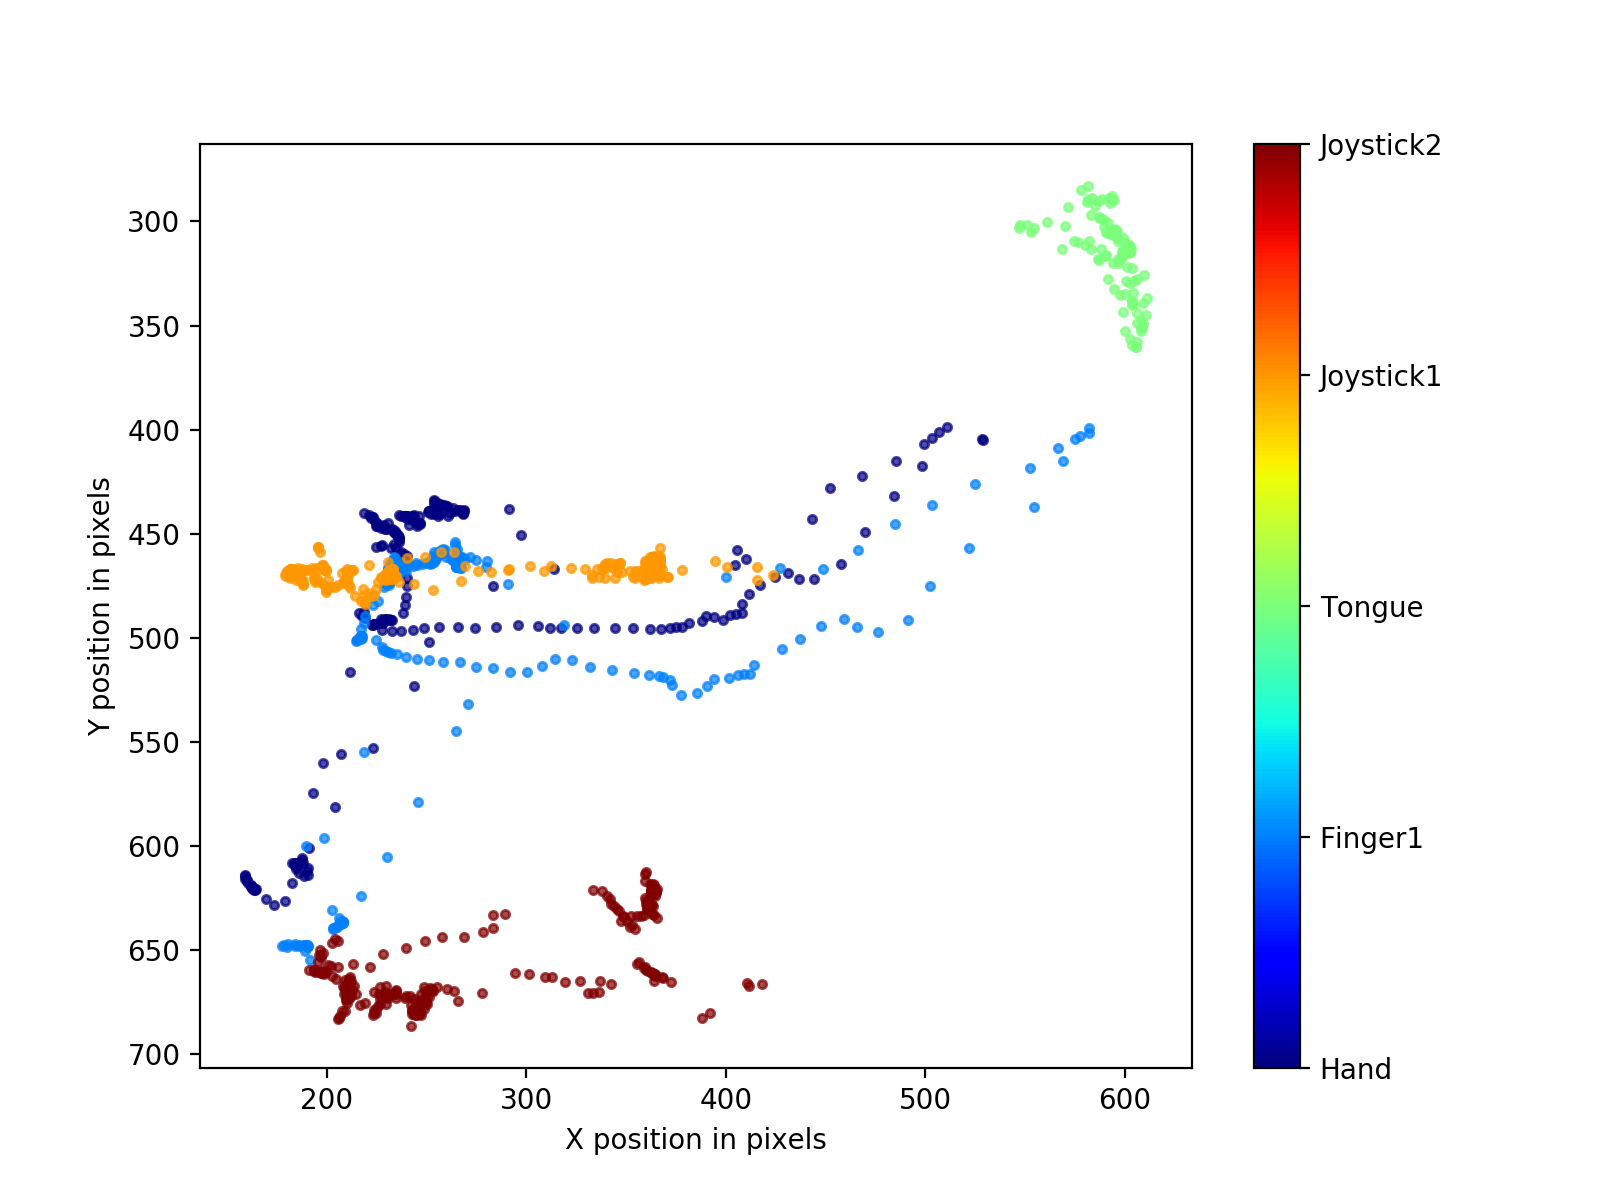

<IPython.core.display.Javascript object>


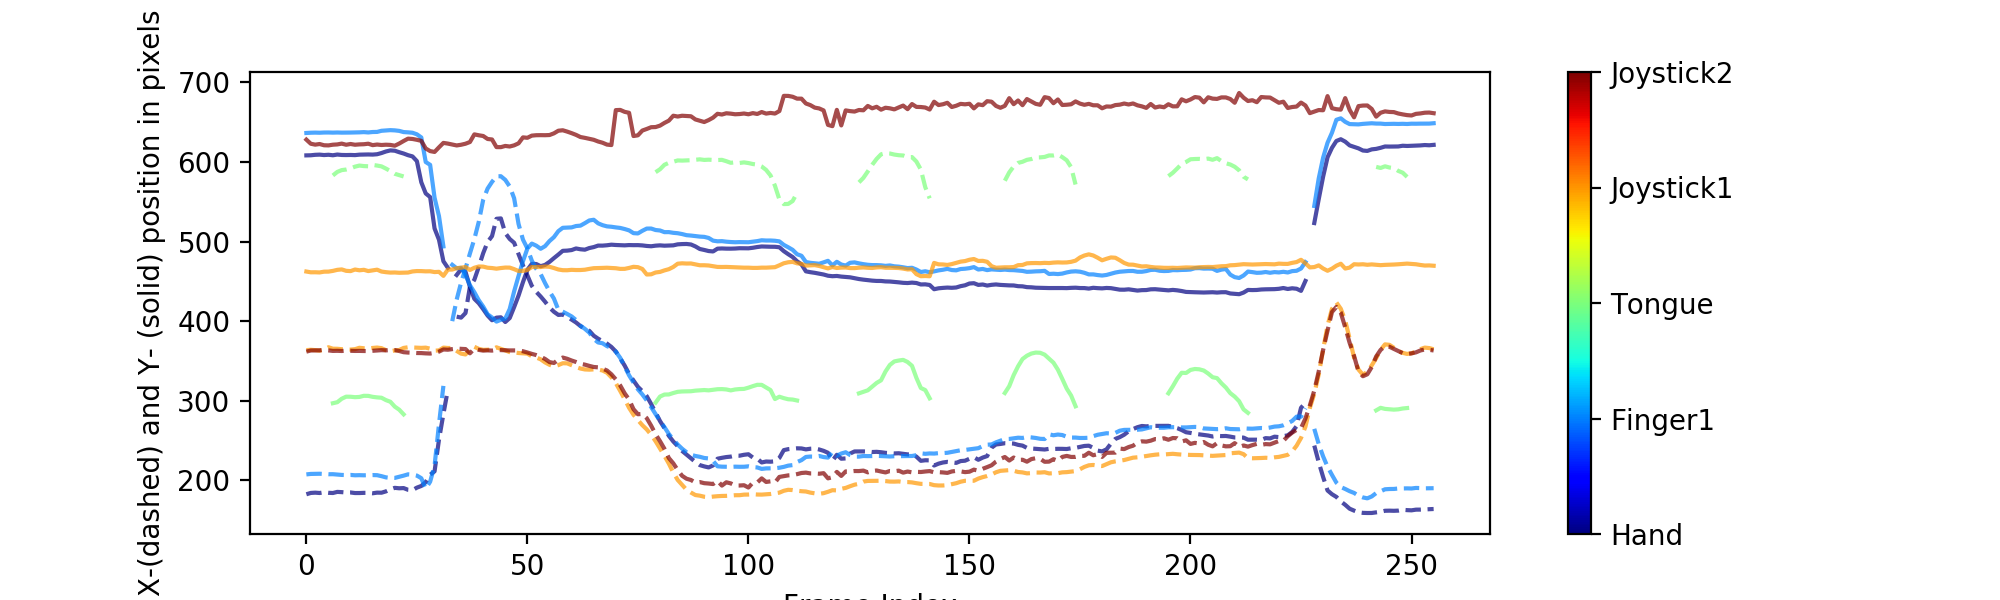

<IPython.core.display.Javascript object>


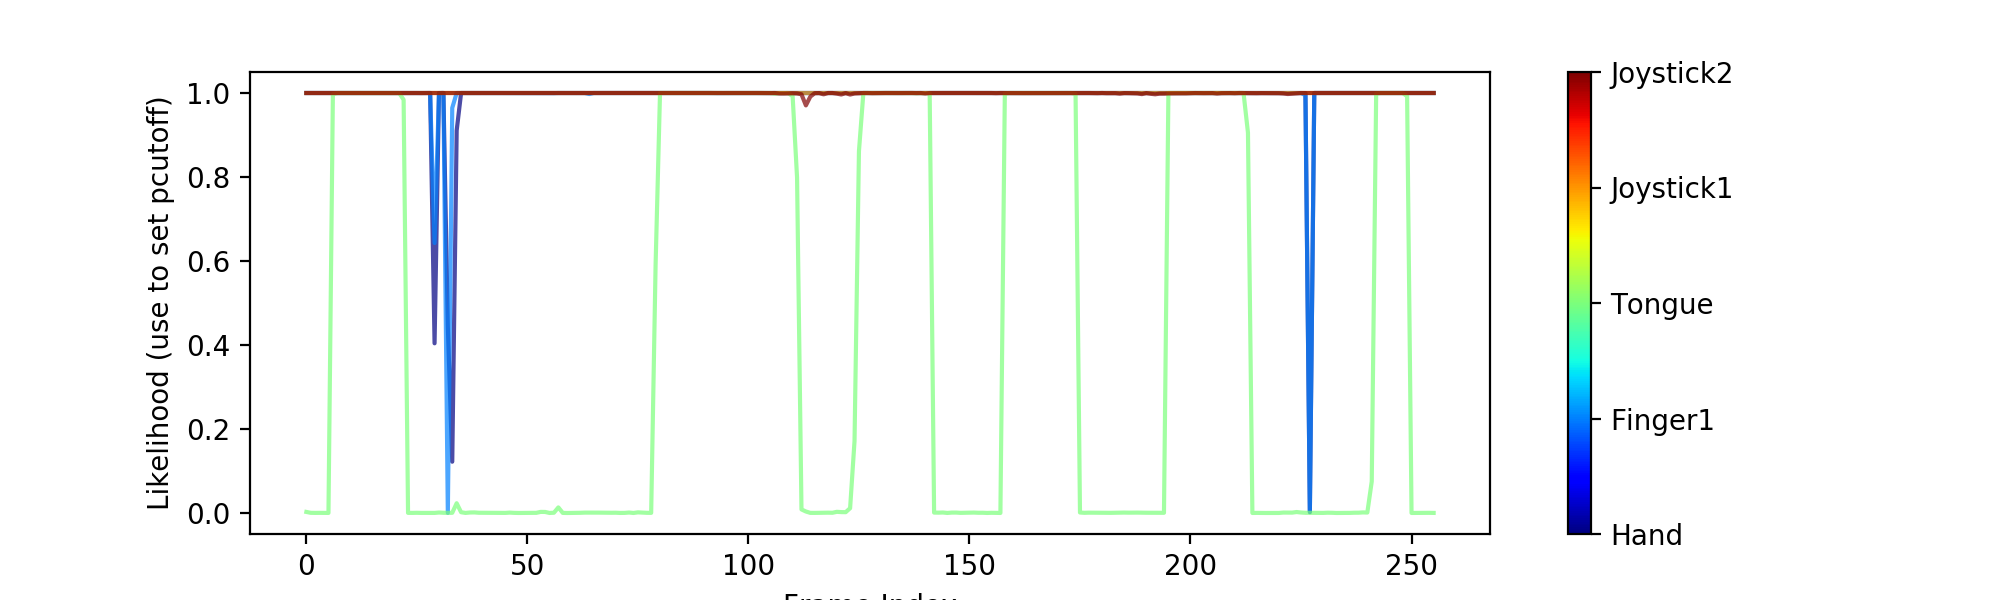

<IPython.core.display.Javascript object>


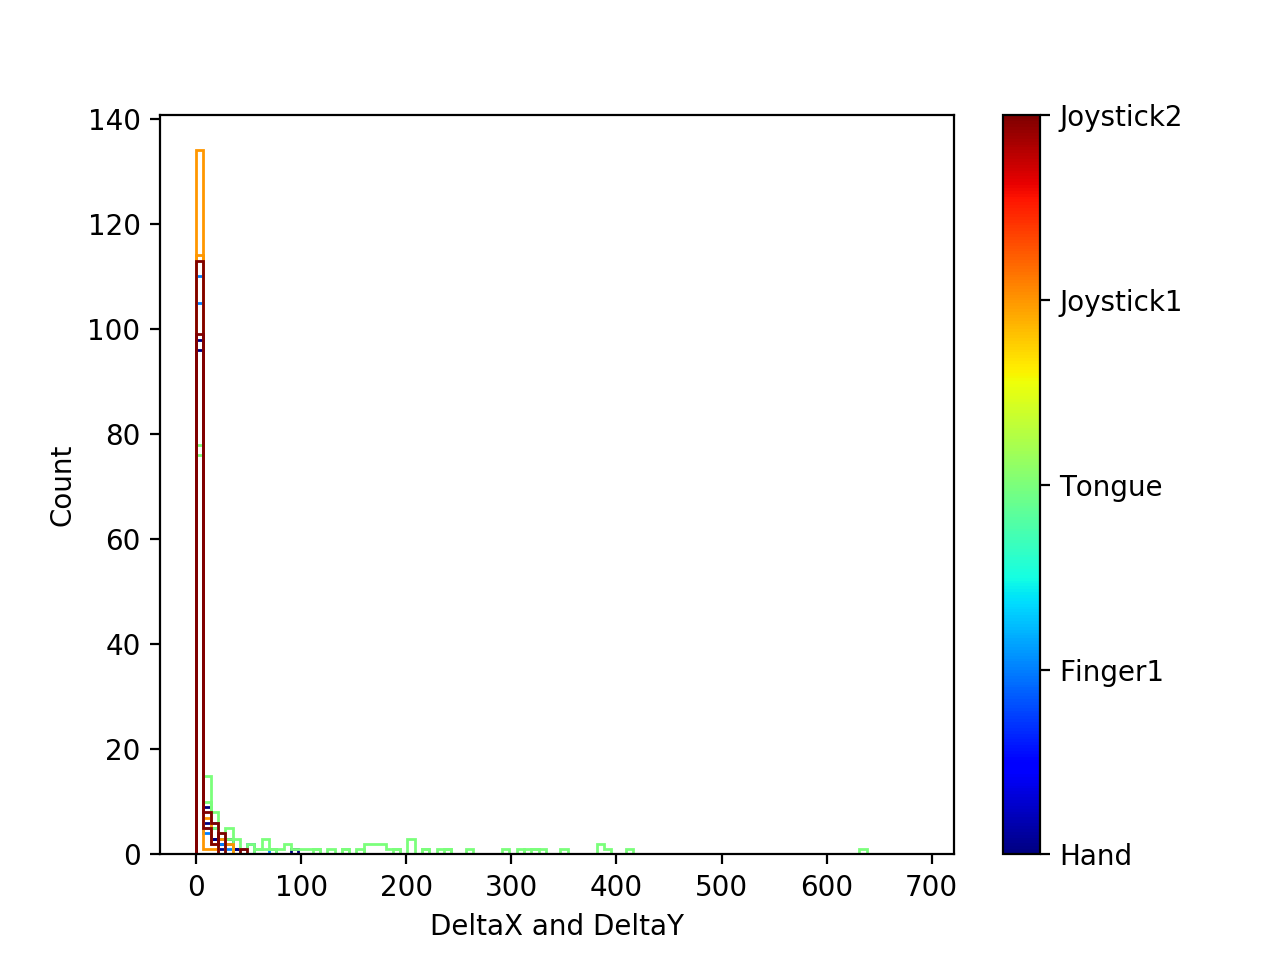

Plots created! Please check the directory "plot-poses" within the video directory


In [10]:
%matplotlib notebook
deeplabcut.plot_trajectories(path_config_file,[videofile_path],showfigures=True)

#These plots can are interactive and can be customized (see https://matplotlib.org/)

## Extract outlier frames, where the predictions are off.

This is optional step allows to add more training data when the evaluation results are poor. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

In [11]:
# Note, if you have questions on parameters, remember "?" gives you answers:
deeplabcut.extract_outlier_frames?

Method  uncertain  found  145  putative outlier frames.
Do you want to proceed with extracting  40  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
yes/noyes


0it [00:00, ?it/s]

Frames from video reachingvideo1  already extracted (more will be added)!
Loading video...
Duration of video [s]:  8.533333 , recorded @  30.0 fps!
Overall # of frames:  256 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 8.53  seconds.
Extracting and downsampling... 144  frames from the video.


144it [00:06, 22.78it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [23, 180, 54, 232, 122, 47, 238, 76, 66, 35, 236, 58, 227, 193, 253, 28, 152, 220, 71, 4, 32, 49, 37, 224, 177, 228, 45, 229, 50, 114, 156, 77, 55, 30, 40, 214, 230, 231, 142, 233]


<IPython.core.display.Javascript object>


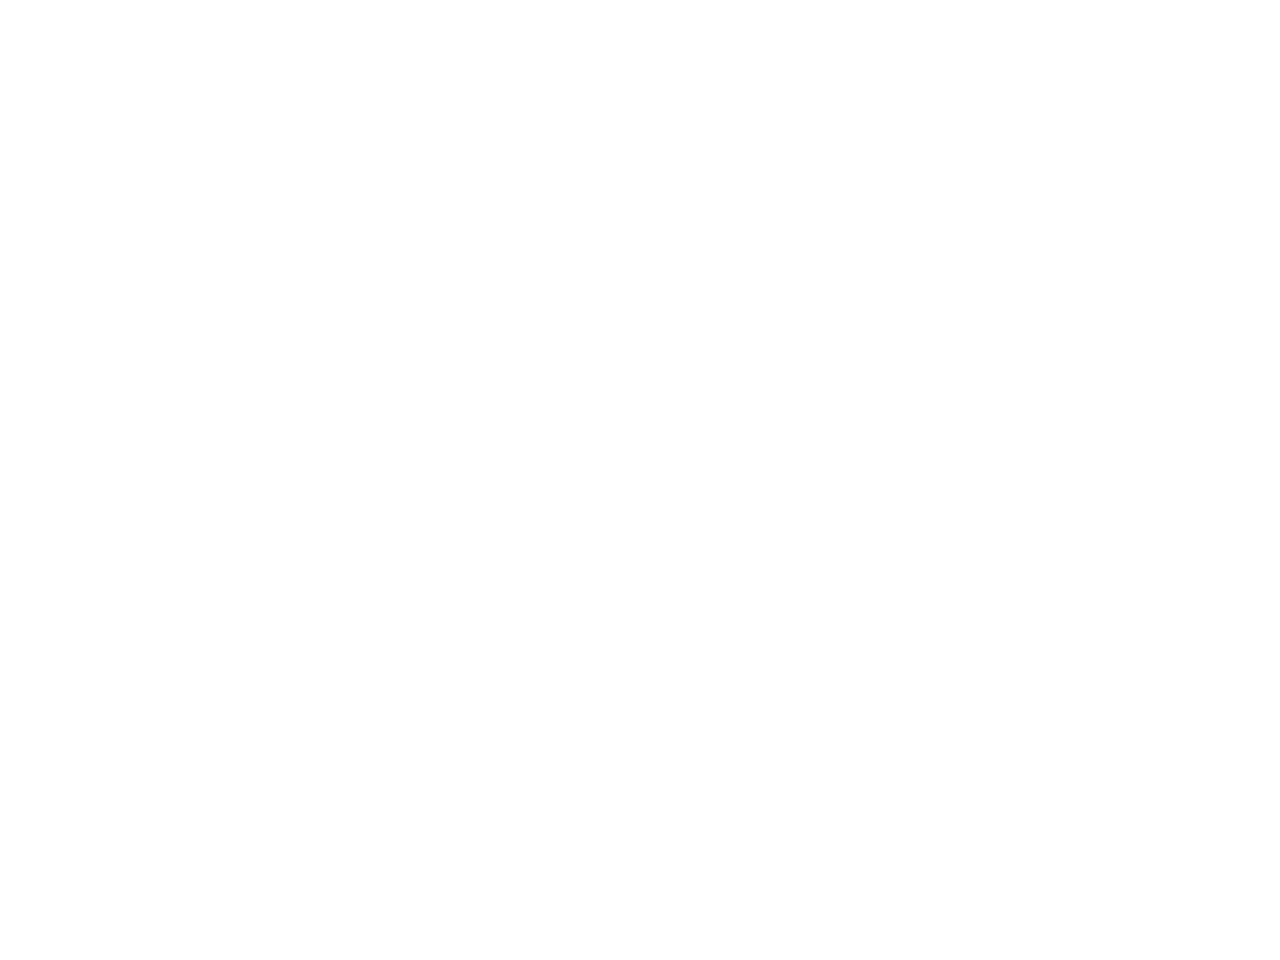

<IPython.core.display.Javascript object>


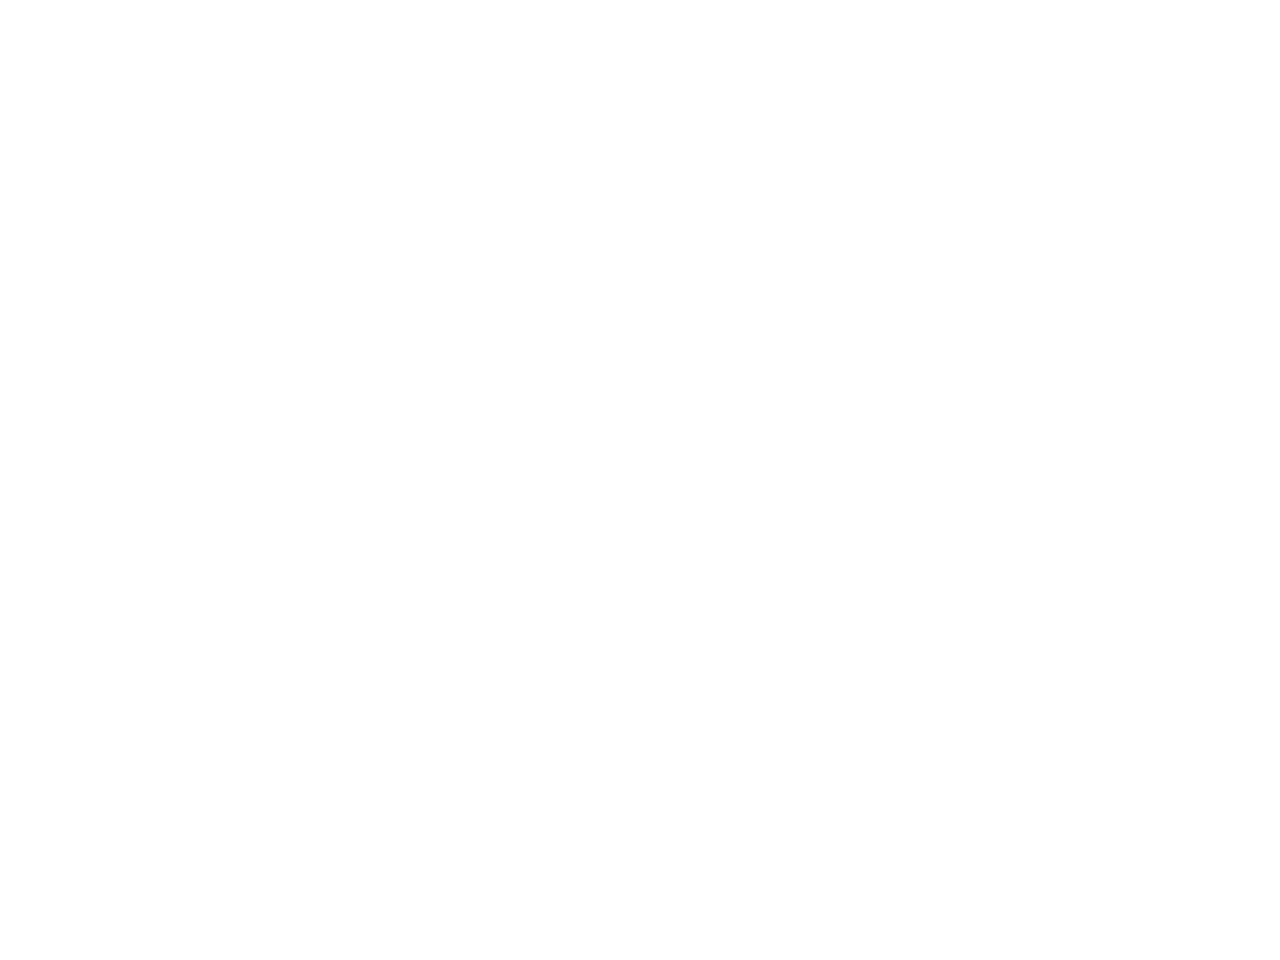

<IPython.core.display.Javascript object>


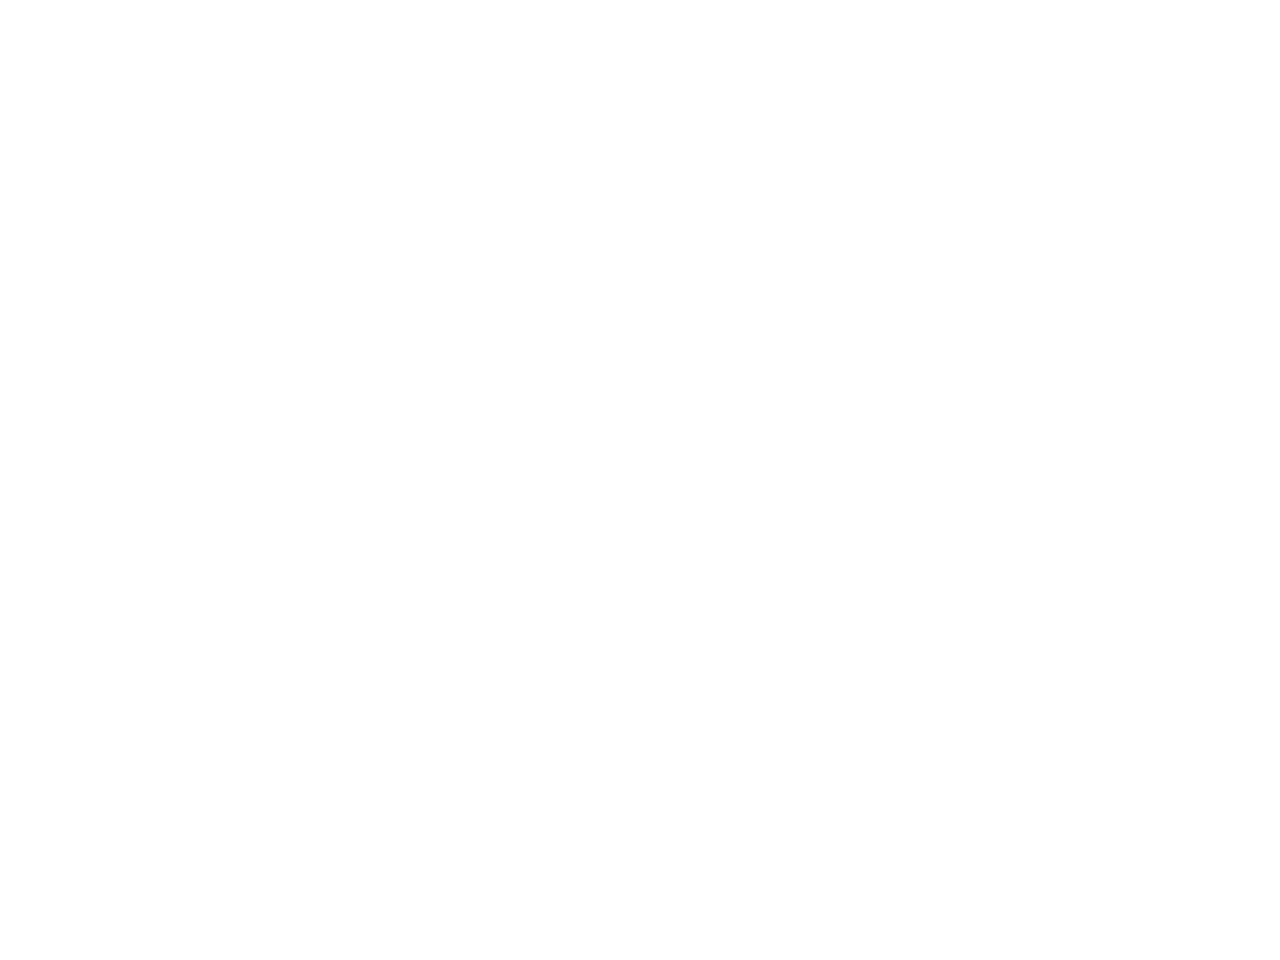

<IPython.core.display.Javascript object>


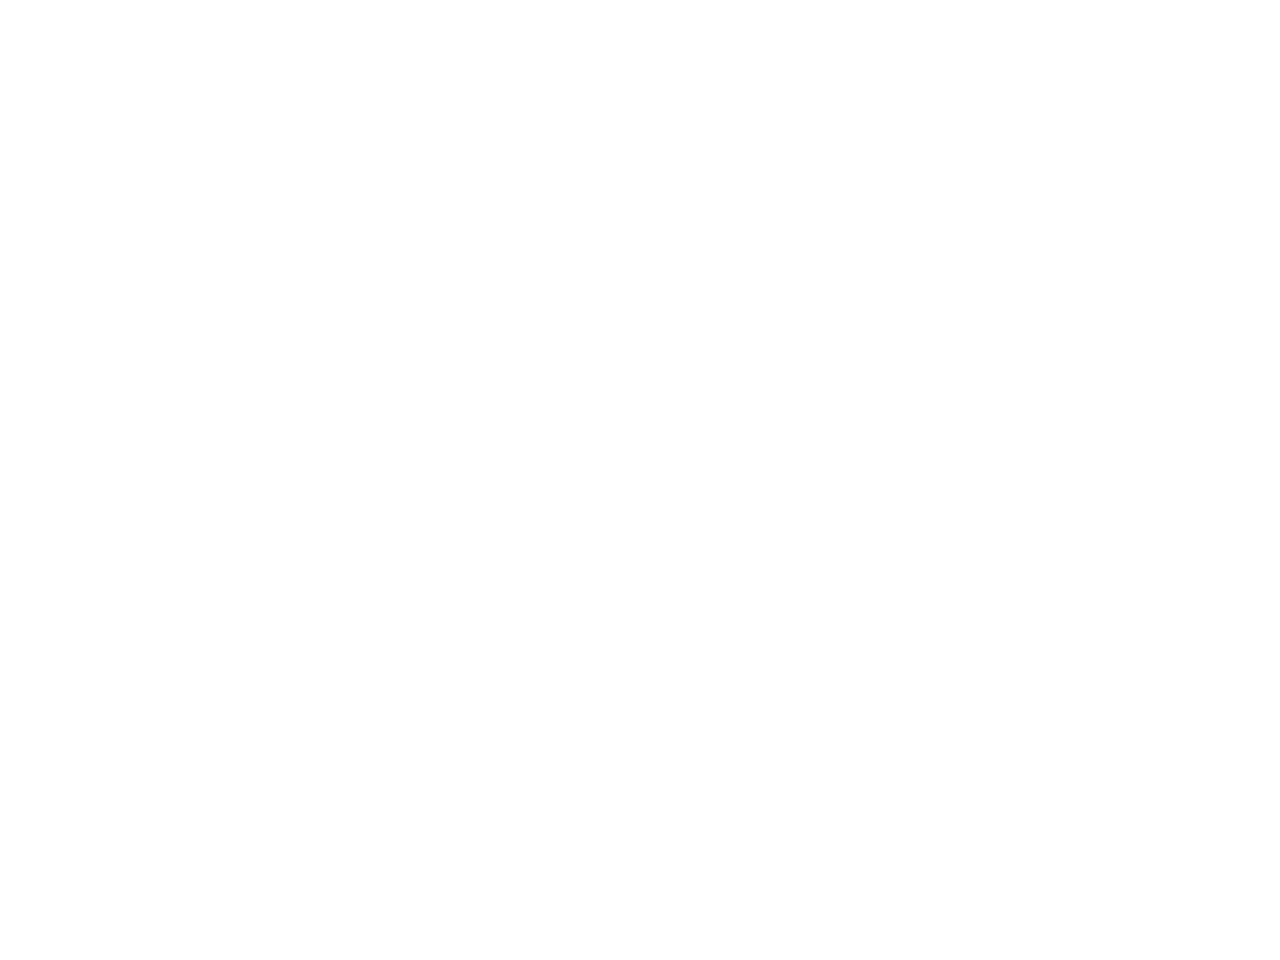

<IPython.core.display.Javascript object>


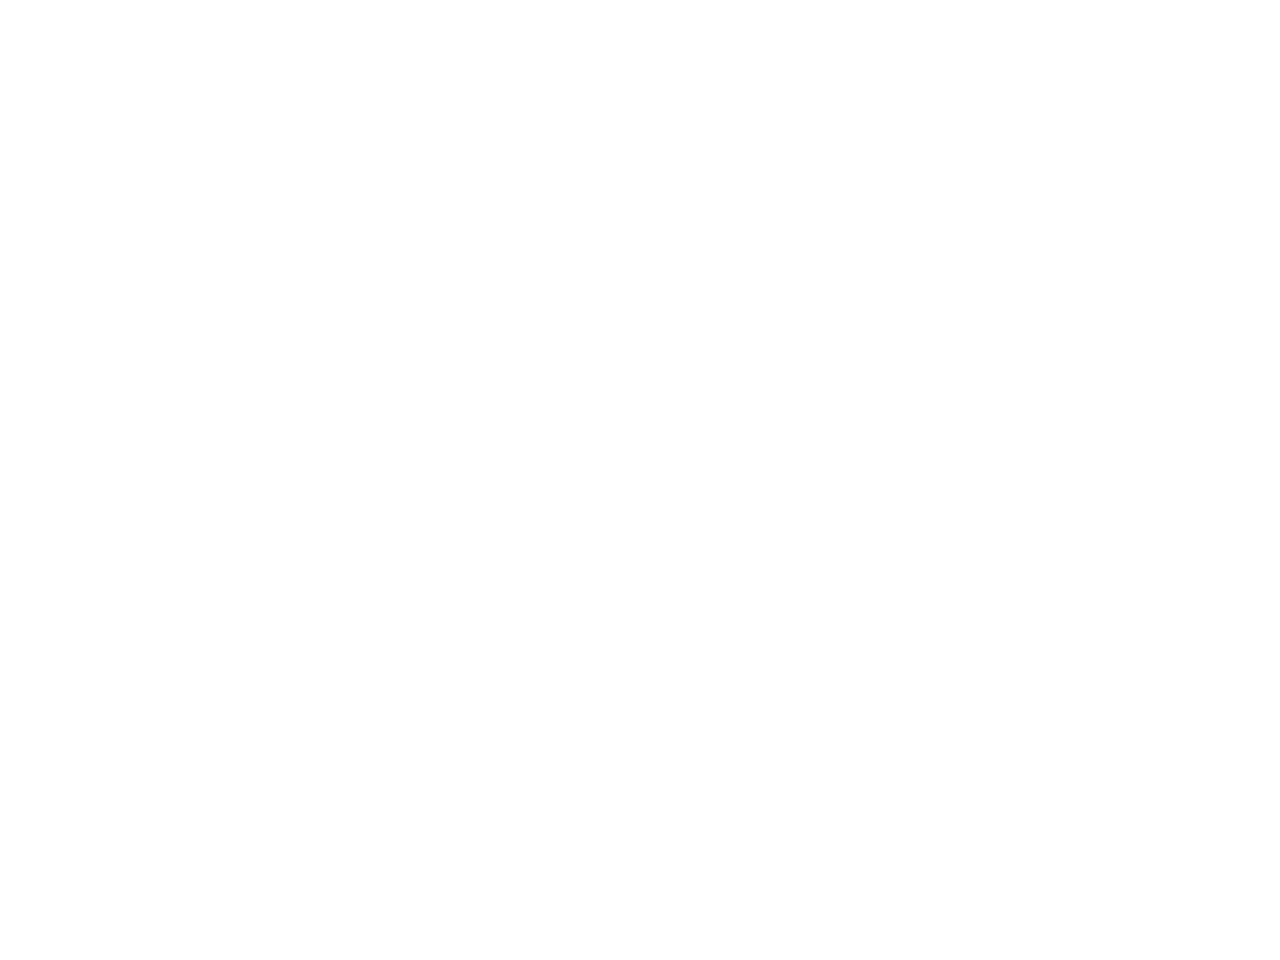

<IPython.core.display.Javascript object>


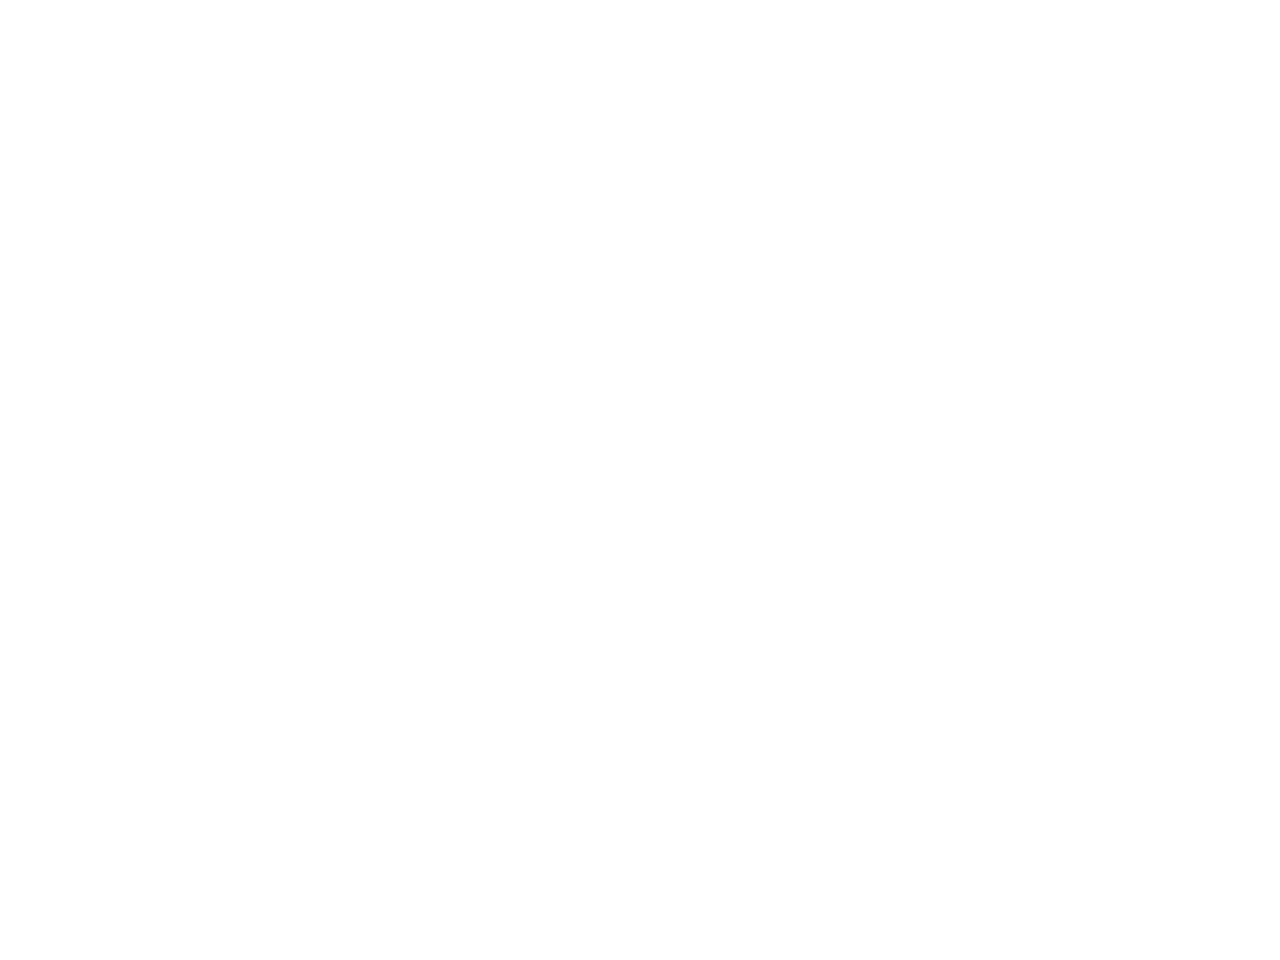

<IPython.core.display.Javascript object>


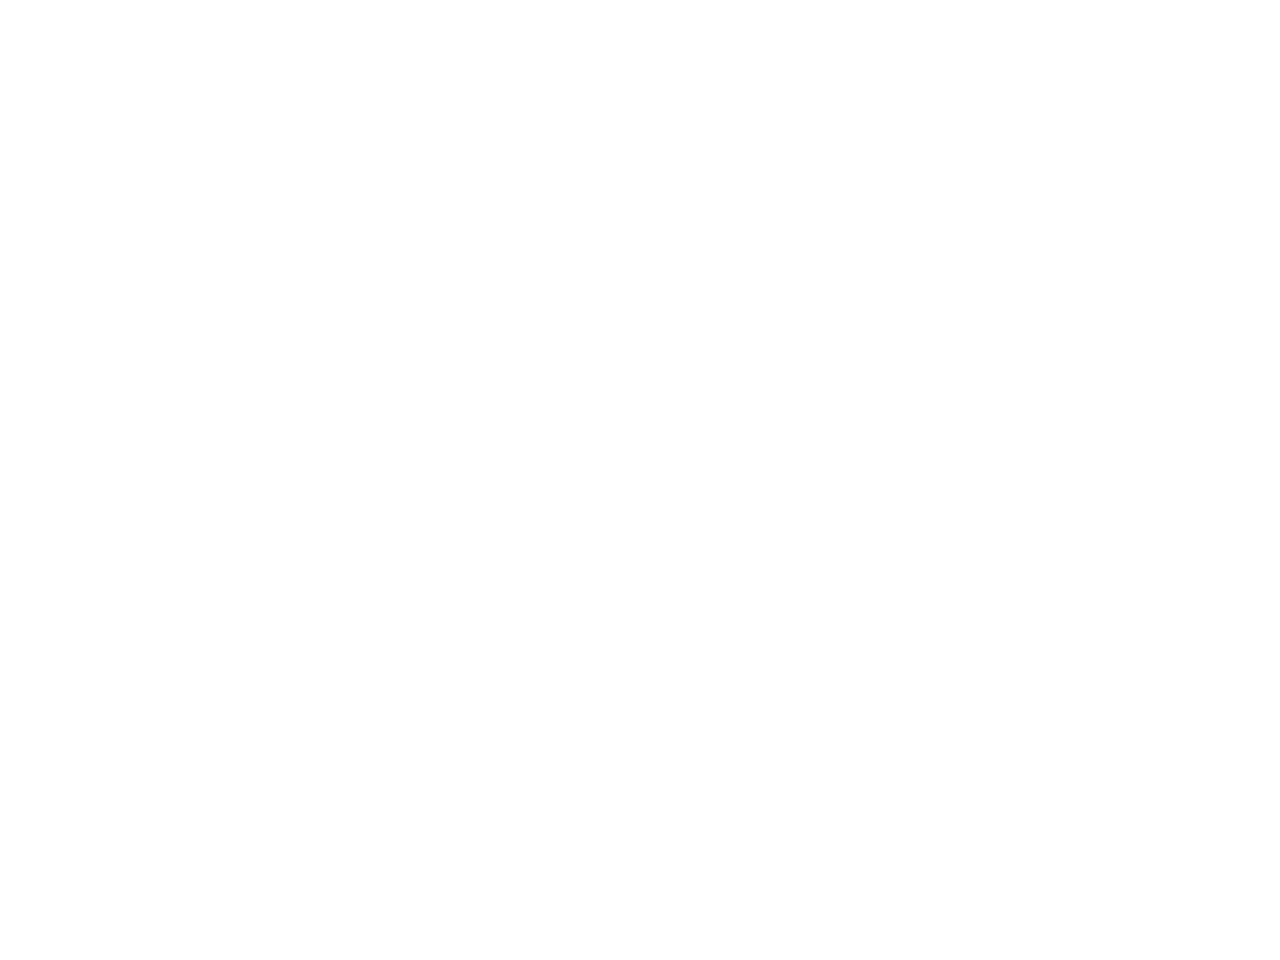

<IPython.core.display.Javascript object>


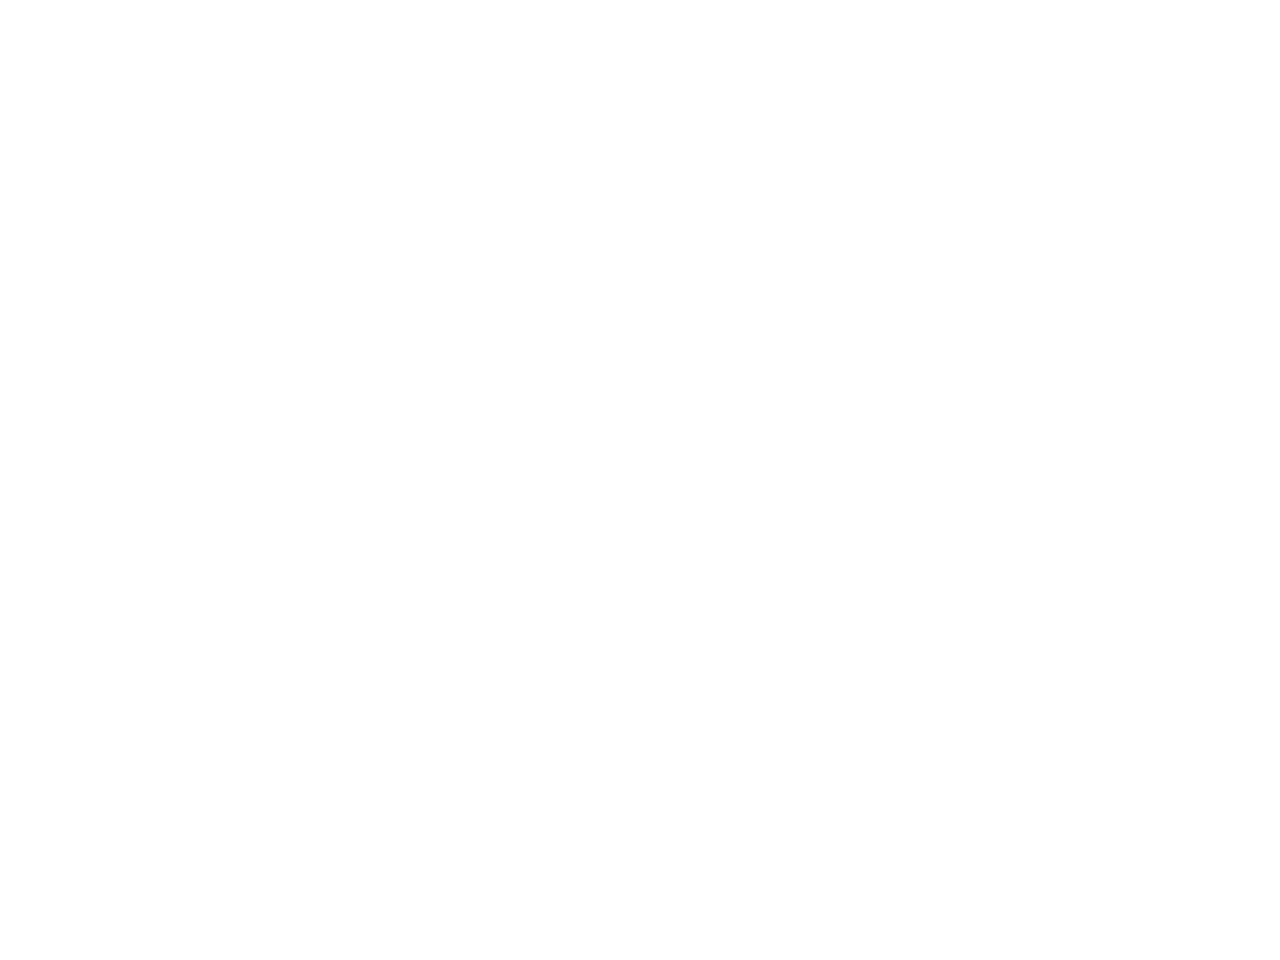

<IPython.core.display.Javascript object>


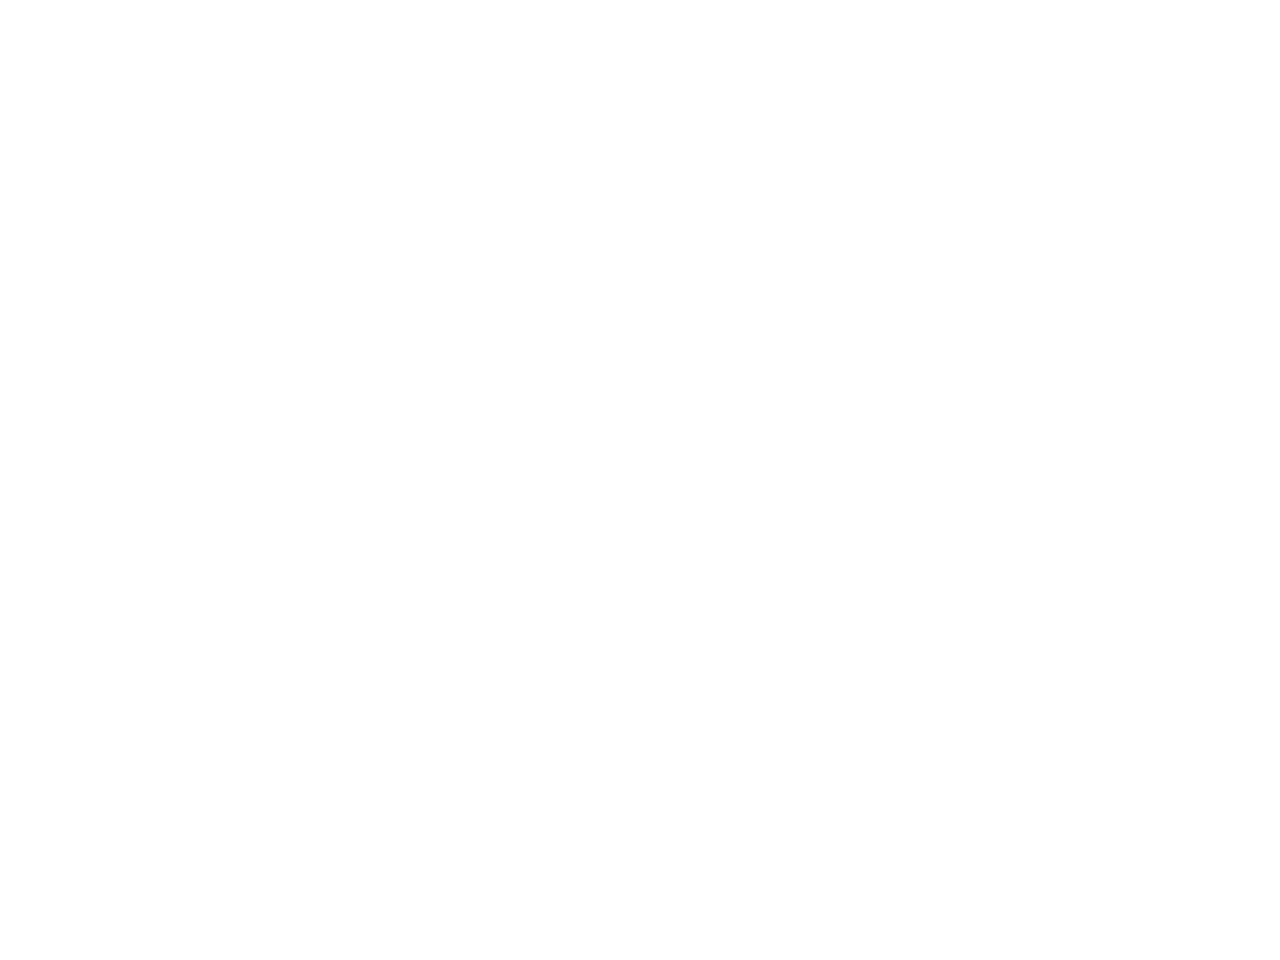

<IPython.core.display.Javascript object>


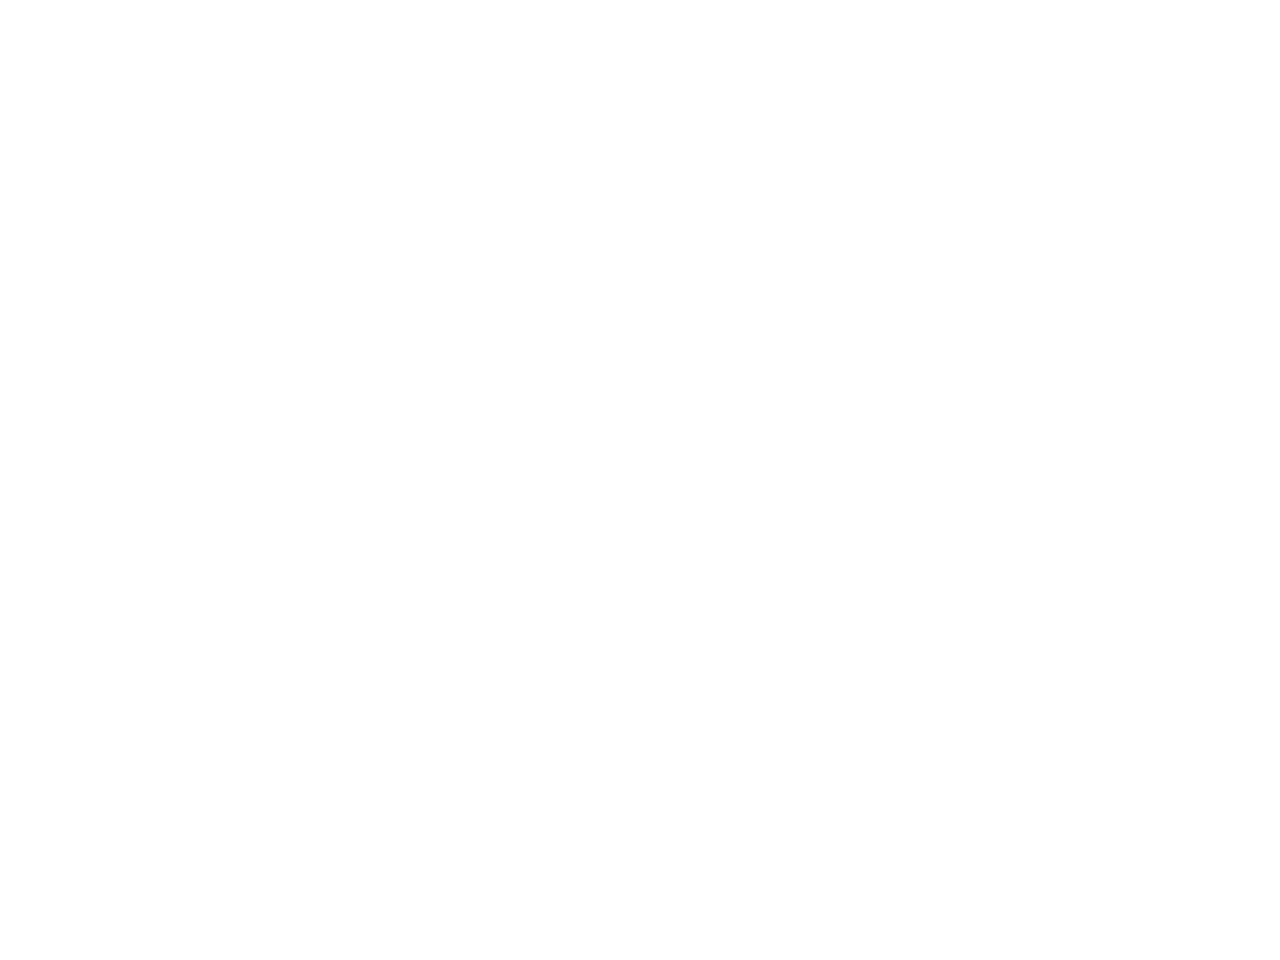

<IPython.core.display.Javascript object>


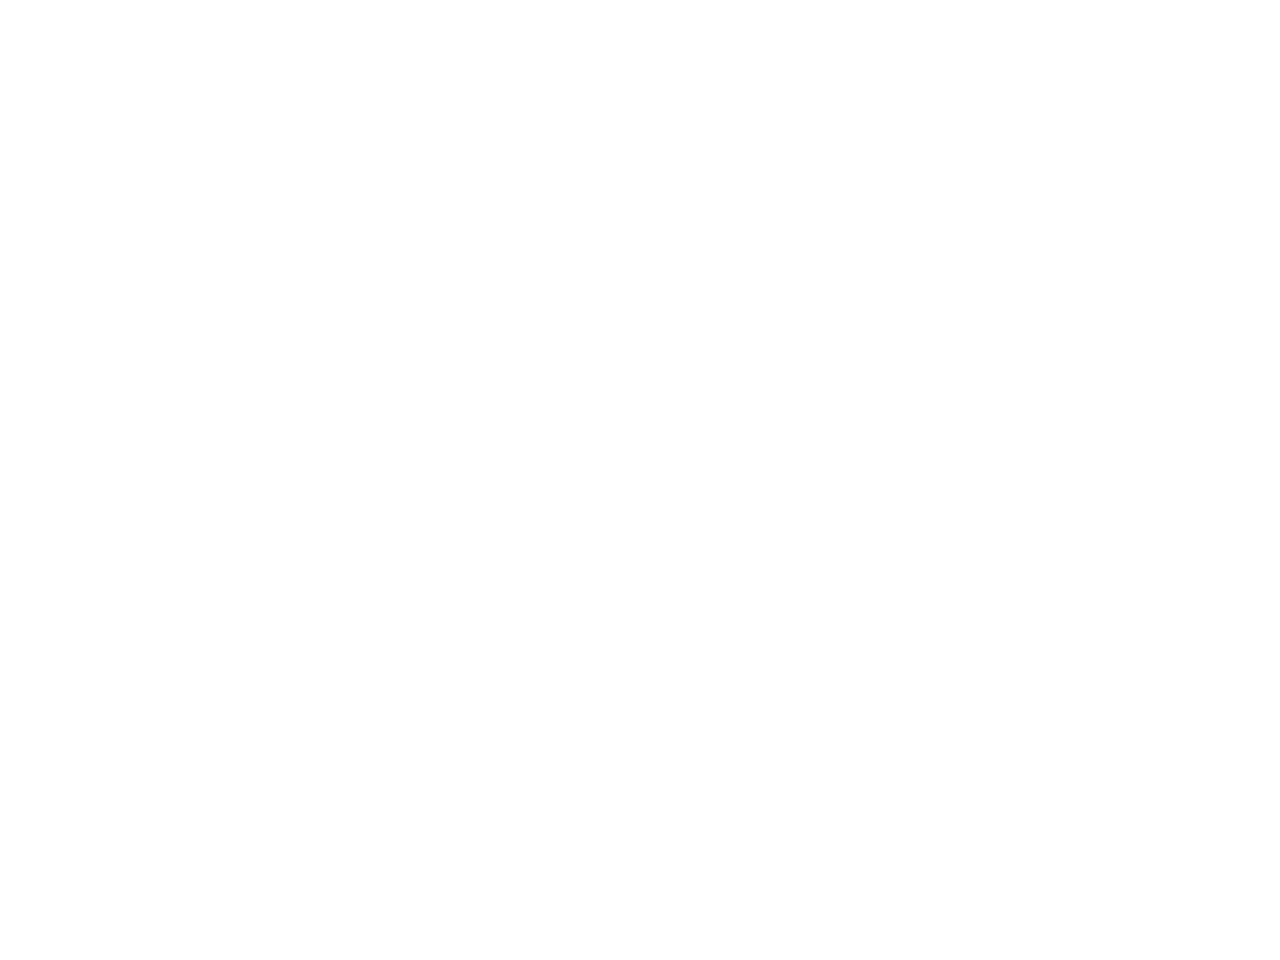

<IPython.core.display.Javascript object>


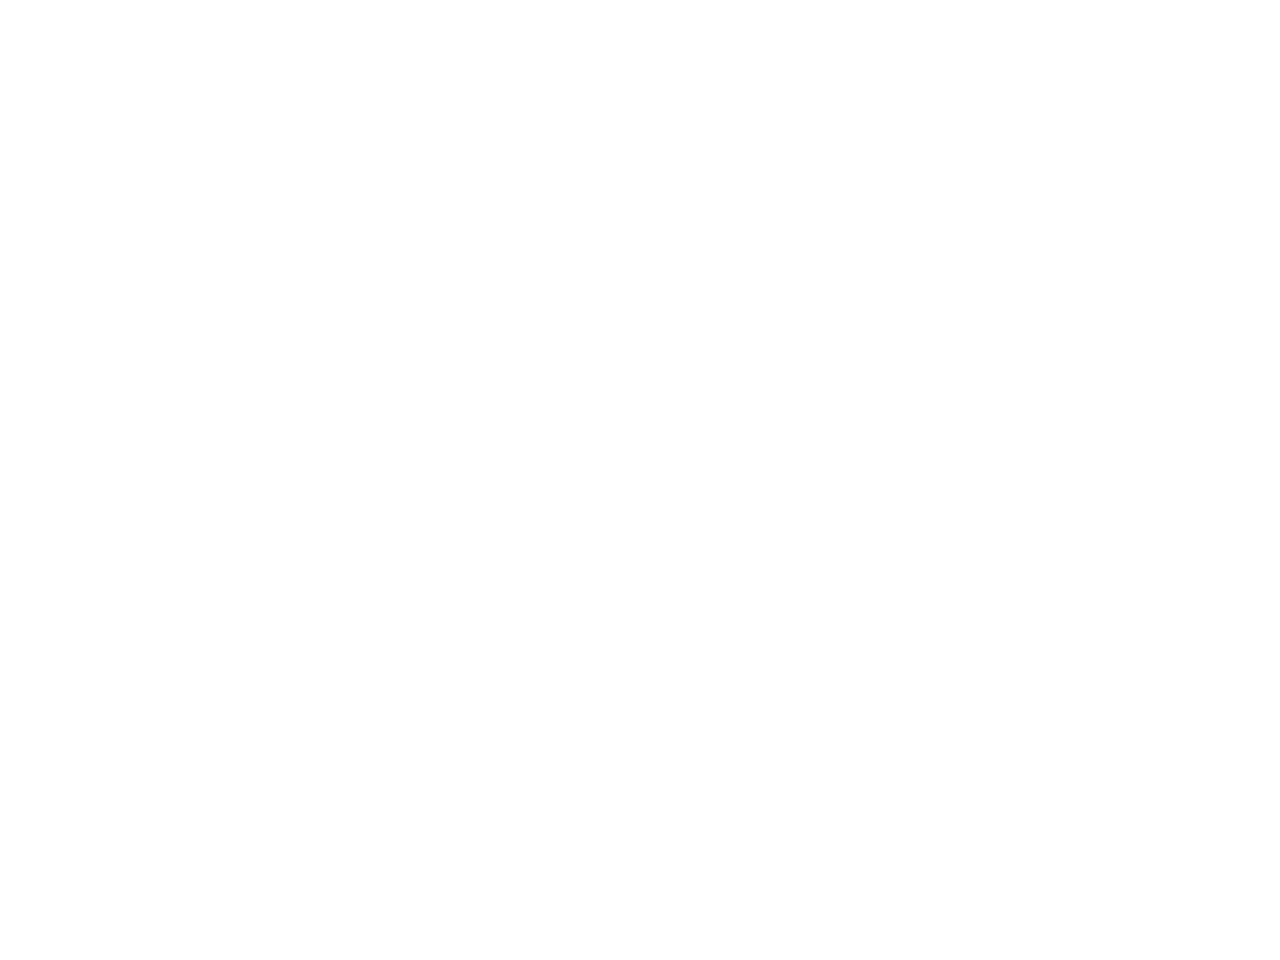

<IPython.core.display.Javascript object>


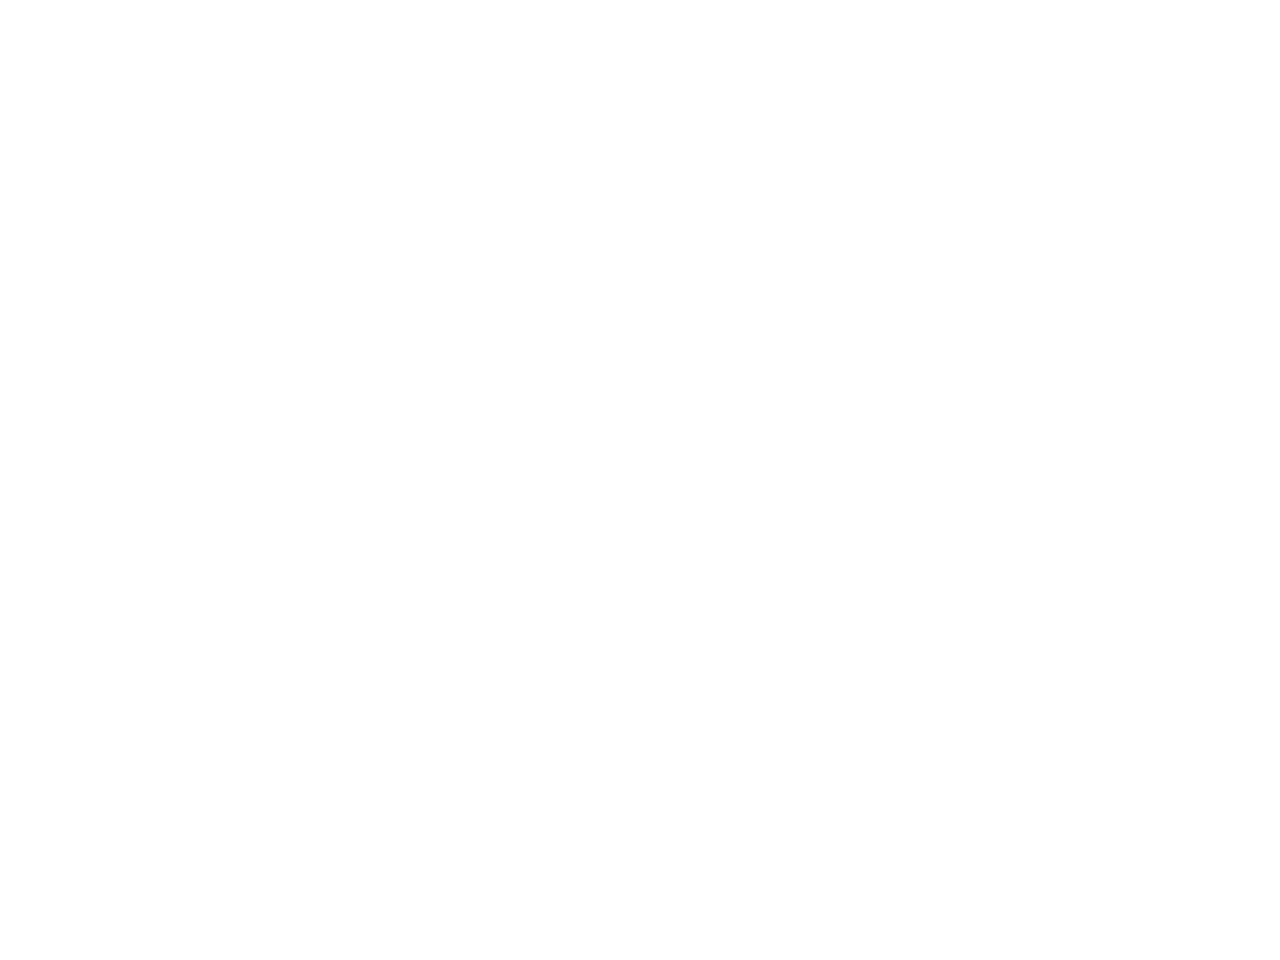

<IPython.core.display.Javascript object>


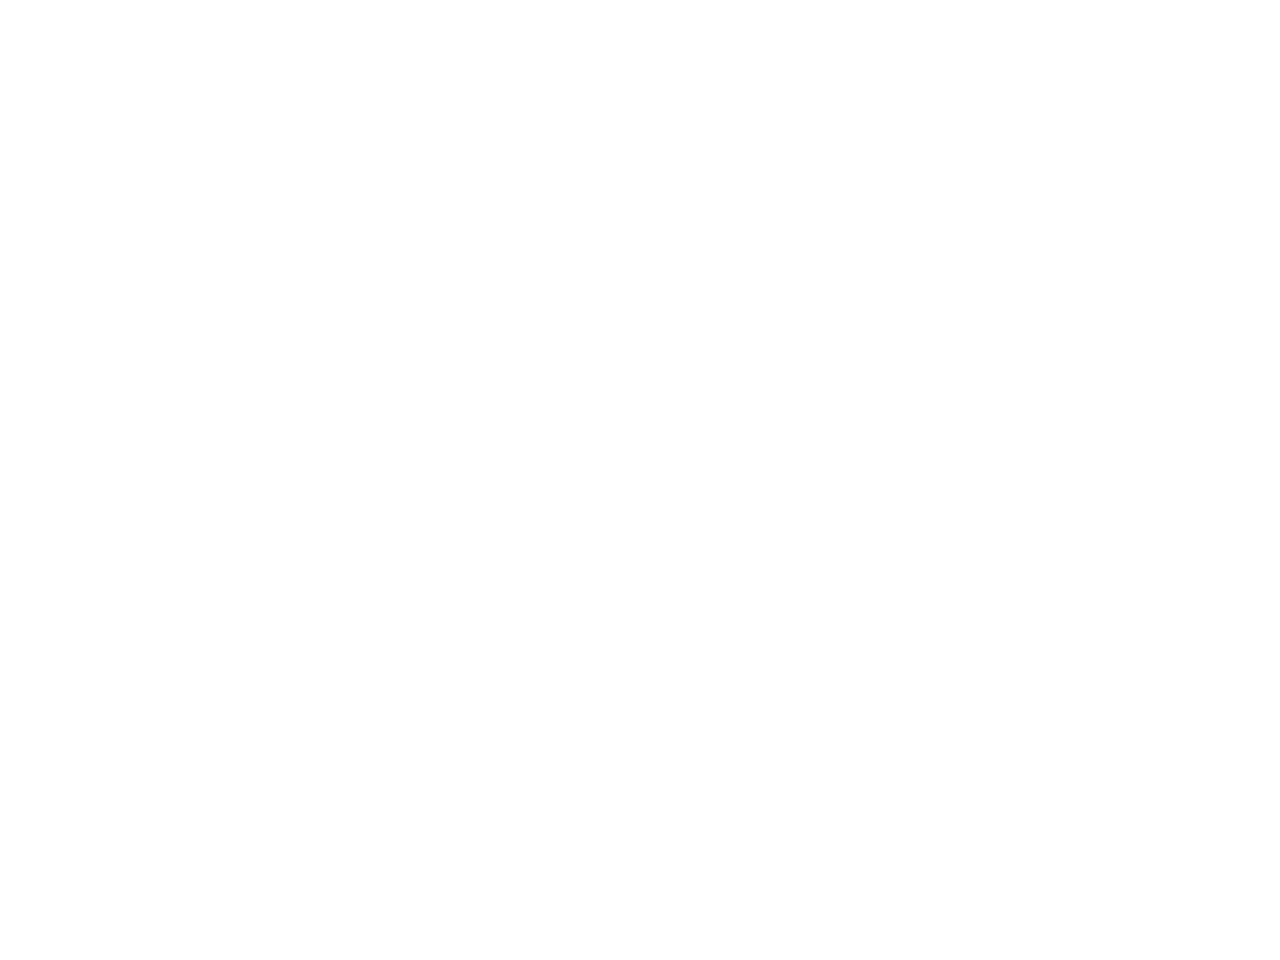

<IPython.core.display.Javascript object>


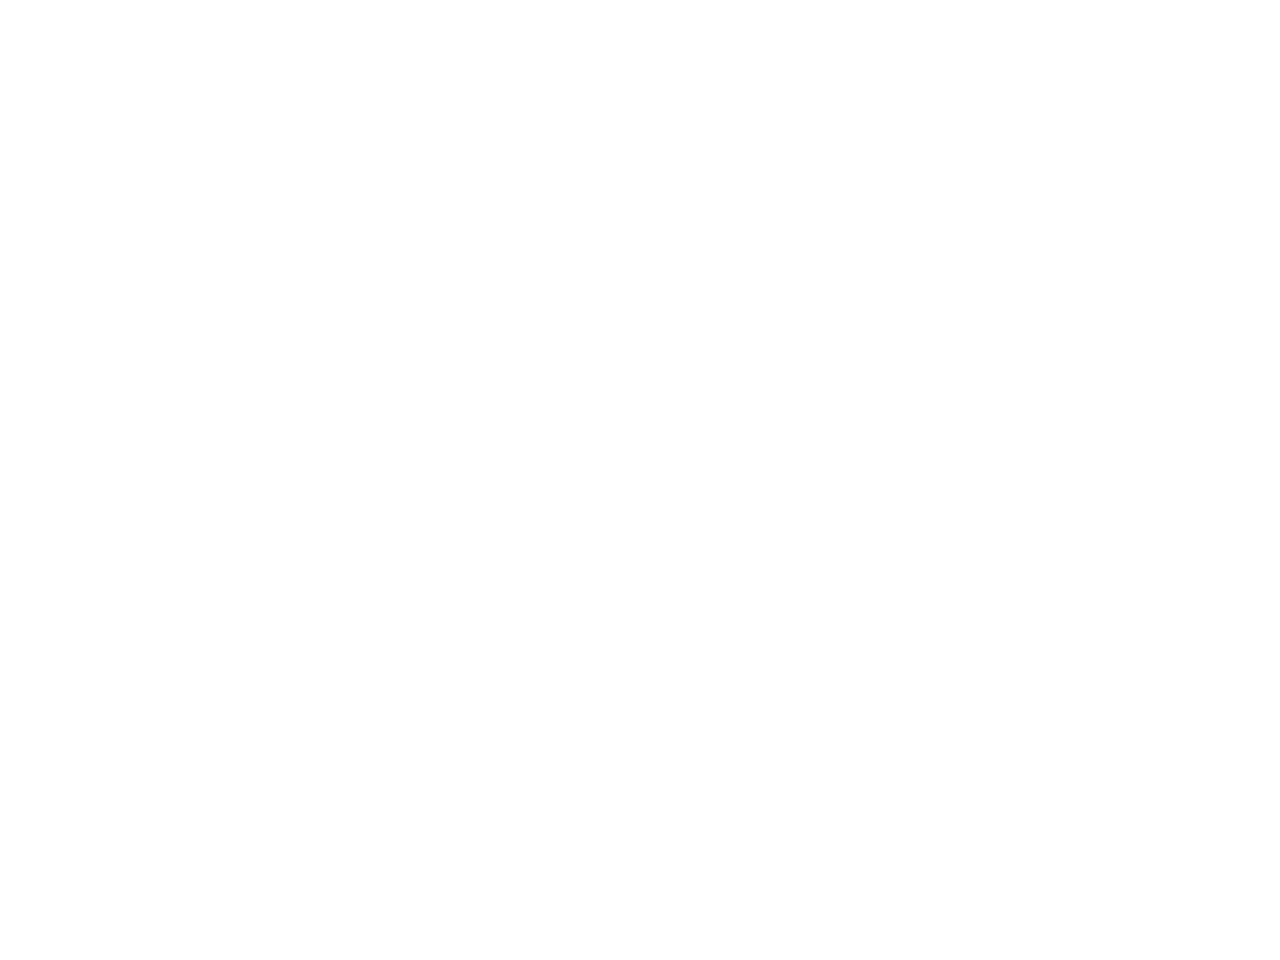

<IPython.core.display.Javascript object>


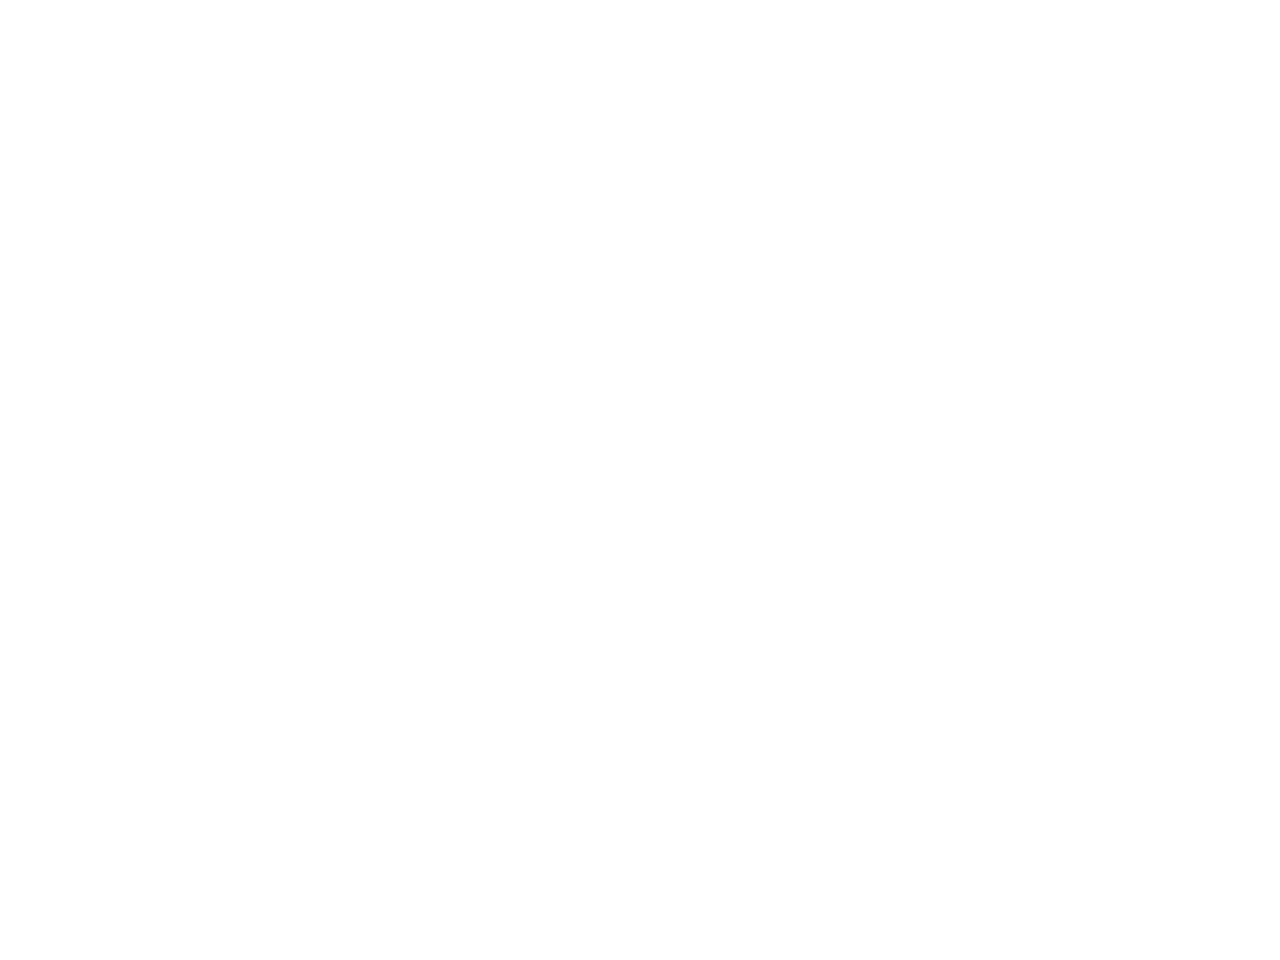

<IPython.core.display.Javascript object>


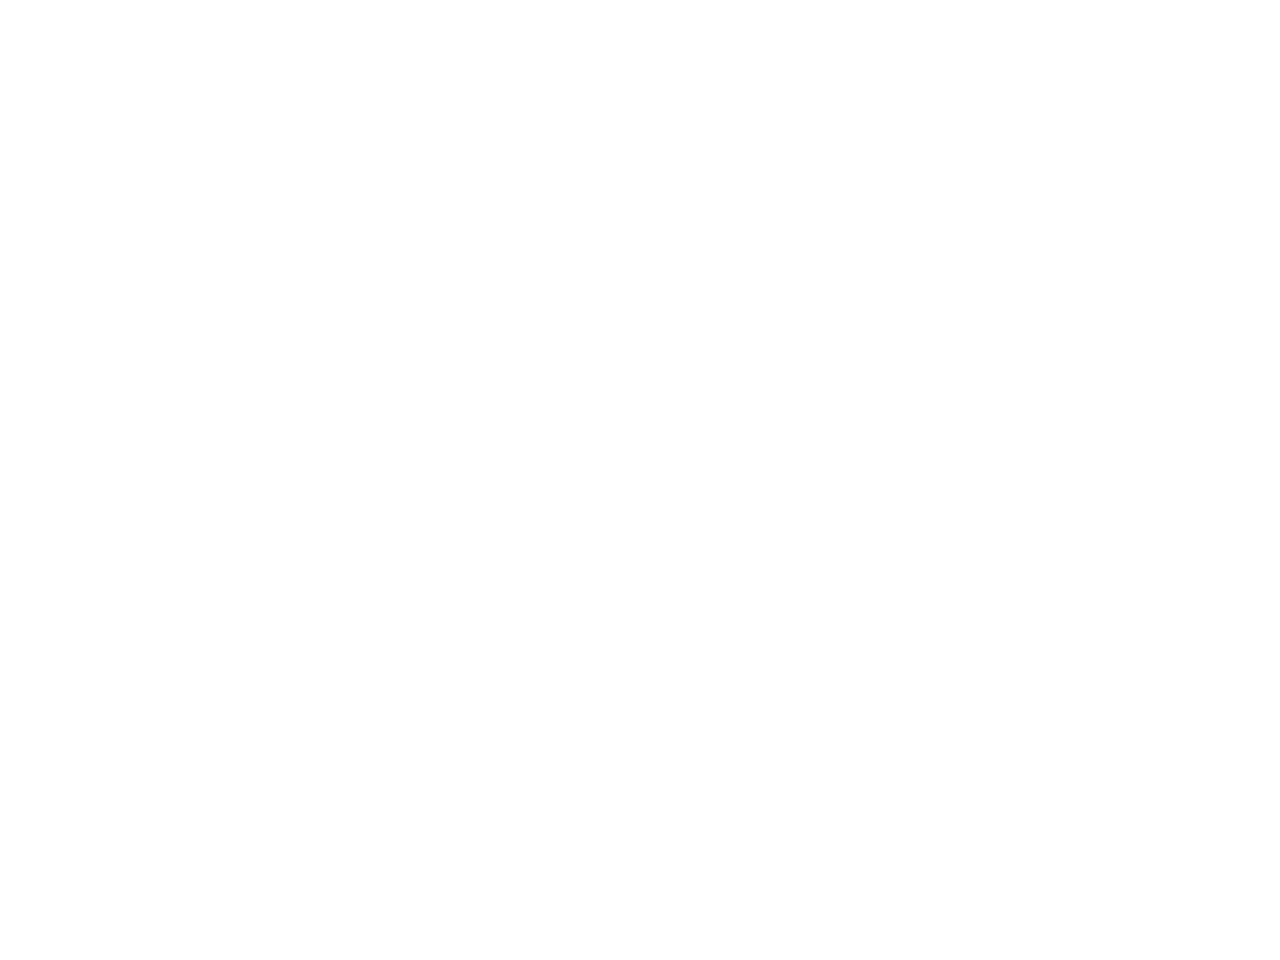

<IPython.core.display.Javascript object>


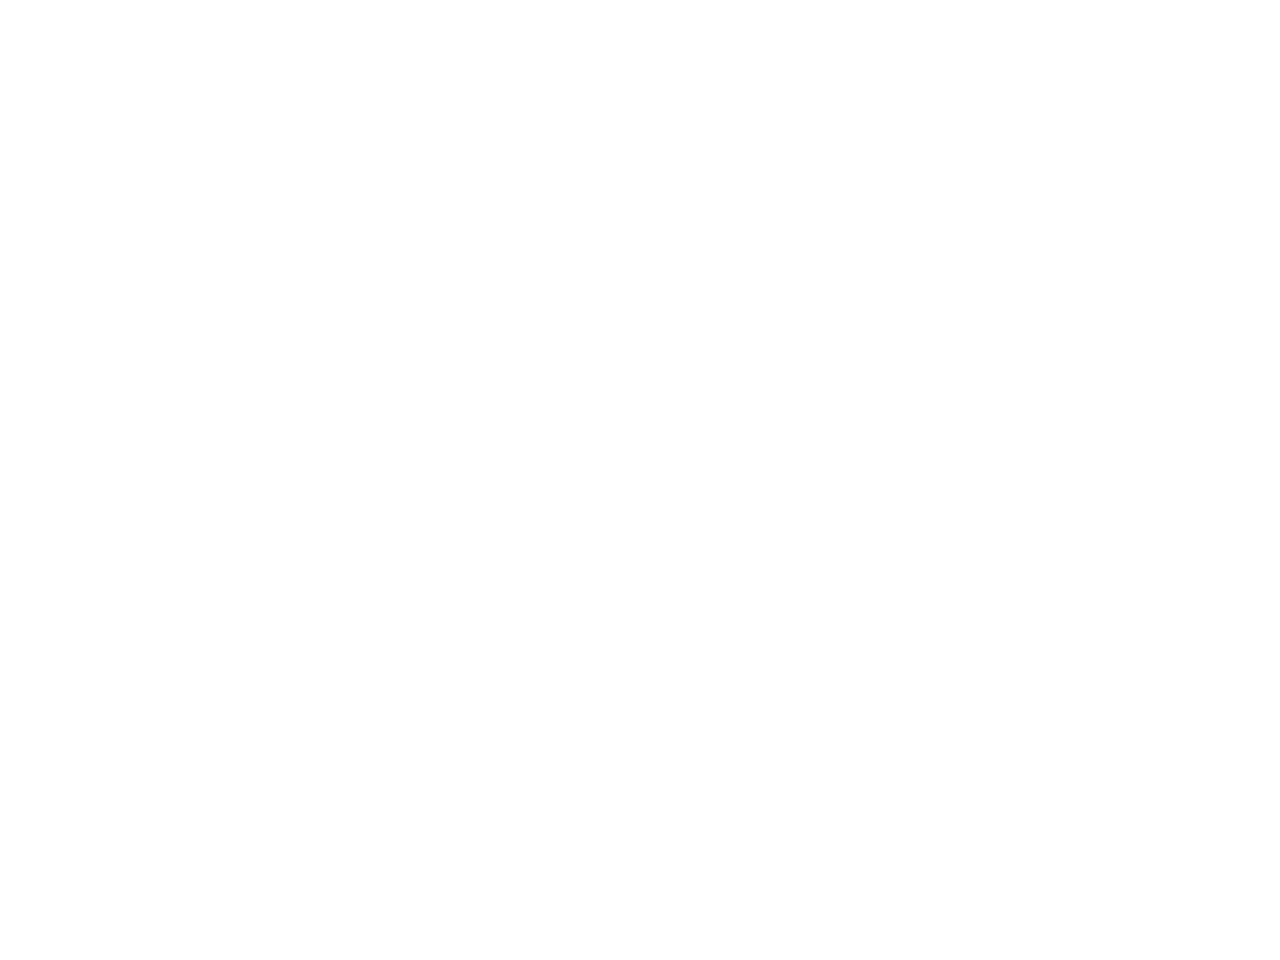

<IPython.core.display.Javascript object>


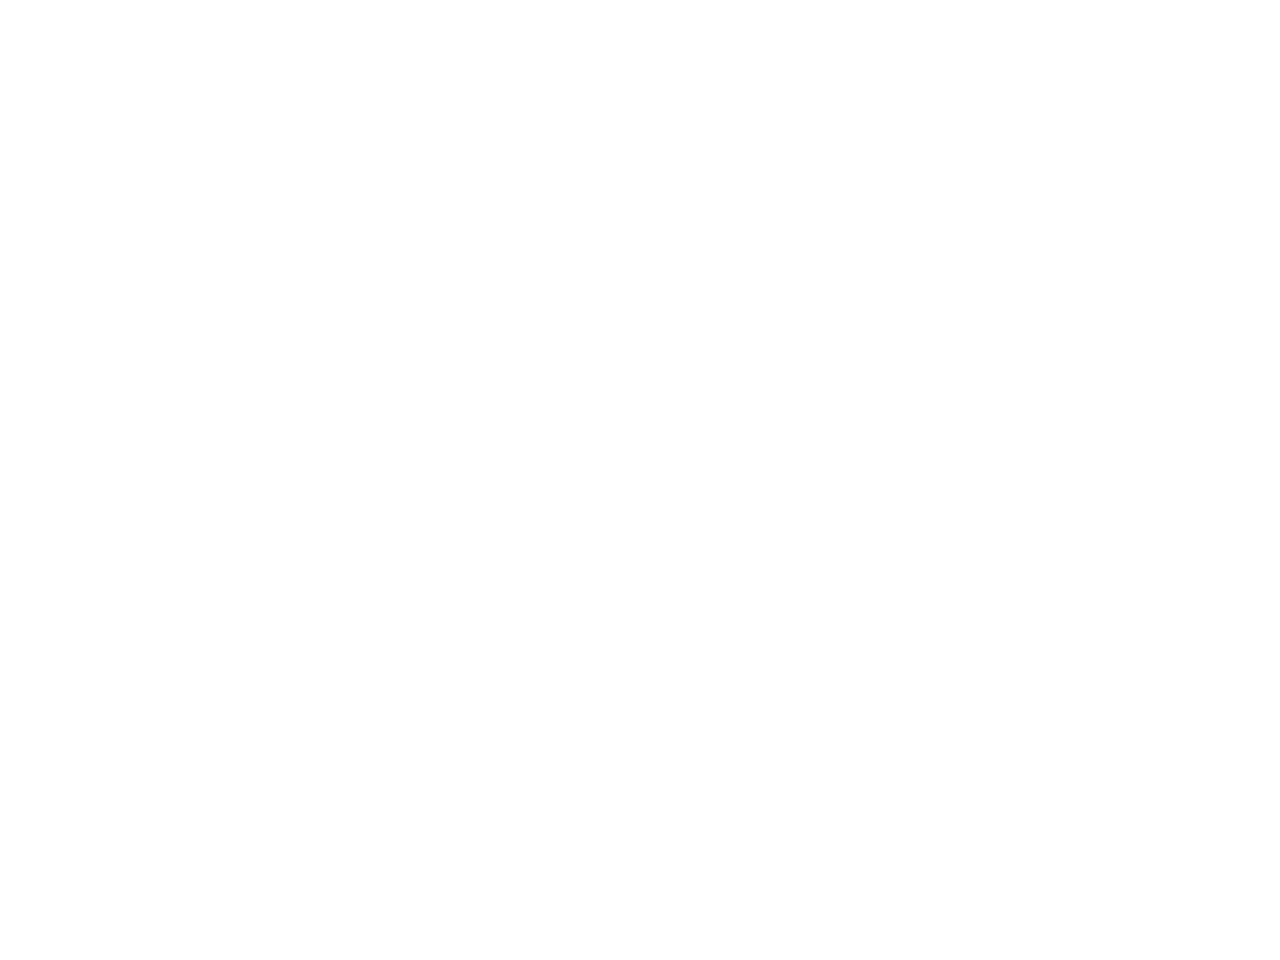

<IPython.core.display.Javascript object>


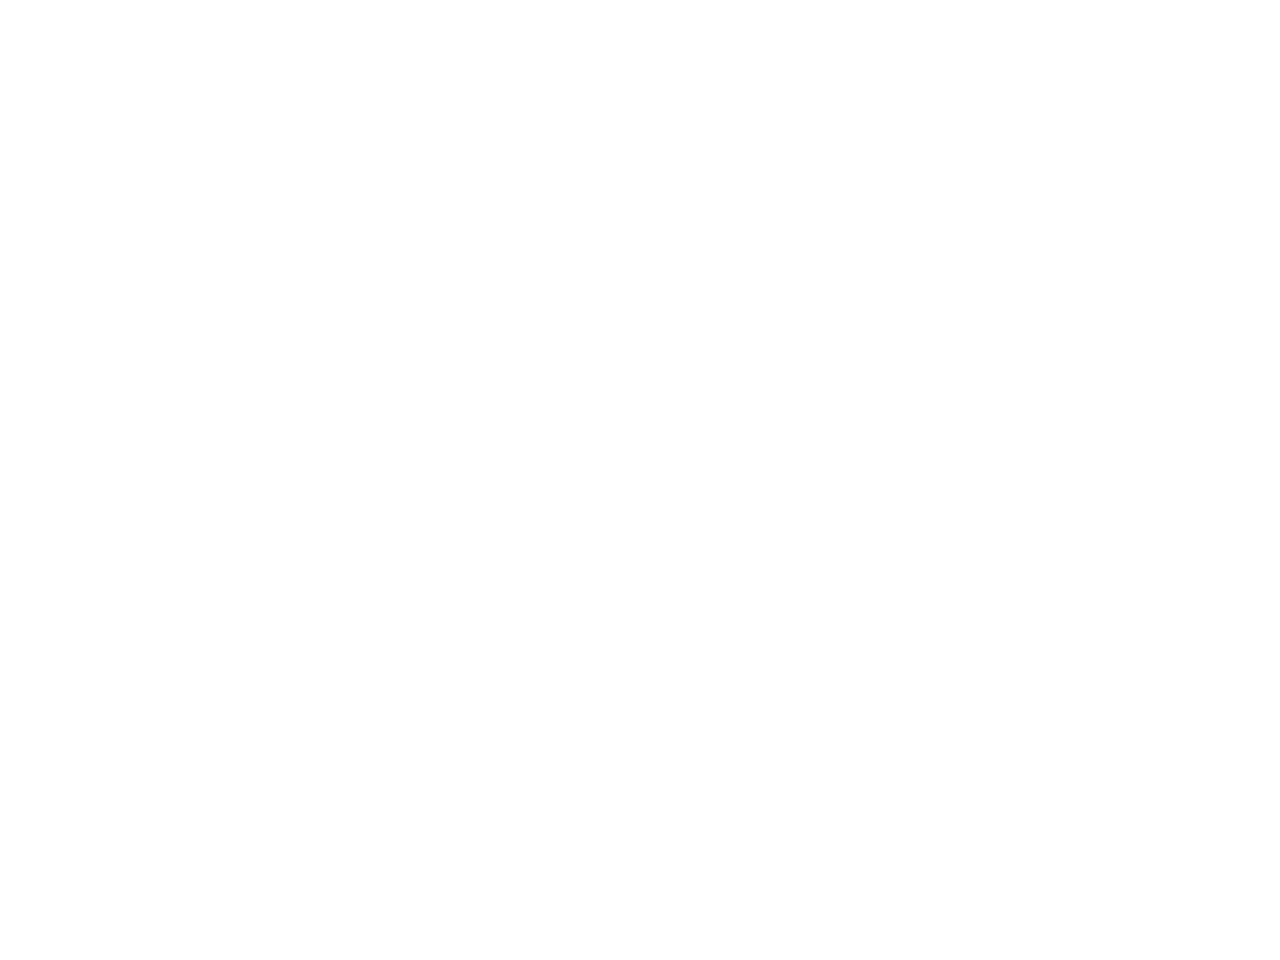

<IPython.core.display.Javascript object>


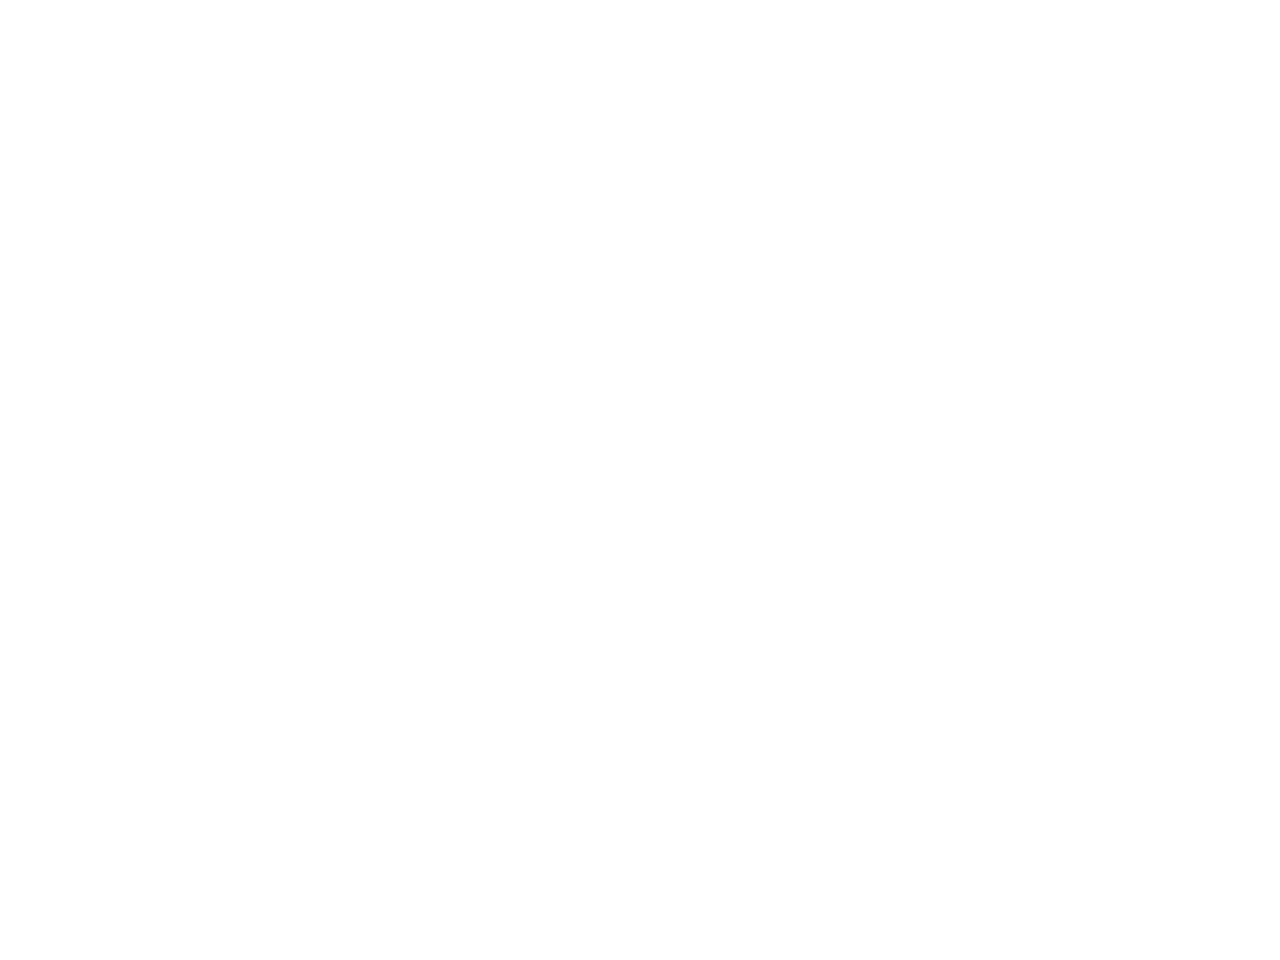

<IPython.core.display.Javascript object>


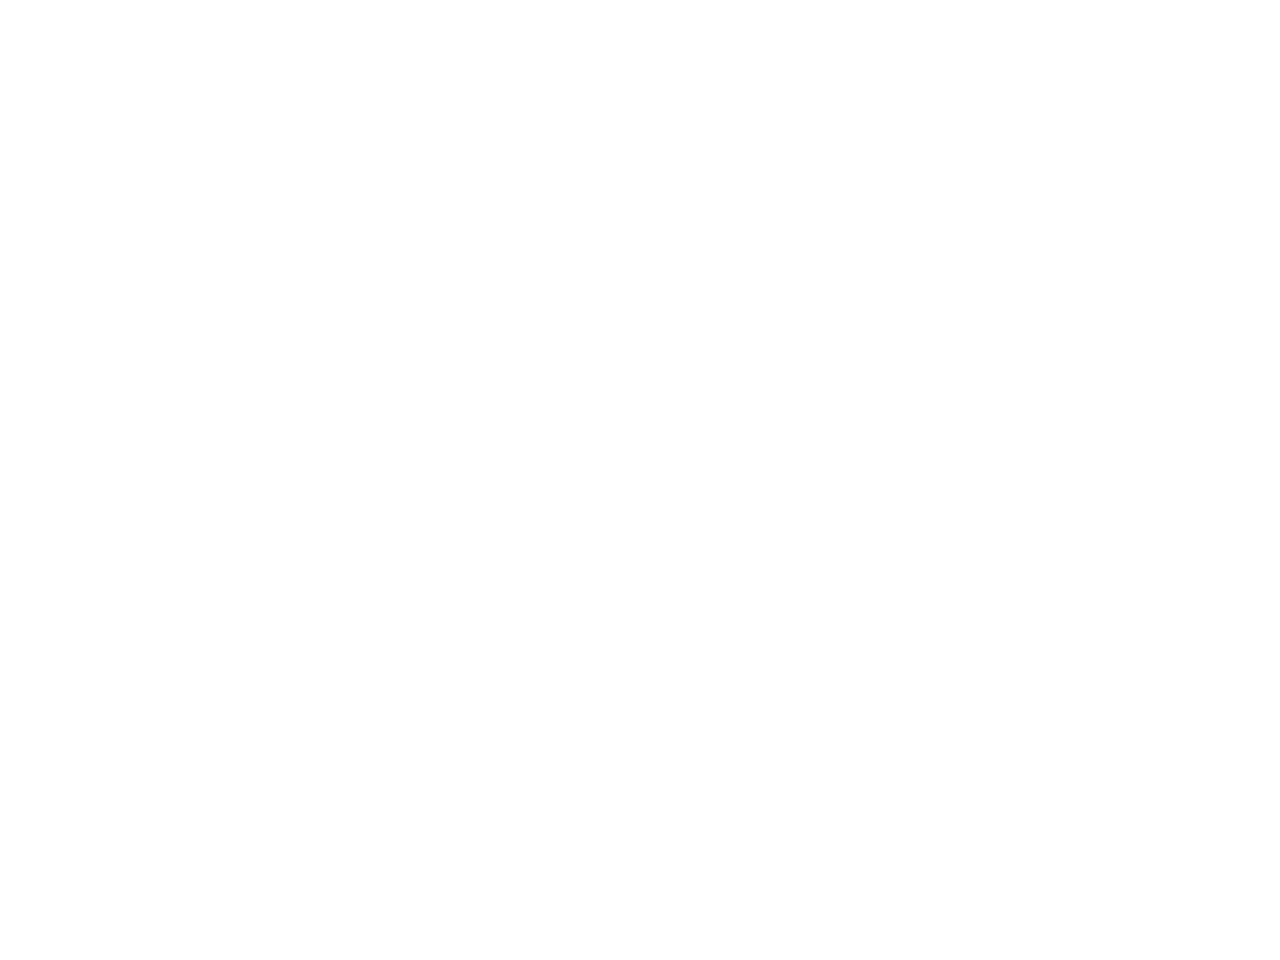

<IPython.core.display.Javascript object>


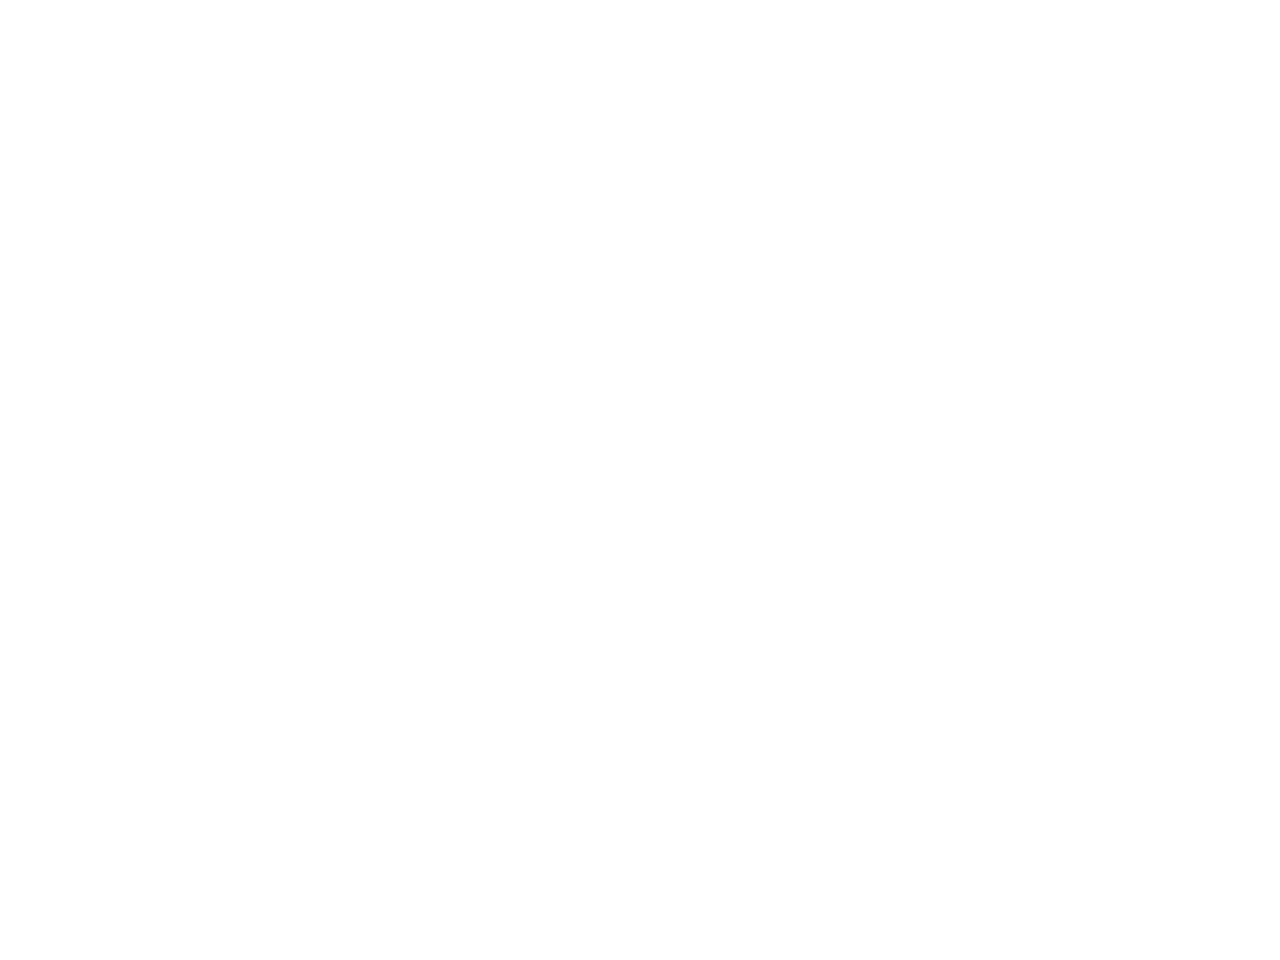

<IPython.core.display.Javascript object>


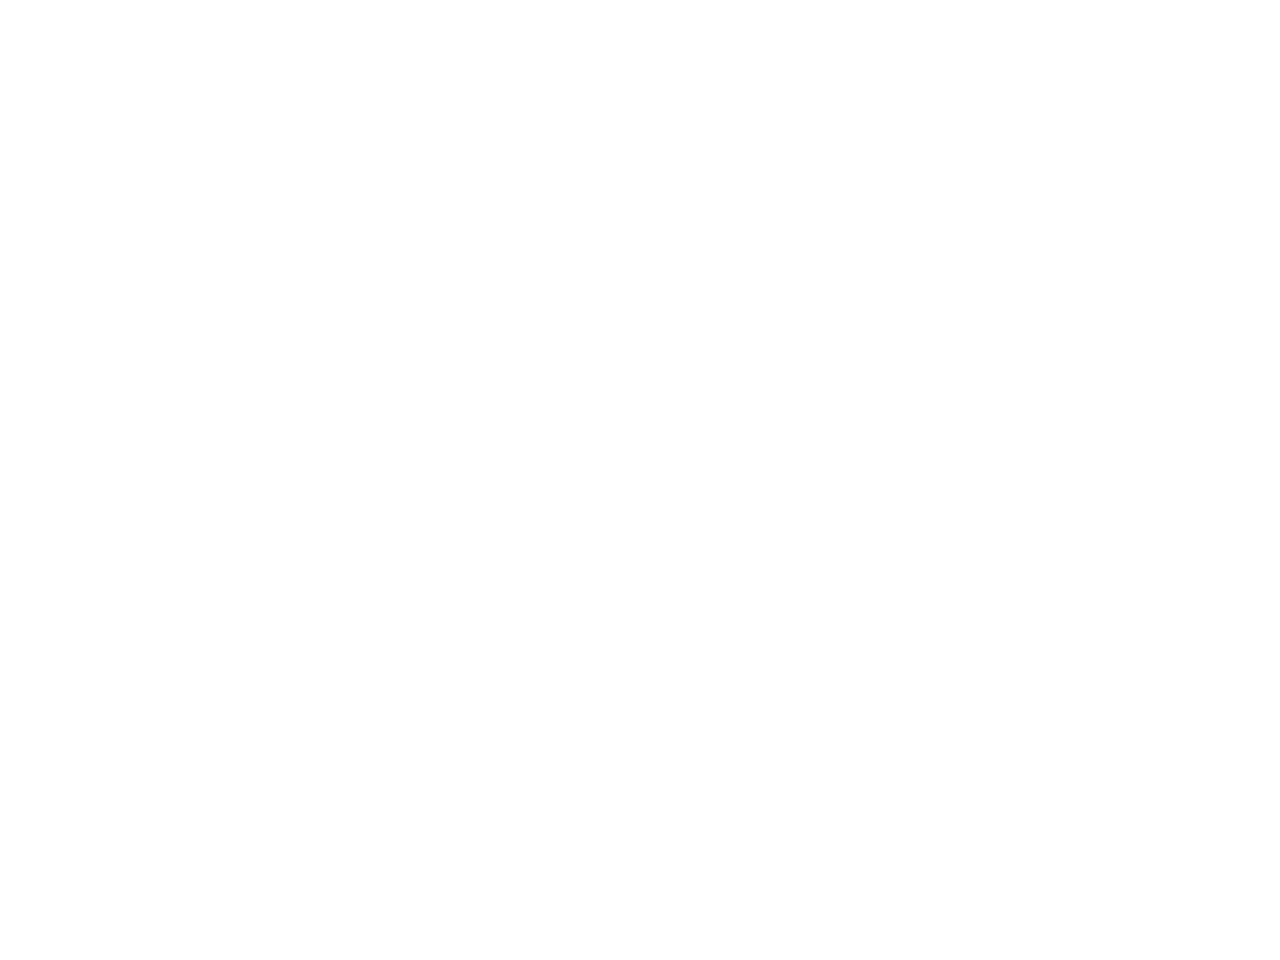

<IPython.core.display.Javascript object>


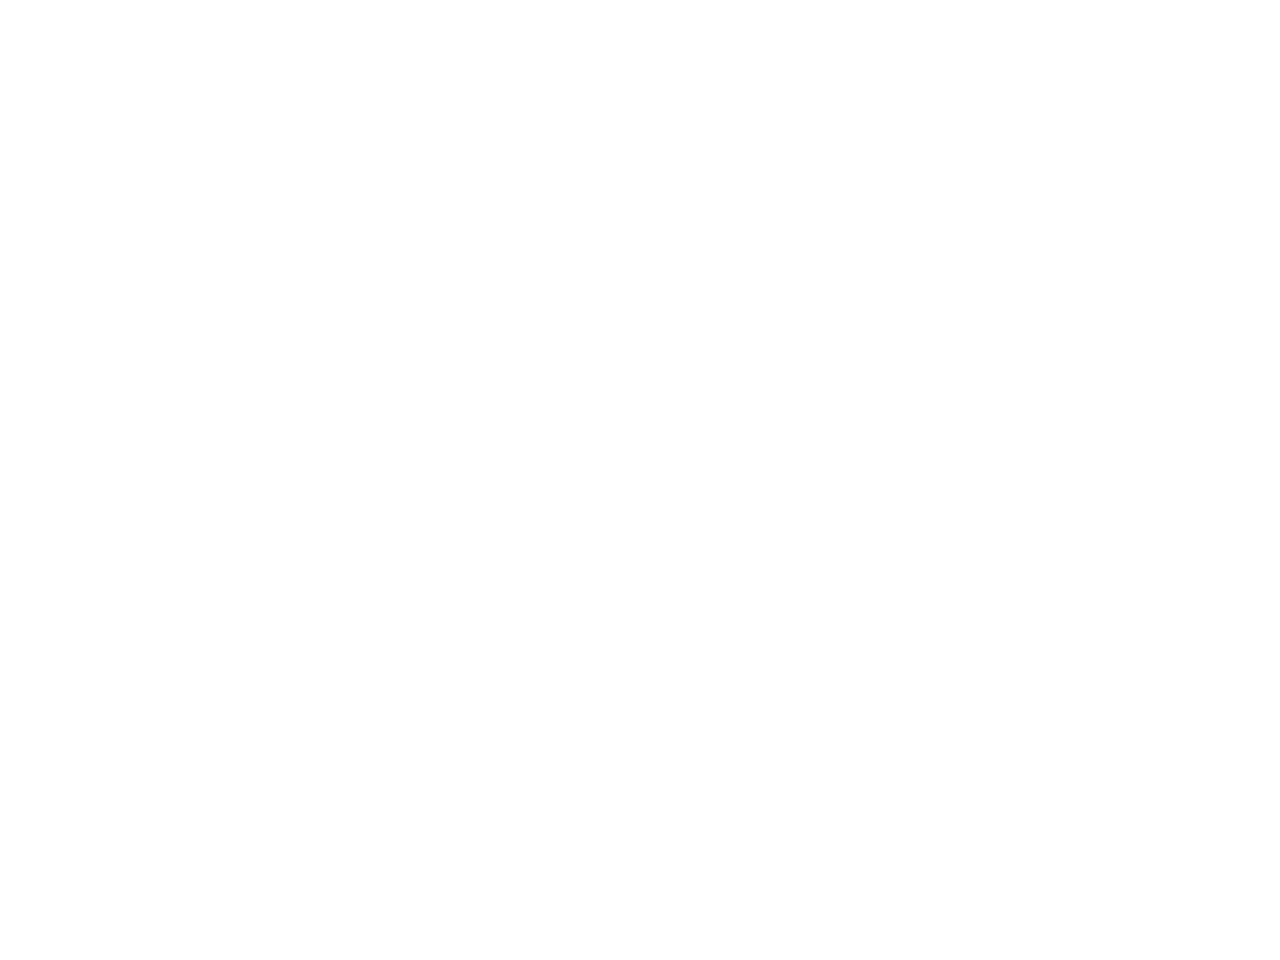

New video was added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\reachingvideo1.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.


In [13]:
deeplabcut.extract_outlier_frames(path_config_file,videofile_path,outlieralgorithm='uncertain',p_bound=.2)

The user can run this iteratively, and (even) extract additional frames from the same video.

## Manually correct labels

This step allows the user to correct the labels in the extracted frames. Navigate to the folder with the videos and use the GUI as described in the protocol to update the labels.

In [14]:
#GUI pops up! 
#sometimes you need to restart the kernel for the GUI to launch.
%gui wx
deeplabcut.refine_labels(path_config_file)

SystemExit: Unable to access the X Display, is $DISPLAY set properly?

/home/blansdell/anaconda3/envs/dlc/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
Unable to access the X Display, is $DISPLAY set properly?


In [ ]:
path_config_file

In [ ]:
# Now merge datasets (once you refined all frames)
deeplabcut.merge_datasets(path_config_file)

## Create a new iteration of training dataset, check it and train...

Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [ ]:
#Perhaps plot the labels to see how how all the frames are annotated (including the refined ones)
deeplabcut.check_labels(path_config_file)
# if they are off, you can load them in the labeling_gui to adjust!

In [ ]:
deeplabcut.create_training_dataset(path_config_file)

Now one can train the network again... (with the expanded data set)

In [ ]:
deeplabcut.train_network(path_config_file)